In [4]:
import glob
import os

In [8]:
for file in os.listdir("./"):
    if file.endswith(".txt"):
        print(os.path.join("./", file))


In [12]:
for f in glob.glob('*.txt'):
    print(f)
    

In [5]:
class_names = ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [3]:
dict_info =  {"description": "ExDark",
              "url": "https://github.com/cs-chan/Exclusively-Dark-Image-Dataset",
        "version": "1.0",
        "year": 2015,
        "contributor": "ExDark",
        "date_created": "2015/01/01"
      }
dict_licenses = [{"url": "https://github.com/cs-chan/Exclusively-Dark-Image-Dataset",
          "id": 1,
          "name": "BSD-3"}]
img ={  "license": 1,
            "file_name": "000000397133.jpg",
            "coco_url": "",
            "height": 427,
            "width": 640,
            "date_captured": "2015",
            "flickr_url": "",
            "id": 397133}
annot= {
            "area": 702.1057499999998,
            "iscrowd": 0,
            "image_id": 289343,
            "bbox": [473.07,395.93,38.65,28.67],
            "category_id": 18,
            "id": 1768
       }
dict_cat = [
        {"id": 1,"name": "person"},
        {"id": 2,"name": "bicycle"},
        {"id": 3,"name": "car"},
        {"id": 4,"name": "motorbike"},
        {"id": 9,"name": "boat"}, 
        {"id": 16,"name": "cat"},
        {"id": 40,"name": "bottle"},
        {"id": 42,"name": "cup"},
        {"id": 53,"name": "dog"},
        {"id": 57,"name": "chair"},
        {"id": 61,"name": "table"}]

name_key ={'Bicycle': 2,
   'Boat': 9,
   'Bottle': 40,
   'Bus': 6,
   'Car': 3,
   'Cat': 16,
   'Chair': 57,
   'Cup': 42,
   'Dog': 53,
   'Motorbike': 4,
   'People': 1,
   'Diningtable': 61}

In [4]:
name_key.keys()

dict_keys(['Bicycle', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cup', 'Dog', 'Motorbike', 'People', 'Diningtable'])

In [6]:
from PIL import Image 
import os
import re
import json
from shutil import copyfile

#copyfile(src, dst)

In [17]:

count_img = 0
count_annot_all = 0
result = []

imgs = []
val_imgs = []
annots = []
val_annots = []
for top, dirs, files in os.walk('.'):
    #print(top, dirs, files)
    #print(top)
    valid_count = 0
    for nm in files:     
        if nm.endswith(".txt"):
            with open(top+'/'+nm) as f:
                fn = re.findall('(.+)\.txt', top+'/'+nm)[0]
                new_name = re.sub('\.(jpg|png|JPEG|JPG|jpeg)','',nm)
                copyfile(src, dst)
                img_id_arr = re.findall('\d{4}_(\d{5})\.(?:jpg|png|JPEG|JPG|jpeg)\.txt',nm)
                try:
                    img_id=int(img_id_arr[0])
                    img = Image.open(fn)
                    width,height = img.size
                except Exception:
                    print('ошибка на файле', fn)
                    continue  
                #print('/home/user/netology/netology_git/yolov3_pytorch/notebooks'+fn[1:])    
                new_img ={  "license": 1,"file_name": '/home/user/netology/netology_git/yolov3_pytorch/notebooks'+fn[1:],"coco_url": "",
                    "height": height,"width": width,"date_captured": "2015","flickr_url": "","id": img_id} 
                if valid_count < 75:
                    val_imgs.append(new_img)
                else:    
                    imgs.append(new_img)
                count_img +=1    
                str_ann = f.readline()
                count_annot = 0
                for i in f:
                    res = re.findall('(\w+) (\d+) (\d+) (\d+) (\d+) .*', i)
                    
                    if len(res)<1:
                        print('ошибка в аннотации:', i, ' в файле:', fn )
                        continue
                    type_obj, x, y, w, h = res[0]
                    #print(img_id, type(int(img_id)))
                    if type_obj in name_key.keys():
                        new_annot ={ "area": int(w) * int(h),
                                    "iscrowd": 0,
                                    "image_id": int(img_id)*100,
                                    "bbox": [int(x), int(y), int(w), int(h)],
                                    "category_id": name_key[type_obj],
                                    "id": img_id*100+count_annot
                                   }
                        if valid_count < 75:
                            val_annots.append(new_annot)
                        else:
                            annots.append(new_annot)
                        count_annot+=1
                valid_count += 1        
                count_annot_all = count_annot_all + count_annot       
                        
                        
print(count_img,count_annot_all)                    

result =  {
    "info" : dict_info, 
    "images" : imgs, 
    "annotations" : annots, 
    "licenses" : dict_licenses,
}  
val_result =  {
    "info" : dict_info, 
    "images" : val_imgs, 
    "annotations" : val_annots, 
    "licenses" : dict_licenses,
}  

with open('ExDarc_annot.json', 'w') as f:
    f.write(json.dumps(result))
with open('ExDarc_annot_val.json', 'w') as f:
    f.write(json.dumps(val_result))                    

2015_00001.txt
2015_00002.txt
2015_00003.txt
2015_00004.txt
2015_00005.txt
2015_00006.txt
2015_00007.txt
2015_00008.txt
2015_00009.txt
2015_00010.txt
2015_00011.txt
2015_00012.txt
2015_00013.txt
2015_00014.txt
2015_00015.txt
2015_00016.txt
2015_00357.txt
2015_00358.txt
2015_00359.txt
2015_00360.txt
2015_00361.txt
2015_00362.txt
2015_00363.txt
2015_00364.txt
2015_00365.txt
2015_00366.txt
2015_00367.txt
2015_00368.txt
2015_00369.txt
2015_00370.txt
2015_00371.txt
2015_00182.txt
2015_00183.txt
2015_00184.txt
2015_00185.txt
2015_00186.txt
2015_00187.txt
2015_00188.txt
2015_00189.txt
2015_00190.txt
2015_00546.txt
2015_00547.txt
2015_00548.txt
2015_00549.txt
2015_00550.txt
2015_00551.txt
2015_00552.txt
2015_00553.txt
2015_00554.txt
2015_00555.txt
2015_00556.txt
2015_00557.txt
2015_00558.txt
2015_00129.txt
2015_00224.txt
2015_00225.txt
2015_00226.txt
2015_00227.txt
2015_00228.txt
2015_00229.txt
2015_00230.txt
2015_00231.txt
2015_00232.txt
2015_00233.txt
2015_00234.txt
2015_00235.txt
2015_00236

2015_00173.txt
2015_00174.txt
2015_00175.txt
2015_00176.txt
2015_00177.txt
2015_00178.txt
2015_00179.txt
2015_00180.txt
2015_00181.txt
2015_00623.txt
2015_00624.txt
2015_00625.txt
2015_00626.txt
2015_00627.txt
2015_00628.txt
2015_00629.txt
2015_00630.txt
2015_00631.txt
2015_00046.txt
2015_00047.txt
2015_00048.txt
2015_00049.txt
2015_00050.txt
2015_00051.txt
2015_00052.txt
2015_00053.txt
2015_00054.txt
2015_00109.txt
2015_00110.txt
2015_00111.txt
2015_00112.txt
2015_00113.txt
2015_00114.txt
2015_00115.txt
2015_00116.txt
2015_00117.txt
2015_00329.txt
2015_00330.txt
2015_00331.txt
2015_00332.txt
2015_00333.txt
2015_00334.txt
2015_00335.txt
2015_00336.txt
2015_00337.txt
2015_00604.txt
2015_00605.txt
2015_00606.txt
2015_00607.txt
2015_00608.txt
2015_00609.txt
2015_00610.txt
2015_00611.txt
2015_00612.txt
2015_00191.txt
2015_00192.txt
2015_00193.txt
2015_00194.txt
2015_00195.txt
2015_00196.txt
2015_00197.txt
2015_00198.txt
2015_00199.txt
2015_00026.txt
2015_00027.txt
2015_00028.txt
2015_00029

2015_01046.txt
2015_01047.txt
2015_01048.txt
2015_01049.txt
2015_01050.txt
2015_01051.txt
2015_01052.txt
2015_01053.txt
2015_01054.txt
2015_01055.txt
2015_01322.txt
2015_01323.txt
2015_01324.txt
2015_01325.txt
2015_01326.txt
2015_01327.txt
2015_01328.txt
2015_01329.txt
2015_01330.txt
2015_01331.txt
2015_01161.txt
2015_01162.txt
2015_01163.txt
2015_01164.txt
2015_01165.txt
2015_01166.txt
2015_01167.txt
2015_01168.txt
2015_01169.txt
2015_01170.txt
2015_01171.txt
2015_01172.txt
2015_01086.txt
2015_01087.txt
2015_01088.txt
2015_01089.txt
2015_01090.txt
2015_01091.txt
2015_01092.txt
2015_01093.txt
2015_01094.txt
2015_01095.txt
2015_01300.txt
2015_01301.txt
2015_01302.txt
2015_01303.txt
2015_01304.txt
2015_01305.txt
2015_01306.txt
2015_01307.txt
2015_01308.txt
2015_01259.txt
2015_01260.txt
2015_01261.txt
2015_01262.txt
2015_01263.txt
2015_01264.txt
2015_01265.txt
2015_01266.txt
2015_01267.txt
2015_01268.txt
2015_01280.txt
2015_01281.txt
2015_01282.txt
2015_01283.txt
2015_01284.txt
2015_01285

2015_01814.txt
2015_01815.txt
2015_01816.txt
2015_01817.txt
2015_01818.txt
2015_01819.txt
2015_01820.txt
2015_01821.txt
2015_01822.txt
2015_01540.txt
2015_01541.txt
2015_01542.txt
2015_01543.txt
2015_01544.txt
2015_01545.txt
2015_01546.txt
2015_01547.txt
2015_01548.txt
2015_01549.txt
2015_01550.txt
2015_01551.txt
2015_01552.txt
2015_01553.txt
2015_01554.txt
2015_01514.txt
2015_01515.txt
2015_01516.txt
2015_01517.txt
2015_01518.txt
2015_01519.txt
2015_01520.txt
2015_01521.txt
2015_01522.txt
2015_01523.txt
2015_01524.txt
2015_01525.txt
2015_01526.txt
2015_01527.txt
2015_01780.txt
2015_01781.txt
2015_01782.txt
2015_01783.txt
2015_01784.txt
2015_01785.txt
2015_01786.txt
2015_01787.txt
2015_01788.txt
2015_01789.txt
2015_01790.txt
2015_01791.txt
2015_01792.txt
2015_01793.txt
2015_01794.txt
2015_01795.txt
2015_01753.txt
2015_01754.txt
2015_01755.txt
2015_01756.txt
2015_01757.txt
2015_01758.txt
2015_01759.txt
2015_01760.txt
2015_01761.txt
2015_01762.txt
2015_01763.txt
2015_01764.txt
2015_01765

2015_02290.txt
2015_02291.txt
2015_02292.txt
2015_02133.txt
2015_02262.txt
2015_02323.txt
2015_02359.txt
2015_02196.txt
2015_02197.txt
2015_02198.txt
2015_02199.txt
2015_02200.txt
2015_02201.txt
2015_02202.txt
2015_02203.txt
2015_02204.txt
2015_02205.txt
2015_02206.txt
2015_02303.txt
2015_02304.txt
2015_02305.txt
2015_02306.txt
2015_02307.txt
2015_02308.txt
2015_02309.txt
2015_02310.txt
2015_02311.txt
2015_02312.txt
2015_02217.txt
2015_02218.txt
2015_02219.txt
2015_02220.txt
2015_02221.txt
2015_02222.txt
2015_02223.txt
2015_02224.txt
2015_02225.txt
2015_02226.txt
2015_02263.txt
2015_02264.txt
2015_02265.txt
2015_02266.txt
2015_02267.txt
2015_02268.txt
2015_02269.txt
2015_02270.txt
2015_02271.txt
2015_02177.txt
2015_02178.txt
2015_02179.txt
2015_02180.txt
2015_02181.txt
2015_02182.txt
2015_02183.txt
2015_02184.txt
2015_02185.txt
2015_02324.txt
2015_02325.txt
2015_02326.txt
2015_02327.txt
2015_02328.txt
2015_02329.txt
2015_02330.txt
ошибка на файле ./ExDark/Bus/2015_02330.jpg
2015_02331.

2015_03130.txt
2015_03131.txt
2015_03132.txt
2015_03133.txt
2015_03134.txt
2015_03135.txt
2015_03136.txt
2015_03137.txt
2015_03138.txt
2015_03139.txt
2015_03140.txt
2015_03141.txt
2015_03142.txt
2015_03143.txt
2015_03338.txt
2015_03339.txt
2015_03340.txt
2015_03341.txt
2015_03342.txt
2015_03343.txt
2015_03344.txt
2015_03345.txt
2015_03346.txt
2015_03347.txt
2015_03348.txt
2015_03349.txt
2015_03389.txt
2015_03390.txt
2015_03391.txt
2015_03392.txt
2015_03393.txt
2015_03394.txt
2015_03395.txt
2015_03396.txt
2015_03397.txt
2015_03398.txt
2015_03399.txt
2015_03716.txt
2015_03717.txt
2015_03718.txt
2015_03719.txt
2015_03720.txt
2015_03721.txt
2015_03722.txt
2015_03723.txt
2015_03724.txt
2015_03725.txt
2015_03726.txt
2015_03727.txt
2015_03175.txt
2015_03176.txt
2015_03177.txt
2015_03178.txt
2015_03179.txt
2015_03180.txt
2015_03181.txt
2015_03182.txt
2015_03183.txt
2015_03184.txt
2015_03185.txt
2015_03186.txt
2015_03187.txt
2015_03188.txt
2015_03189.txt
2015_03190.txt
2015_03191.txt
2015_03600

2015_04420.txt
2015_04421.txt
2015_04422.txt
2015_04423.txt
2015_04424.txt
2015_04055.txt
2015_04056.txt
2015_04057.txt
2015_04058.txt
2015_04059.txt
2015_04060.txt
2015_04061.txt
2015_04062.txt
2015_04063.txt
2015_04064.txt
2015_04344.txt
2015_04345.txt
2015_04346.txt
2015_04347.txt
2015_04348.txt
2015_04349.txt
2015_04350.txt
2015_04351.txt
2015_04352.txt
2015_04353.txt
2015_04354.txt
2015_03820.txt
2015_03821.txt
2015_03822.txt
2015_03823.txt
2015_03824.txt
2015_03825.txt
2015_03826.txt
2015_03827.txt
2015_03828.txt
2015_03829.txt
2015_03830.txt
2015_04139.txt
2015_04140.txt
2015_04141.txt
2015_04142.txt
2015_04143.txt
2015_04144.txt
2015_04145.txt
2015_04146.txt
2015_04147.txt
2015_04148.txt
2015_04149.txt
2015_04150.txt
2015_04151.txt
2015_04162.txt
2015_04163.txt
2015_04164.txt
2015_04165.txt
2015_04166.txt
2015_04167.txt
2015_04168.txt
2015_04169.txt
2015_04170.txt
2015_04171.txt
2015_04076.txt
2015_04077.txt
2015_04078.txt
2015_04079.txt
2015_04080.txt
2015_04081.txt
2015_04082

2015_04635.txt
2015_04636.txt
2015_04637.txt
2015_04638.txt
2015_04639.txt
2015_04508.txt
2015_04509.txt
2015_04510.txt
2015_04511.txt
2015_04512.txt
2015_04513.txt
2015_04514.txt
2015_04515.txt
2015_04516.txt
2015_04592.txt
2015_04593.txt
2015_04594.txt
2015_04595.txt
2015_04596.txt
2015_04597.txt
2015_04598.txt
2015_04599.txt
2015_04600.txt
2015_04935.txt
2015_04936.txt
2015_04937.txt
2015_04938.txt
2015_04939.txt
2015_04940.txt
2015_04941.txt
2015_04942.txt
2015_04943.txt
2015_04740.txt
2015_04741.txt
2015_04742.txt
2015_04743.txt
2015_04744.txt
2015_04745.txt
2015_04746.txt
2015_04747.txt
2015_04748.txt
2015_04749.txt
2015_04875.txt
2015_04876.txt
2015_04877.txt
2015_04878.txt
2015_04879.txt
2015_04880.txt
2015_04881.txt
2015_04882.txt
2015_04883.txt
2015_04894.txt
2015_04895.txt
2015_04896.txt
2015_04897.txt
2015_04898.txt
2015_04899.txt
2015_04900.txt
2015_04901.txt
2015_04902.txt
2015_04610.txt
2015_04611.txt
2015_04612.txt
2015_04613.txt
2015_04614.txt
2015_04615.txt
2015_04616

2015_05687.txt
2015_05688.txt
2015_05689.txt
2015_05690.txt
2015_05691.txt
2015_05692.txt
2015_05693.txt
2015_05694.txt
2015_05695.txt
2015_05696.txt
2015_05697.txt
2015_05636.txt
2015_05637.txt
2015_05638.txt
2015_05639.txt
2015_05640.txt
2015_05641.txt
2015_05642.txt
2015_05643.txt
2015_05644.txt
2015_05645.txt
2015_05646.txt
2015_05647.txt
2015_05648.txt
2015_05275.txt
2015_05276.txt
2015_05277.txt
2015_05278.txt
2015_05279.txt
2015_05280.txt
2015_05281.txt
2015_05282.txt
2015_05283.txt
2015_05284.txt
2015_05285.txt
2015_05286.txt
2015_05287.txt
2015_05588.txt
2015_05589.txt
2015_05590.txt
2015_05591.txt
2015_05592.txt
2015_05593.txt
2015_05594.txt
2015_05595.txt
2015_05596.txt
2015_05597.txt
2015_05598.txt
2015_05599.txt
2015_05600.txt
2015_05601.txt
2015_05602.txt
2015_05123.txt
2015_05124.txt
2015_05125.txt
2015_05126.txt
2015_05127.txt
2015_05128.txt
2015_05129.txt
2015_05130.txt
2015_05131.txt
2015_05132.txt
2015_05317.txt
2015_05318.txt
2015_05319.txt
2015_05320.txt
2015_05321

2015_06143.txt
2015_06144.txt
2015_06145.txt
2015_06146.txt
2015_06147.txt
2015_06148.txt
2015_06149.txt
2015_06005.txt
2015_06006.txt
2015_06007.txt
2015_06008.txt
2015_06009.txt
2015_06010.txt
2015_06011.txt
2015_06012.txt
2015_06013.txt
2015_06014.txt
2015_06015.txt
2015_06016.txt
2015_06017.txt
2015_05760.txt
2015_05761.txt
2015_05762.txt
2015_05763.txt
2015_05764.txt
2015_05765.txt
2015_05766.txt
2015_05767.txt
2015_05768.txt
2015_05769.txt
2015_05770.txt
2015_05771.txt
2015_05772.txt
2015_05773.txt
2015_05774.txt
2015_06066.txt
2015_06067.txt
2015_06068.txt
2015_06069.txt
2015_06070.txt
2015_06071.txt
2015_06072.txt
2015_06073.txt
2015_06074.txt
2015_06075.txt
2015_06076.txt
2015_06077.txt
2015_06078.txt
2015_06110.txt
2015_06111.txt
2015_06112.txt
2015_06113.txt
2015_06114.txt
2015_06115.txt
2015_06116.txt
2015_06117.txt
2015_06118.txt
2015_06119.txt
2015_05819.txt
2015_05820.txt
2015_05821.txt
2015_05822.txt
2015_05823.txt
2015_05824.txt
2015_05825.txt
2015_05826.txt
2015_05827

2015_06537.txt
2015_06538.txt
2015_06539.txt
2015_06540.txt
2015_06541.txt
2015_06542.txt
2015_06543.txt
2015_06544.txt
2015_06545.txt
2015_06259.txt
2015_06260.txt
2015_06261.txt
2015_06262.txt
2015_06263.txt
2015_06264.txt
2015_06265.txt
2015_06266.txt
2015_06267.txt
2015_06268.txt
2015_06269.txt
2015_06270.txt
2015_06271.txt
2015_06272.txt
2015_06273.txt
2015_06602.txt
2015_06603.txt
2015_06604.txt
2015_06605.txt
2015_06606.txt
2015_06607.txt
2015_06608.txt
2015_06609.txt
2015_06610.txt
2015_06611.txt
2015_06612.txt
2015_06626.txt
2015_06627.txt
2015_06628.txt
2015_06629.txt
2015_06630.txt
2015_06631.txt
2015_06632.txt
2015_06633.txt
2015_06634.txt
2015_06635.txt
2015_06636.txt
2015_06637.txt
2015_06651.txt
2015_06652.txt
2015_06653.txt
2015_06654.txt
2015_06655.txt
2015_06656.txt
2015_06657.txt
2015_06658.txt
2015_06659.txt
2015_06660.txt
2015_06661.txt
2015_06662.txt
2015_06663.txt
2015_06556.txt
2015_06579.txt
2015_06696.txt
2015_06580.txt
2015_06581.txt
2015_06582.txt
2015_06583

2015_06897.txt
2015_06898.txt
2015_07036.txt
2015_07037.txt
2015_07038.txt
2015_07039.txt
2015_07040.txt
2015_07041.txt
2015_07042.txt
2015_07043.txt
2015_07044.txt
2015_07045.txt
2015_07046.txt
2015_07047.txt
2015_07048.txt
2015_07275.txt
2015_07276.txt
2015_07277.txt
2015_07278.txt
2015_07279.txt
2015_07280.txt
2015_07281.txt
2015_07282.txt
2015_07283.txt
2015_07284.txt
2015_07285.txt
2015_07286.txt
2015_07287.txt
2015_07064.txt
2015_07065.txt
2015_07066.txt
2015_07067.txt
2015_07068.txt
2015_07069.txt
2015_07070.txt
2015_07071.txt
2015_07072.txt
2015_07073.txt
2015_07074.txt
2015_07075.txt
2015_07076.txt
2015_07153.txt
2015_07154.txt
2015_07155.txt
2015_07156.txt
2015_07157.txt
2015_07158.txt
2015_07159.txt
2015_07160.txt
2015_07161.txt
2015_07162.txt
2015_07163.txt
2015_07344.txt
2015_07345.txt
2015_07346.txt
2015_07347.txt
2015_07348.txt
2015_07349.txt
2015_07350.txt
2015_07351.txt
2015_07352.txt
2015_07353.txt
2015_07354.txt
2015_07355.txt
2017_07358.txt
2015_07229.txt
2015_07230

In [3]:
dict_info =  {"description": "COCO 2017 Dataset",
              "url": "http://cocodataset.org",
        "version": "1.0",
        "year": 2017,
        "contributor": "COCO Consortium",
        "date_created": "2017/09/01"
      }
dict_licenses = [{"url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
          "id": 1,
          "name": "Attribution-NonCommercial-ShareAlike License"}]
img ={  "license": 1,
            "file_name": "000000397133.jpg",
            "coco_url": "",
            "height": 427,
            "width": 640,
            "date_captured": "2015",
            "flickr_url": "",
            "id": 397133}
annot= {
            "area": 702.1057499999998,
            "iscrowd": 0,
            "image_id": 289343,
            "bbox": [473.07,395.93,38.65,28.67],
            "category_id": 18,
            "id": 1768
       }
dict_cat = [
        {"id": 1,"name": "person"},
        {"id": 2,"name": "bicycle"},
        {"id": 3,"name": "car"},
        {"id": 4,"name": "motorbike"},
        {"id": 9,"name": "boat"}, 
        {"id": 16,"name": "cat"},
        {"id": 40,"name": "bottle"},
        {"id": 42,"name": "cup"},
        {"id": 53,"name": "dog"},
        {"id": 57,"name": "chair"},
        {"id": 61,"name": "table"}]

In [ ]:

   # bicycle - bicycle - 2
   # boat - boat - 9
   # bottle - bottle - 40
  #  bus - bus - 6
  #  car - car - 3
  #  cat - cat - 16
  #  chair - chair - 57
 #   cup - cup - 42
  #  dog - dog - 53
 #   motorbike - motorbike 4
 #   people - person - 1
 #   table - diningtable - 61


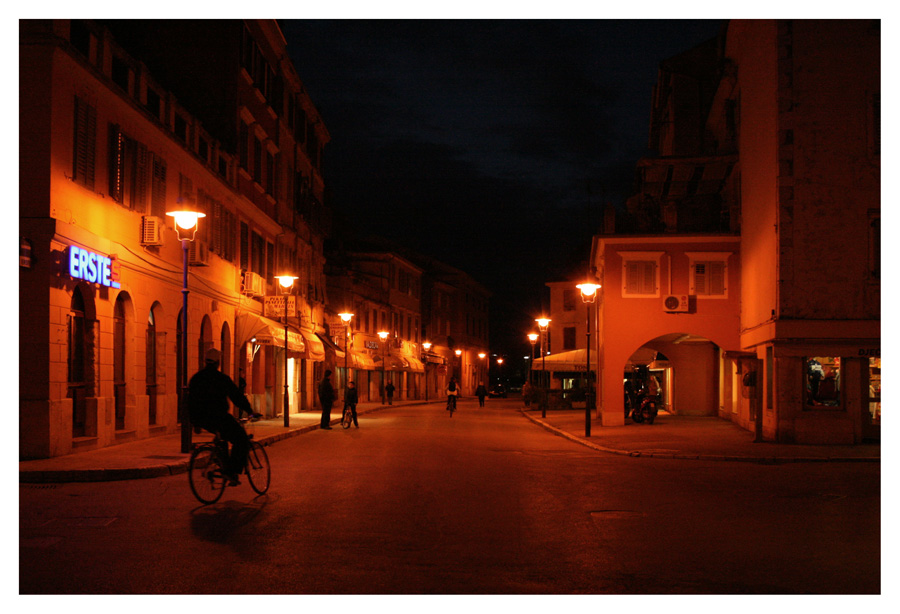

In [14]:
Image.open('/home/user/netology/netology_git/yolov3_pytorch/notebooks/ExDark/Bicycle/2015_00601.jpg')

In [ ]:
from PIL import Image 
import os
import re
import json
from shutil import copyfile

In [4]:
count_img = 0
count_annot_all = 0
result = []

imgs = []
val_imgs = []
annots = []
val_annots = []
for top, dirs, files in os.walk('.'):
    #print(top, dirs, files)
    #print(top)
    valid_count = 0
    for nm in files:     
        if nm.endswith(".txt"):
            fn = re.findall('(.+)\.txt', nm)[0]
            
            #print(fn,len(re.findall(r'\.(jpg|png|JPEG|JPG|jpeg)',fn)))
            if len(re.findall(r'\.(jpg|png|JPEG|JPG|jpeg)',fn)) < 1:
                continue
            try:
                
                img = Image.open(top+'/'+fn)
                width,height = img.size
            except Exception:
                print('ошибка на файле', top+'/'+fn)
                continue     
                
            new_name = re.sub('\.(jpg|png|JPEG|JPG|jpeg)','',nm)
            dest_p = './train_img/' if valid_count > 50 else './val_img/'
            #print(fn,new_name,dest_p)
            with open(top+'/'+nm) as f:
                arr = f.readlines()
                del arr[0]
                for i in range(len(arr)):
                    arr[i] = arr[i].lower()
                    arr[i] = arr[i].replace('people','person')  
                    #arr[i] = arr[i].replace('diningtable','table')
                    arr[i] = arr[i].replace('person','1')
                    arr[i] = arr[i].replace('bicycle','2')
                    arr[i] = arr[i].replace('car','3')
                    arr[i] = arr[i].replace('motorbike','4')
                    arr[i] = arr[i].replace('bus','6')
                    arr[i] = arr[i].replace('boat','9') 
                    arr[i] = arr[i].replace('cat','16')
                    arr[i] = arr[i].replace('dog','17')
                    arr[i] = arr[i].replace('bottle','40')
                    arr[i] = arr[i].replace('cup','42')
                    arr[i] = arr[i].replace('chair','57')
                    arr[i] = arr[i].replace('table','61')
                    m_arr = arr[i].split(' ')[:5]
                    m_arr[1] = str(int(m_arr[1])/width)
                    m_arr[2] = str(int(m_arr[2])/height)
                    m_arr[3] = str(int(m_arr[3])/width)
                    m_arr[4] = str(int(m_arr[4])/height)
                    print(m_arr)
                    arr[i] = ' '.join(m_arr)
                    
                     
                print(dest_p+new_name, "\n".join(arr))
                with open(dest_p+new_name, 'w') as f:
                    f.write("\n".join(arr))
            #copyfile(top+'/'+nm, dest_p+new_name)
            
            copyfile(top+'/'+fn, dest_p+fn)
            valid_count += 1 
            if top != "./ExDark/People" and valid_count > 200:
                break
                
                
                        




['2', '0.408', '0.07466666666666667', '0.542', '0.5146666666666667']
./val_img/2015_00001.txt 2 0.408 0.07466666666666667 0.542 0.5146666666666667
['2', '0.272', '0.5571847507331378', '0.158', '0.3196480938416422']
['2', '0.438', '0.5043988269794721', '0.126', '0.3841642228739003']
['2', '0.554', '0.5513196480938416', '0.152', '0.36363636363636365']
['2', '0.696', '0.5366568914956011', '0.114', '0.2375366568914956']
['3', '0.632', '0.501466275659824', '0.066', '0.07624633431085044']
['3', '0.79', '0.5131964809384164', '0.068', '0.07038123167155426']
./val_img/2015_00002.txt 2 0.272 0.5571847507331378 0.158 0.3196480938416422
2 0.438 0.5043988269794721 0.126 0.3841642228739003
2 0.554 0.5513196480938416 0.152 0.36363636363636365
2 0.696 0.5366568914956011 0.114 0.2375366568914956
3 0.632 0.501466275659824 0.066 0.07624633431085044
3 0.79 0.5131964809384164 0.068 0.07038123167155426
['2', '0.574', '0.2693333333333333', '0.422', '0.656']
['6', '0.006', '0.3413333333333333', '0.07', '0.056

['2', '0.2866666666666667', '0.6666666666666666', '0.22666666666666666', '0.2577777777777778']
['3', '0.006666666666666667', '0.42444444444444446', '0.10333333333333333', '0.24']
./val_img/2015_00548.txt 2 0.2866666666666667 0.6666666666666666 0.22666666666666666 0.2577777777777778
3 0.006666666666666667 0.42444444444444446 0.10333333333333333 0.24
['2', '0.3406392694063927', '0.5857338820301783', '0.10228310502283106', '0.33058984910836764']
['3', '0.39817351598173517', '0.5308641975308642', '0.10228310502283106', '0.1289437585733882']
./val_img/2015_00549.txt 2 0.3406392694063927 0.5857338820301783 0.10228310502283106 0.33058984910836764
3 0.39817351598173517 0.5308641975308642 0.10228310502283106 0.1289437585733882
['2', '0.2908496732026144', '0.30718954248366015', '0.32679738562091504', '0.21241830065359477']
['1', '0.3790849673202614', '0.1437908496732026', '0.17320261437908496', '0.35294117647058826']
./val_img/2015_00550.txt 2 0.2908496732026144 0.30718954248366015 0.32679738562

['2', '0.2088888888888889', '0.6086235489220564', '0.27111111111111114', '0.2769485903814262']
['2', '0.0044444444444444444', '0.6169154228855721', '0.1988888888888889', '0.2570480928689884']
['1', '0.5044444444444445', '0.6434494195688225', '0.08222222222222222', '0.23548922056384744']
['1', '0.6166666666666667', '0.6434494195688225', '0.13', '0.2570480928689884']
['1', '0.5266666666666666', '0.6766169154228856', '0.11', '0.24875621890547264']
['1', '0.8277777777777777', '0.4427860696517413', '0.12444444444444444', '0.4975124378109453']
['1', '0.8077777777777778', '0.6749585406301825', '0.16555555555555557', '0.23217247097844113']
./val_img/2015_00602.txt 2 0.2088888888888889 0.6086235489220564 0.27111111111111114 0.2769485903814262
2 0.0044444444444444444 0.6169154228855721 0.1988888888888889 0.2570480928689884
1 0.5044444444444445 0.6434494195688225 0.08222222222222222 0.23548922056384744
1 0.6166666666666667 0.6434494195688225 0.13 0.2570480928689884
1 0.5266666666666666 0.67661691

['2', '0.17', '0.24624624624624625', '0.226', '0.4084084084084084']
['1', '0.202', '0.10510510510510511', '0.15', '0.45645645645645644']
./train_img/2015_00149.txt 2 0.17 0.24624624624624625 0.226 0.4084084084084084
1 0.202 0.10510510510510511 0.15 0.45645645645645644
['2', '0.40674603174603174', '0.7098121085594989', '0.1388888888888889', '0.18580375782881003']
['1', '0.42063492063492064', '0.6346555323590815', '0.09523809523809523', '0.20876826722338204']
['3', '0.051587301587301584', '0.5949895615866388', '0.05555555555555555', '0.04175365344467641']
['3', '0.30357142857142855', '0.6179540709812108', '0.1111111111111111', '0.07515657620041753']
['3', '0.5813492063492064', '0.6242171189979123', '0.1626984126984127', '0.09394572025052192']
./train_img/2015_00320.txt 2 0.40674603174603174 0.7098121085594989 0.1388888888888889 0.18580375782881003
1 0.42063492063492064 0.6346555323590815 0.09523809523809523 0.20876826722338204
3 0.051587301587301584 0.5949895615866388 0.05555555555555555

['2', '0.06280193236714976', '0.10386473429951691', '0.28743961352657005', '0.5314009661835749']
['17', '0.34541062801932365', '0.08695652173913043', '0.14492753623188406', '0.13768115942028986']
['1', '0.07729468599033816', '0.004830917874396135', '0.26570048309178745', '0.5748792270531401']
['1', '0.321256038647343', '0.007246376811594203', '0.10869565217391304', '0.2246376811594203']
./train_img/2015_00044.txt 2 0.06280193236714976 0.10386473429951691 0.28743961352657005 0.5314009661835749
17 0.34541062801932365 0.08695652173913043 0.14492753623188406 0.13768115942028986
1 0.07729468599033816 0.004830917874396135 0.26570048309178745 0.5748792270531401
1 0.321256038647343 0.007246376811594203 0.10869565217391304 0.2246376811594203
['2', '0.5434782608695652', '0.5144927536231884', '0.30676328502415456', '0.47101449275362317']
./train_img/2015_00045.txt 2 0.5434782608695652 0.5144927536231884 0.30676328502415456 0.47101449275362317
['2', '0.37316176470588236', '0.3075980392156863', '0.

['2', '0.259765625', '0.53515625', '0.1748046875', '0.3125']
['2', '0.548828125', '0.5182291666666666', '0.087890625', '0.21744791666666666']
['2', '0.03125', '0.66796875', '0.240234375', '0.328125']
./train_img/2015_00088.txt 2 0.259765625 0.53515625 0.1748046875 0.3125
2 0.548828125 0.5182291666666666 0.087890625 0.21744791666666666
2 0.03125 0.66796875 0.240234375 0.328125
['2', '0.003125', '0.02122641509433962', '0.4265625', '0.9740566037735849']
['2', '0.884375', '0.6037735849056604', '0.1046875', '0.11084905660377359']
['2', '0.7890625', '0.6132075471698113', '0.1078125', '0.09198113207547169']
['2', '0.7140625', '0.6179245283018868', '0.0765625', '0.08018867924528301']
./train_img/2015_00089.txt 2 0.003125 0.02122641509433962 0.4265625 0.9740566037735849
2 0.884375 0.6037735849056604 0.1046875 0.11084905660377359
2 0.7890625 0.6132075471698113 0.1078125 0.09198113207547169
2 0.7140625 0.6179245283018868 0.0765625 0.08018867924528301
['2', '0.6286407766990292', '0.634615384615384

['2', '0.1921875', '0.6346604215456675', '0.21875', '0.2224824355971897']
['3', '0.61875', '0.5784543325526932', '0.375', '0.3840749414519906']
['1', '0.5375', '0.531615925058548', '0.140625', '0.45901639344262296']
['1', '0.346875', '0.5105386416861827', '0.08125', '0.3559718969555035']
['1', '0.3515625', '0.5105386416861827', '0.134375', '0.4238875878220141']
['1', '0.00625', '0.4894613583138173', '0.065625', '0.2786885245901639']
['1', '0.1078125', '0.477751756440281', '0.0609375', '0.2997658079625293']
['1', '0.0609375', '0.48243559718969553', '0.0609375', '0.3255269320843091']
['1', '0.1375', '0.4847775175644028', '0.1046875', '0.3395784543325527']
./train_img/2015_00125.txt 2 0.1921875 0.6346604215456675 0.21875 0.2224824355971897
3 0.61875 0.5784543325526932 0.375 0.3840749414519906
1 0.5375 0.531615925058548 0.140625 0.45901639344262296
1 0.346875 0.5105386416861827 0.08125 0.3559718969555035
1 0.3515625 0.5105386416861827 0.134375 0.4238875878220141
1 0.00625 0.489461358313817

['2', '0.5263671875', '0.4816983894582723', '0.11328125', '0.1376281112737921']
['4', '0.2841796875', '0.5124450951683748', '0.1103515625', '0.11273792093704246']
['57', '0.8994140625', '0.47584187408491946', '0.0380859375', '0.07613469985358712']
['1', '0.0234375', '0.42020497803806733', '0.0771484375', '0.1259150805270864']
['1', '0.126953125', '0.4216691068814056', '0.03125', '0.09956076134699854']
['1', '0.1884765625', '0.4260614934114202', '0.0419921875', '0.13323572474377746']
['1', '0.2177734375', '0.4260614934114202', '0.0390625', '0.08784773060029283']
['1', '0.275390625', '0.42020497803806733', '0.0595703125', '0.10248901903367497']
['1', '0.37890625', '0.42313323572474376', '0.0263671875', '0.10980966325036604']
['1', '0.412109375', '0.4260614934114202', '0.0263671875', '0.09224011713030747']
['1', '0.4267578125', '0.4143484626647145', '0.03125', '0.13616398243045388']
['1', '0.4599609375', '0.424597364568082', '0.0263671875', '0.09370424597364568']
['1', '0.4833984375', '0.

['2', '0.3620689655172414', '0.686046511627907', '0.06426332288401254', '0.16569767441860464']
./train_img/2015_00059.txt 2 0.3620689655172414 0.686046511627907 0.06426332288401254 0.16569767441860464
['2', '0.28665568369028005', '0.08395061728395062', '0.3245469522240527', '0.8024691358024691']
['3', '0.7677100494233937', '0.1308641975308642', '0.12355848434925865', '0.10864197530864197']
./train_img/2015_00060.txt 2 0.28665568369028005 0.08395061728395062 0.3245469522240527 0.8024691358024691
3 0.7677100494233937 0.1308641975308642 0.12355848434925865 0.10864197530864197
['2', '0.4091796875', '0.17014446227929375', '0.2919921875', '0.33547351524879615']
['1', '0.533203125', '0.04654895666131621', '0.13671875', '0.36436597110754415']
./train_img/2015_00632.txt 2 0.4091796875 0.17014446227929375 0.2919921875 0.33547351524879615
1 0.533203125 0.04654895666131621 0.13671875 0.36436597110754415
['2', '0.26757990867579906', '0.4958904109589041', '0.245662100456621', '0.4178082191780822']
[

['2', '0.134', '0.015015015015015015', '0.716', '0.963963963963964']
./train_img/2015_00392.txt 2 0.134 0.015015015015015015 0.716 0.963963963963964
['2', '0.3796875', '0.67170626349892', '0.084375', '0.21382289416846653']
['1', '0.3734375', '0.5701943844492441', '0.0875', '0.265658747300216']
['6', '0.2578125', '0.36285097192224625', '0.21875', '0.3650107991360691']
['3', '0.4859375', '0.5831533477321814', '0.146875', '0.14254859611231102']
['3', '0.4765625', '0.5356371490280778', '0.090625', '0.09503239740820735']
['3', '0.6390625', '0.5831533477321814', '0.1125', '0.13390928725701945']
['3', '0.7140625', '0.550755939524838', '0.175', '0.19438444924406048']
['3', '0.784375', '0.5982721382289417', '0.1734375', '0.16846652267818574']
['3', '0.9140625', '0.6025917926565875', '0.0828125', '0.21382289416846653']
['3', '0.1046875', '0.5874730021598272', '0.196875', '0.2159827213822894']
./train_img/2015_00393.txt 2 0.3796875 0.67170626349892 0.084375 0.21382289416846653
1 0.3734375 0.57019

['2', '0.24875', '0.27902621722846443', '0.515625', '0.4943820224719101']
./train_img/2015_00345.txt 2 0.24875 0.27902621722846443 0.515625 0.4943820224719101
['2', '0.15', '0.4496487119437939', '0.371875', '0.5011709601873536']
['2', '0.00625', '0.5199063231850117', '0.1703125', '0.4028103044496487']
./train_img/2015_00346.txt 2 0.15 0.4496487119437939 0.371875 0.5011709601873536
2 0.00625 0.5199063231850117 0.1703125 0.4028103044496487
['2', '0.0984375', '0.5644028103044496', '0.3609375', '0.40046838407494145']
['57', '0.5359375', '0.5456674473067916', '0.1609375', '0.16393442622950818']
['1', '0.5828125', '0.48243559718969553', '0.071875', '0.16627634660421545']
./train_img/2015_00347.txt 2 0.0984375 0.5644028103044496 0.3609375 0.40046838407494145
57 0.5359375 0.5456674473067916 0.1609375 0.16393442622950818
1 0.5828125 0.48243559718969553 0.071875 0.16627634660421545
['2', '0.140625', '0.5', '0.21995192307692307', '0.28955696202531644']
['1', '0.8377403846153846', '0.3955696202531

['9', '0.15616438356164383', '0.6136986301369863', '0.7808219178082192', '0.3410958904109589']
./val_img/2015_01074.txt 9 0.15616438356164383 0.6136986301369863 0.7808219178082192 0.3410958904109589
['9', '0.5490506329113924', '0.26666666666666666', '0.37816455696202533', '0.2149425287356322']
./val_img/2015_01075.txt 9 0.5490506329113924 0.26666666666666666 0.37816455696202533 0.2149425287356322
['9', '0.395', '0.365', '0.485', '0.55']
./val_img/2015_01076.txt 9 0.395 0.365 0.485 0.55
['9', '0.10256410256410256', '0.20600858369098712', '0.5501165501165501', '0.40665236051502146']
['1', '0.6177156177156177', '0.43240343347639487', '0.03263403263403263', '0.059012875536480686']
['1', '0.668997668997669', '0.4302575107296137', '0.030303030303030304', '0.06330472103004292']
['1', '0.7062937062937062', '0.43240343347639487', '0.030303030303030304', '0.05793991416309013']
['1', '0.7727272727272727', '0.4302575107296137', '0.029137529137529136', '0.06652360515021459']
['1', '0.80885780885780

['9', '0.0182648401826484', '0.393026941362916', '0.3721461187214612', '0.26148969889064977']
['9', '0.3470319634703196', '0.43740095087163233', '0.2808219178082192', '0.10776545166402536']
['9', '0.4897260273972603', '0.4500792393026941', '0.3972602739726027', '0.21553090332805072']
['9', '0.2808219178082192', '0.5309033280507132', '0.3881278538812785', '0.34072900158478603']
['9', '0.007990867579908675', '0.34548335974643424', '0.15639269406392695', '0.08240887480190175']
./val_img/2015_01249.txt 9 0.0182648401826484 0.393026941362916 0.3721461187214612 0.26148969889064977
9 0.3470319634703196 0.43740095087163233 0.2808219178082192 0.10776545166402536
9 0.4897260273972603 0.4500792393026941 0.3972602739726027 0.21553090332805072
9 0.2808219178082192 0.5309033280507132 0.3881278538812785 0.34072900158478603
9 0.007990867579908675 0.34548335974643424 0.15639269406392695 0.08240887480190175
['9', '0.3902777777777778', '0.4425925925925926', '0.14305555555555555', '0.07777777777777778']
.

['9', '0.17193675889328064', '0.6745562130177515', '0.19367588932806323', '0.10059171597633136']
./train_img/2015_00980.txt 9 0.17193675889328064 0.6745562130177515 0.19367588932806323 0.10059171597633136
['9', '0.0640625', '0.6061320754716981', '0.5125', '0.15330188679245282']
./train_img/2015_00981.txt 9 0.0640625 0.6061320754716981 0.5125 0.15330188679245282
['9', '0.08481262327416174', '0.6498516320474778', '0.28402366863905326', '0.20178041543026706']
['9', '0.16370808678500987', '0.5370919881305638', '0.4339250493096647', '0.3086053412462908']
['9', '0.46548323471400394', '0.5786350148367952', '0.2564102564102564', '0.2433234421364985']
['9', '0.6094674556213018', '0.6172106824925816', '0.21301775147928995', '0.19287833827893175']
./train_img/2015_00982.txt 9 0.08481262327416174 0.6498516320474778 0.28402366863905326 0.20178041543026706
9 0.16370808678500987 0.5370919881305638 0.4339250493096647 0.3086053412462908
9 0.46548323471400394 0.5786350148367952 0.2564102564102564 0.2433

./train_img/2015_01299.txt 9 0.043645699614890884 0.1775609756097561 0.5173299101412067 0.27707317073170734
['9', '0.2275390625', '0.14192708333333334', '0.64453125', '0.74609375']
./train_img/2015_01114.txt 9 0.2275390625 0.14192708333333334 0.64453125 0.74609375
['9', '0.3277591973244147', '0.46745562130177515', '0.6655518394648829', '0.39644970414201186']
['1', '0.5551839464882943', '0.47337278106508873', '0.043478260869565216', '0.20118343195266272']
./train_img/2015_01115.txt 9 0.3277591973244147 0.46745562130177515 0.6655518394648829 0.39644970414201186
1 0.5551839464882943 0.47337278106508873 0.043478260869565216 0.20118343195266272
['9', '0.04', '0.5136612021857924', '0.31636363636363635', '0.17486338797814208']
['9', '0.27636363636363637', '0.4371584699453552', '0.72', '0.4644808743169399']
['1', '0.08', '0.5355191256830601', '0.05454545454545454', '0.08743169398907104']
['1', '0.36', '0.453551912568306', '0.07636363636363637', '0.2568306010928962']
['1', '0.5127272727272727',

['9', '0.4765625', '0.2609375', '0.2890625', '0.3578125']
['9', '0.818359375', '0.5296875', '0.109375', '0.1109375']
./train_img/2015_00920.txt 9 0.4765625 0.2609375 0.2890625 0.3578125
9 0.818359375 0.5296875 0.109375 0.1109375
['9', '0.1453125', '0.7593457943925234', '0.084375', '0.102803738317757']
['9', '0.3', '0.7219626168224299', '0.1265625', '0.14953271028037382']
['9', '0.528125', '0.7172897196261683', '0.1', '0.09579439252336448']
./train_img/2015_00921.txt 9 0.1453125 0.7593457943925234 0.084375 0.102803738317757
9 0.3 0.7219626168224299 0.1265625 0.14953271028037382
9 0.528125 0.7172897196261683 0.1 0.09579439252336448
['9', '0.5359375', '0.70625', '0.1359375', '0.15625']
['9', '0.325', '0.89375', '0.115625', '0.10833333333333334']
./train_img/2015_00922.txt 9 0.5359375 0.70625 0.1359375 0.15625
9 0.325 0.89375 0.115625 0.10833333333333334
['9', '0.1765625', '0.48711943793911006', '0.1125', '0.08665105386416862']
['9', '0.4796875', '0.5269320843091335', '0.0921875', '0.06323

['9', '0.396', '0.24024024024024024', '0.358', '0.46546546546546547']
['1', '0.488', '0.3783783783783784', '0.062', '0.1921921921921922']
./train_img/2015_01179.txt 9 0.396 0.24024024024024024 0.358 0.46546546546546547
1 0.488 0.3783783783783784 0.062 0.1921921921921922
['9', '0.24380165289256198', '0.16', '0.2334710743801653', '0.226']
['1', '0.2706611570247934', '0.166', '0.0743801652892562', '0.132']
./train_img/2015_01180.txt 9 0.24380165289256198 0.16 0.2334710743801653 0.226
1 0.2706611570247934 0.166 0.0743801652892562 0.132
['9', '0.3638888888888889', '0.7477777777777778', '0.10555555555555556', '0.24555555555555555']
./train_img/2015_01029.txt 9 0.3638888888888889 0.7477777777777778 0.10555555555555556 0.24555555555555555
['9', '0.375', '0.7744444444444445', '0.08333333333333333', '0.21888888888888888']
./train_img/2015_01030.txt 9 0.375 0.7744444444444445 0.08333333333333333 0.21888888888888888
['9', '0.5229166666666667', '0.29555555555555557', '0.38680555555555557', '0.69888

['9', '0.4309210526315789', '0.6005361930294906', '0.5180921052631579', '0.19839142091152814']
['1', '0.506578947368421', '0.6032171581769437', '0.05263157894736842', '0.12332439678284182']
./train_img/2015_00877.txt 9 0.4309210526315789 0.6005361930294906 0.5180921052631579 0.19839142091152814
1 0.506578947368421 0.6032171581769437 0.05263157894736842 0.12332439678284182
['9', '0.001968503937007874', '0.7138643067846607', '0.4409448818897638', '0.19174041297935104']
./train_img/2015_00878.txt 9 0.001968503937007874 0.7138643067846607 0.4409448818897638 0.19174041297935104
['9', '0.23742690058479532', '0.33024691358024694', '0.21169590643274855', '0.44753086419753085']
['9', '0.47719298245614034', '0.3395061728395062', '0.3157894736842105', '0.33487654320987653']
./train_img/2015_01205.txt 9 0.23742690058479532 0.33024691358024694 0.21169590643274855 0.44753086419753085
9 0.47719298245614034 0.3395061728395062 0.3157894736842105 0.33487654320987653
['9', '0.2722222222222222', '0.042708

['9', '0.17929759704251386', '0.6023529411764705', '0.2920517560073937', '0.37176470588235294']
['9', '0.5434380776340111', '0.7435294117647059', '0.1534195933456562', '0.24705882352941178']
['9', '0.43068391866913125', '0.49176470588235294', '0.08872458410351201', '0.1976470588235294']
['9', '0.5489833641404805', '0.52', '0.07208872458410351', '0.09176470588235294']
./train_img/2015_00900.txt 9 0.17929759704251386 0.6023529411764705 0.2920517560073937 0.37176470588235294
9 0.5434380776340111 0.7435294117647059 0.1534195933456562 0.24705882352941178
9 0.43068391866913125 0.49176470588235294 0.08872458410351201 0.1976470588235294
9 0.5489833641404805 0.52 0.07208872458410351 0.09176470588235294
['9', '0.12441314553990611', '0.5734375', '0.5375586854460094', '0.271875']
./train_img/2015_00901.txt 9 0.12441314553990611 0.5734375 0.5375586854460094 0.271875
['9', '0.0078125', '0.7018779342723005', '0.3296875', '0.2676056338028169']
['9', '0.3171875', '0.6924882629107981', '0.1015625', '0.1

['9', '0.3359375', '0.425', '0.15', '0.1']
['9', '0.4015625', '0.50625', '0.29375', '0.17708333333333334']
['9', '0.578125', '0.6604166666666667', '0.41875', '0.24791666666666667']
['9', '0.290625', '0.39375', '0.0671875', '0.07916666666666666']
./train_img/2015_00942.txt 9 0.3359375 0.425 0.15 0.1
9 0.4015625 0.50625 0.29375 0.17708333333333334
9 0.578125 0.6604166666666667 0.41875 0.24791666666666667
9 0.290625 0.39375 0.0671875 0.07916666666666666
['9', '0.384375', '0.3957845433255269', '0.13125', '0.09836065573770492']
./train_img/2015_00943.txt 9 0.384375 0.3957845433255269 0.13125 0.09836065573770492
['9', '0.1357421875', '0.545201668984701', '0.3974609375', '0.26842837273991654']
['9', '0.546875', '0.5660639777468707', '0.30859375', '0.41168289290681503']
./train_img/2015_00944.txt 9 0.1357421875 0.545201668984701 0.3974609375 0.26842837273991654
9 0.546875 0.5660639777468707 0.30859375 0.41168289290681503
['9', '0.16875', '0.5526932084309133', '0.20625', '0.2903981264637002']
.

['9', '0.45625', '0.5615671641791045', '0.29125', '0.26492537313432835']
['9', '0.3775', '0.503731343283582', '0.125', '0.14365671641791045']
['9', '0.51625', '0.8078358208955224', '0.2875', '0.16977611940298507']
['9', '0.71875', '0.7817164179104478', '0.2625', '0.19962686567164178']
./train_img/2015_01225.txt 9 0.45625 0.5615671641791045 0.29125 0.26492537313432835
9 0.3775 0.503731343283582 0.125 0.14365671641791045
9 0.51625 0.8078358208955224 0.2875 0.16977611940298507
9 0.71875 0.7817164179104478 0.2625 0.19962686567164178
['9', '0.09195402298850575', '0.22233104799216455', '0.4074074074074074', '0.31831537708129287']
['9', '0.879948914431673', '0.20763956904995104', '0.11877394636015326', '0.0910871694417238']
['1', '0.31545338441890164', '0.3379040156709109', '0.13282247765006386', '0.09598432908912831']
['1', '0.2120051085568327', '0.23212536728697356', '0.14942528735632185', '0.21841332027424093']
['1', '0.5274584929757343', '0.14789422135161606', '0.0280970625798212', '0.057

['40', '0.22', '0.2785234899328859', '0.082', '0.23154362416107382']
['16', '0.044', '0.3959731543624161', '0.862', '0.48322147651006714']
./val_img/2015_01340.txt 40 0.22 0.2785234899328859 0.082 0.23154362416107382
16 0.044 0.3959731543624161 0.862 0.48322147651006714
['40', '0.546875', '0.6844181459566075', '0.0640625', '0.17159763313609466']
['1', '0.7609375', '0.2682445759368836', '0.1765625', '0.4891518737672584']
./val_img/2015_01658.txt 40 0.546875 0.6844181459566075 0.0640625 0.17159763313609466
1 0.7609375 0.2682445759368836 0.1765625 0.4891518737672584
['40', '0.49921875', '0.415625', '0.034765625', '0.11510416666666666']
['40', '0.5390625', '0.45677083333333335', '0.030078125', '0.10833333333333334']
['40', '0.53828125', '0.5447916666666667', '0.031640625', '0.1']
['40', '0.5375', '0.6229166666666667', '0.026171875', '0.103125']
['40', '0.501171875', '0.515625', '0.032421875', '0.0875']
['40', '0.500390625', '0.5828125', '0.033984375', '0.09270833333333334']
['40', '0.46210

['40', '0.915625', '0.5020833333333333', '0.0375', '0.12708333333333333']
['42', '0.55', '0.6291666666666667', '0.0484375', '0.16041666666666668']
['42', '0.6375', '0.6104166666666667', '0.046875', '0.1']
['42', '0.7875', '0.5833333333333334', '0.040625', '0.08541666666666667']
['42', '0.846875', '0.5625', '0.028125', '0.10833333333333334']
['42', '0.89375', '0.55', '0.028125', '0.09583333333333334']
['42', '0.478125', '0.6895833333333333', '0.0625', '0.21458333333333332']
['42', '0.1109375', '0.7895833333333333', '0.090625', '0.20208333333333334']
['40', '0.3078125', '0.42083333333333334', '0.0453125', '0.06041666666666667']
['1', '0.334375', '0.45208333333333334', '0.0875', '0.14375']
['1', '0.815625', '0.45', '0.1015625', '0.17291666666666666']
['1', '0.7109375', '0.44375', '0.109375', '0.21458333333333332']
['1', '0.5234375', '0.46458333333333335', '0.1984375', '0.2833333333333333']
['1', '0.3640625', '0.45208333333333334', '0.2359375', '0.36041666666666666']
['1', '0.134375', '0.1

['40', '0.336', '0.148', '0.33066666666666666', '0.852']
./val_img/2015_01798.txt 40 0.336 0.148 0.33066666666666666 0.852
['40', '0.01', '0.016', '0.218', '0.968']
['40', '0.2', '0.005333333333333333', '0.232', '0.984']
['40', '0.42', '0.088', '0.264', '0.904']
['40', '0.67', '0.10133333333333333', '0.244', '0.888']
./val_img/2015_01799.txt 40 0.01 0.016 0.218 0.968
40 0.2 0.005333333333333333 0.232 0.984
40 0.42 0.088 0.264 0.904
40 0.67 0.10133333333333333 0.244 0.888
['40', '0.538', '0.432', '0.082', '0.2906666666666667']
['40', '0.664', '0.5546666666666666', '0.11', '0.344']
./val_img/2015_01800.txt 40 0.538 0.432 0.082 0.2906666666666667
40 0.664 0.5546666666666666 0.11 0.344
['40', '0.21921921921921922', '0.382', '0.6306306306306306', '0.608']
['1', '0.05405405405405406', '0.034', '0.8348348348348348', '0.614']
./val_img/2015_01801.txt 40 0.21921921921921922 0.382 0.6306306306306306 0.608
1 0.05405405405405406 0.034 0.8348348348348348 0.614
['40', '0.10695187165775401', '0.284',

['40', '0.8425925925925926', '0.45493827160493827', '0.13680555555555557', '0.5395061728395062']
./val_img/2015_01690.txt 40 0.8425925925925926 0.45493827160493827 0.13680555555555557 0.5395061728395062
['40', '0.174', '0.328', '0.092', '0.352']
['42', '0.28', '0.5706666666666667', '0.106', '0.088']
['42', '0.274', '0.512', '0.054', '0.072']
['61', '0.002', '0.6026666666666667', '0.998', '0.392']
./val_img/2015_01691.txt 40 0.174 0.328 0.092 0.352
42 0.28 0.5706666666666667 0.106 0.088
42 0.274 0.512 0.054 0.072
61 0.002 0.6026666666666667 0.998 0.392
['40', '0.288', '0.5179640718562875', '0.086', '0.3023952095808383']
['40', '0.384', '0.5239520958083832', '0.074', '0.2964071856287425']
['40', '0.444', '0.6017964071856288', '0.118', '0.09880239520958084']
['1', '0.1', '0.038922155688622756', '0.234', '0.9431137724550899']
['1', '0.352', '0.005988023952095809', '0.622', '0.9580838323353293']
./val_img/2015_01692.txt 40 0.288 0.5179640718562875 0.086 0.3023952095808383
40 0.384 0.5239520

['40', '0.7375', '0.22916666666666666', '0.0921875', '0.1875']
./train_img/2015_01469.txt 40 0.7375 0.22916666666666666 0.0921875 0.1875
['40', '0.3875', '0.25355450236966826', '0.10625', '0.3293838862559242']
['40', '0.478125', '0.27014218009478674', '0.1109375', '0.35308056872037913']
['2', '0.4421875', '0.2132701421800948', '0.53125', '0.6303317535545023']
['61', '0.01875', '0.46445497630331756', '0.5625', '0.523696682464455']
./train_img/2015_01528.txt 40 0.3875 0.25355450236966826 0.10625 0.3293838862559242
40 0.478125 0.27014218009478674 0.1109375 0.35308056872037913
2 0.4421875 0.2132701421800948 0.53125 0.6303317535545023
61 0.01875 0.46445497630331756 0.5625 0.523696682464455
['40', '0.678125', '0.14225941422594143', '0.059375', '0.2615062761506276']
['40', '0.765625', '0.14435146443514643', '0.0640625', '0.29916317991631797']
['40', '0.8234375', '0.29707112970711297', '0.0875', '0.3723849372384937']
['40', '0.434375', '0.13389121338912133', '0.071875', '0.3075313807531381']
[

['40', '0.427734375', '0.4599447513812155', '0.2958984375', '0.5041436464088398']
['40', '0.6796875', '0.027624309392265192', '0.2138671875', '0.8660220994475138']
./train_img/2015_01740.txt 40 0.427734375 0.4599447513812155 0.2958984375 0.5041436464088398
40 0.6796875 0.027624309392265192 0.2138671875 0.8660220994475138
['40', '0.654296875', '0.4612005856515373', '0.0634765625', '0.28989751098096633']
['42', '0.3046875', '0.5797950219619327', '0.078125', '0.232796486090776']
['61', '0.111328125', '0.6676427525622255', '0.8525390625', '0.3118594436310395']
./train_img/2015_01741.txt 40 0.654296875 0.4612005856515373 0.0634765625 0.28989751098096633
42 0.3046875 0.5797950219619327 0.078125 0.232796486090776
61 0.111328125 0.6676427525622255 0.8525390625 0.3118594436310395
['40', '0.3211111111111111', '0.10666666666666667', '0.22', '0.7266666666666667']
['57', '0.18888888888888888', '0.025', '0.6511111111111111', '0.9516666666666667']
./train_img/2015_01742.txt 40 0.3211111111111111 0.10

['40', '0.1416015625', '0.34411764705882353', '0.1767578125', '0.6308823529411764']
['40', '0.037109375', '0.3941176470588235', '0.130859375', '0.586764705882353']
./train_img/2015_01579.txt 40 0.1416015625 0.34411764705882353 0.1767578125 0.6308823529411764
40 0.037109375 0.3941176470588235 0.130859375 0.586764705882353
['40', '0.34375', '0.2746478873239437', '0.140625', '0.5586854460093896']
./train_img/2015_01580.txt 40 0.34375 0.2746478873239437 0.140625 0.5586854460093896
['40', '0.0203125', '0.01875', '0.3328125', '0.9708333333333333']
['42', '0.4625', '0.0125', '0.51875', '0.95625']
./train_img/2015_01581.txt 40 0.0203125 0.01875 0.3328125 0.9708333333333333
42 0.4625 0.0125 0.51875 0.95625
['40', '0.172', '0.25333333333333335', '0.046', '0.19466666666666665']
['40', '0.646', '0.38666666666666666', '0.058', '0.17066666666666666']
['40', '0.846', '0.4053333333333333', '0.04', '0.13066666666666665']
['40', '0.076', '0.2853333333333333', '0.068', '0.32266666666666666']
['42', '0.02

['40', '0.14545454545454545', '0.33', '0.26262626262626265', '0.102']
['1', '0.13131313131313133', '0.242', '0.5252525252525253', '0.746']
./train_img/2015_01408.txt 40 0.14545454545454545 0.33 0.26262626262626265 0.102
1 0.13131313131313133 0.242 0.5252525252525253 0.746
['40', '0.5046875', '0.03044496487119438', '0.1703125', '0.9508196721311475']
./train_img/2015_01607.txt 40 0.5046875 0.03044496487119438 0.1703125 0.9508196721311475
['40', '0.33541666666666664', '0.4015625', '0.14375', '0.2515625']
['1', '0.7854166666666667', '0.0671875', '0.20833333333333334', '0.6765625']
['1', '0.016666666666666666', '0.3921875', '0.8395833333333333', '0.5828125']
./train_img/2015_01608.txt 40 0.33541666666666664 0.4015625 0.14375 0.2515625
1 0.7854166666666667 0.0671875 0.20833333333333334 0.6765625
1 0.016666666666666666 0.3921875 0.8395833333333333 0.5828125
['40', '0.5839552238805971', '0.115', '0.3582089552238806', '0.70875']
./train_img/2015_01609.txt 40 0.5839552238805971 0.115 0.358208955

['40', '0.6873385012919897', '0.48352713178294576', '0.22093023255813954', '0.27906976744186046']
['42', '0.5348837209302325', '0.1753875968992248', '0.09948320413436693', '0.1182170542635659']
['42', '0.2532299741602067', '0.5445736434108527', '0.1511627906976744', '0.14534883720930233']
['61', '0.17183462532299743', '0.18507751937984496', '0.7881136950904393', '0.8013565891472868']
./train_img/2015_01766.txt 40 0.6873385012919897 0.48352713178294576 0.22093023255813954 0.27906976744186046
42 0.5348837209302325 0.1753875968992248 0.09948320413436693 0.1182170542635659
42 0.2532299741602067 0.5445736434108527 0.1511627906976744 0.14534883720930233
61 0.17183462532299743 0.18507751937984496 0.7881136950904393 0.8013565891472868
['40', '0.54', '0.06074074074074074', '0.23666666666666666', '0.5955555555555555']
['42', '0.3233333333333333', '0.37777777777777777', '0.21888888888888888', '0.3466666666666667']
['42', '0.29777777777777775', '0.5481481481481482', '0.2411111111111111', '0.398518

['40', '0.744', '0.37537537537537535', '0.026', '0.0990990990990991']
['57', '0.756', '0.5885885885885885', '0.164', '0.37537537537537535']
['57', '0.004', '0.4954954954954955', '0.424', '0.4954954954954955']
['1', '0.12', '0.1021021021021021', '0.048', '0.22822822822822822']
['1', '0.136', '0.15915915915915915', '0.07', '0.23423423423423423']
['1', '0.184', '0.16216216216216217', '0.05', '0.23123123123123124']
['1', '0.004', '0.006006006006006006', '0.116', '0.9069069069069069']
['1', '0.052', '0.35435435435435436', '0.286', '0.5675675675675675']
['1', '0.33', '0.009009009009009009', '0.544', '0.987987987987988']
./train_img/2015_01426.txt 40 0.744 0.37537537537537535 0.026 0.0990990990990991
57 0.756 0.5885885885885885 0.164 0.37537537537537535
57 0.004 0.4954954954954955 0.424 0.4954954954954955
1 0.12 0.1021021021021021 0.048 0.22822822822822822
1 0.136 0.15915915915915915 0.07 0.23423423423423423
1 0.184 0.16216216216216217 0.05 0.23123123123123124
1 0.004 0.006006006006006006 0.1

['40', '0.34872979214780603', '0.421875', '0.13625866050808313', '0.2765625']
['40', '0.5912240184757506', '0.4', '0.11547344110854503', '0.2671875']
['40', '0.6882217090069284', '0.415625', '0.13625866050808313', '0.2640625']
['40', '0.8083140877598153', '0.453125', '0.11316397228637413', '0.2046875']
['40', '0.21939953810623555', '0.4984375', '0.16397228637413394', '0.23125']
['40', '0.9168591224018475', '0.39375', '0.06235565819861432', '0.2546875']
['40', '0.020785219399538105', '0.415625', '0.07159353348729793', '0.2375']
['42', '0.05542725173210162', '0.5859375', '0.17782909930715934', '0.240625']
['42', '0.06928406466512702', '0.5', '0.13163972286374134', '0.1078125']
['42', '0.24480369515011546', '0.6171875', '0.14318706697459585', '0.196875']
['42', '0.4503464203233256', '0.6078125', '0.14780600461893764', '0.196875']
['1', '0.6443418013856813', '0.26875', '0.2840646651270208', '0.2015625']
./train_img/2015_01626.txt 40 0.34872979214780603 0.421875 0.13625866050808313 0.276562

['40', '0.384', '0.5493333333333333', '0.094', '0.2693333333333333']
['1', '0.91', '0.021333333333333333', '0.09', '0.17866666666666667']
['1', '0.008', '0.21066666666666667', '0.6', '0.7786666666666666']
['61', '0.214', '0.5173333333333333', '0.774', '0.472']
./train_img/2015_01436.txt 40 0.384 0.5493333333333333 0.094 0.2693333333333333
1 0.91 0.021333333333333333 0.09 0.17866666666666667
1 0.008 0.21066666666666667 0.6 0.7786666666666666
61 0.214 0.5173333333333333 0.774 0.472
['40', '0.5948051948051948', '0.22807017543859648', '0.09610389610389611', '0.4678362573099415']
['42', '0.00909090909090909', '0.35282651072124754', '0.06883116883116883', '0.38791423001949316']
['42', '0.7415584415584415', '0.27680311890838205', '0.09220779220779221', '0.37816764132553604']
['42', '0.8701298701298701', '0.31189083820662766', '0.11298701298701298', '0.38011695906432746']
['42', '0.8636363636363636', '0.43664717348927873', '0.12857142857142856', '0.4171539961013645']
['42', '0.5363636363636364

['40', '0.193359375', '0.21223958333333334', '0.1162109375', '0.4361979166666667']
['40', '0.568359375', '0.2604166666666667', '0.0888671875', '0.359375']
['40', '0.7587890625', '0.234375', '0.1884765625', '0.7578125']
['57', '0.4736328125', '0.18619791666666666', '0.099609375', '0.17578125']
['57', '0.65625', '0.19401041666666666', '0.0703125', '0.20572916666666666']
['57', '0.74609375', '0.19661458333333334', '0.0751953125', '0.13932291666666666']
['57', '0.3046875', '0.1953125', '0.1064453125', '0.16145833333333334']
['57', '0.2373046875', '0.19010416666666666', '0.0693359375', '0.15234375']
['1', '0.1748046875', '0.15885416666666666', '0.0400390625', '0.07552083333333333']
['1', '0.2529296875', '0.140625', '0.0517578125', '0.08072916666666667']
['1', '0.32421875', '0.13411458333333334', '0.0390625', '0.06510416666666667']
['1', '0.4130859375', '0.078125', '0.0771484375', '0.2760416666666667']
['1', '0.7734375', '0.12760416666666666', '0.1015625', '0.13020833333333334']
['61', '0.54

['40', '0.4921875', '0.696969696969697', '0.04921875', '0.26136363636363635']
['40', '0.5328125', '0.6458333333333334', '0.040625', '0.17803030303030304']
['1', '0.33828125', '0.6136363636363636', '0.1625', '0.30113636363636365']
['1', '0.4328125', '0.6496212121212122', '0.22421875', '0.2746212121212121']
['61', '0.3640625', '0.8068181818181818', '0.2703125', '0.19318181818181818']
['1', '0.13984375', '0.07007575757575757', '0.22734375', '0.9109848484848485']
['1', '0.63671875', '0.11931818181818182', '0.29296875', '0.8674242424242424']
./train_img/2015_01863.txt 40 0.4921875 0.696969696969697 0.04921875 0.26136363636363635
40 0.5328125 0.6458333333333334 0.040625 0.17803030303030304
1 0.33828125 0.6136363636363636 0.1625 0.30113636363636365
1 0.4328125 0.6496212121212122 0.22421875 0.2746212121212121
61 0.3640625 0.8068181818181818 0.2703125 0.19318181818181818
1 0.13984375 0.07007575757575757 0.22734375 0.9109848484848485
1 0.63671875 0.11931818181818182 0.29296875 0.8674242424242424

['40', '0.040625', '0.09375', '0.2234375', '0.8229166666666666']
['40', '0.6453125', '0.17291666666666666', '0.209375', '0.7583333333333333']
['42', '0.2828125', '0.18541666666666667', '0.2078125', '0.7166666666666667']
['42', '0.4953125', '0.21041666666666667', '0.190625', '0.6958333333333333']
./train_img/2015_01350.txt 40 0.040625 0.09375 0.2234375 0.8229166666666666
40 0.6453125 0.17291666666666666 0.209375 0.7583333333333333
42 0.2828125 0.18541666666666667 0.2078125 0.7166666666666667
42 0.4953125 0.21041666666666667 0.190625 0.6958333333333333
['40', '0.2390625', '0.18266978922716628', '0.1828125', '0.5386416861826698']
['42', '0.446875', '0.4309133489461358', '0.1578125', '0.34894613583138173']
./train_img/2015_01351.txt 40 0.2390625 0.18266978922716628 0.1828125 0.5386416861826698
42 0.446875 0.4309133489461358 0.1578125 0.34894613583138173
['40', '0.5460251046025104', '0.5515320334261838', '0.09623430962343096', '0.3203342618384401']
['61', '0.014644351464435146', '0.59888579

['6', '0.050980392156862744', '0.24107142857142858', '0.35490196078431374', '0.6845238095238095']
['3', '0.4666666666666667', '0.6964285714285714', '0.25098039215686274', '0.1636904761904762']
['1', '0.16862745098039217', '0.5654761904761905', '0.060784313725490195', '0.10416666666666667']
['1', '0.4196078431372549', '0.6577380952380952', '0.054901960784313725', '0.08333333333333333']
['1', '0.47058823529411764', '0.6517857142857143', '0.08627450980392157', '0.0625']
['1', '0.5607843137254902', '0.6428571428571429', '0.09607843137254903', '0.05952380952380952']
['1', '0.6333333333333333', '0.6369047619047619', '0.06274509803921569', '0.31845238095238093']
['1', '0.6941176470588235', '0.6607142857142857', '0.06470588235294118', '0.2976190476190476']
['1', '0.7666666666666667', '0.6428571428571429', '0.12745098039215685', '0.33035714285714285']
['1', '0.8862745098039215', '0.6488095238095238', '0.10392156862745099', '0.3273809523809524']
./val_img/2015_02150.txt 6 0.050980392156862744 0.

./val_img/2015_02231.txt 6 0.1591796875 0.10546875 0.8203125 0.8046875
1 0.0224609375 0.4140625 0.1181640625 0.3932291666666667
1 0.7958984375 0.578125 0.1943359375 0.40625
['6', '0.02', '0.33666666666666667', '0.69', '0.47333333333333333']
['40', '0.0325', '0.615', '0.035', '0.095']
['1', '0.05875', '0.5416666666666666', '0.16375', '0.43666666666666665']
./val_img/2015_02232.txt 6 0.02 0.33666666666666667 0.69 0.47333333333333333
40 0.0325 0.615 0.035 0.095
1 0.05875 0.5416666666666666 0.16375 0.43666666666666665
['6', '0.30625', '0.07708333333333334', '0.6765625', '0.61875']
['1', '0.2203125', '0.41875', '0.1', '0.3958333333333333']
./val_img/2015_02233.txt 6 0.30625 0.07708333333333334 0.6765625 0.61875
1 0.2203125 0.41875 0.1 0.3958333333333333
['6', '0.07421875', '0.4289897510980966', '0.46875', '0.20937042459736457']
['6', '0.541015625', '0.4699853587115666', '0.1650390625', '0.1376281112737921']
['17', '0.6201171875', '0.705710102489019', '0.1220703125', '0.1903367496339678']
./

['6', '0.0359375', '0.3818984547461369', '0.3484375', '0.45253863134657835']
['6', '0.371875', '0.22958057395143489', '0.13125', '0.16556291390728478']
['1', '0.5765625', '0.8520971302428256', '0.0578125', '0.10596026490066225']
['1', '0.796875', '0.5540838852097131', '0.028125', '0.07947019867549669']
['1', '0.8625', '0.2671081677704194', '0.028125', '0.04856512141280353']
['4', '0.8609375', '0.30022075055187636', '0.028125', '0.04856512141280353']
['4', '0.5625', '0.9161147902869757', '0.0765625', '0.07947019867549669']
['3', '0.325', '0.3465783664459161', '0.08125', '0.09050772626931568']
['3', '0.00625', '0.7527593818984547', '0.103125', '0.23178807947019867']
['3', '0.13125', '0.7660044150110376', '0.2015625', '0.20750551876379691']
['3', '0.2875', '0.6114790286975718', '0.1609375', '0.23399558498896247']
['3', '0.3609375', '0.5320088300220751', '0.125', '0.1390728476821192']
['3', '0.3828125', '0.41280353200883', '0.0859375', '0.11037527593818984']
['3', '0.4171875', '0.355408388

['6', '0.340625', '0.10526315789473684', '0.6484375', '0.7440191387559809']
['1', '0.7234375', '0.33253588516746413', '0.1890625', '0.65311004784689']
./val_img/2015_02195.txt 6 0.340625 0.10526315789473684 0.6484375 0.7440191387559809
1 0.7234375 0.33253588516746413 0.1890625 0.65311004784689
['6', '0.1875', '0.1357142857142857', '0.48125', '0.6833333333333333']
['1', '0.5859375', '0.5333333333333333', '0.0921875', '0.2904761904761905']
./val_img/2015_01907.txt 6 0.1875 0.1357142857142857 0.48125 0.6833333333333333
1 0.5859375 0.5333333333333333 0.0921875 0.2904761904761905
['6', '0.088', '0.17333333333333334', '0.7', '0.5893333333333334']
['1', '0.616', '0.35733333333333334', '0.152', '0.52']
['1', '0.746', '0.35733333333333334', '0.116', '0.56']
['1', '0.304', '0.288', '0.076', '0.18133333333333335']
./train_img/2015_01974.txt 6 0.088 0.17333333333333334 0.7 0.5893333333333334
1 0.616 0.35733333333333334 0.152 0.52
1 0.746 0.35733333333333334 0.116 0.56
1 0.304 0.288 0.076 0.1813333

['6', '0.212890625', '0.3162853297442799', '0.4921875', '0.5531628532974427']
['4', '0.771484375', '0.5329744279946165', '0.056640625', '0.04979811574697174']
['1', '0.7099609375', '0.4993270524899058', '0.0400390625', '0.11036339165545088']
./train_img/2015_02031.txt 6 0.212890625 0.3162853297442799 0.4921875 0.5531628532974427
4 0.771484375 0.5329744279946165 0.056640625 0.04979811574697174
1 0.7099609375 0.4993270524899058 0.0400390625 0.11036339165545088
['6', '0.1046875', '0.4379391100702576', '0.203125', '0.3044496487119438']
['1', '0.671875', '0.5409836065573771', '0.028125', '0.07259953161592506']
['1', '0.7046875', '0.5081967213114754', '0.0234375', '0.09133489461358314']
['3', '0.453125', '0.5433255269320844', '0.096875', '0.12646370023419204']
['3', '0.515625', '0.5761124121779859', '0.1578125', '0.12646370023419204']
['3', '0.3421875', '0.5550351288056206', '0.1453125', '0.16627634660421545']
./train_img/2015_02032.txt 6 0.1046875 0.4379391100702576 0.203125 0.3044496487119

['6', '0.03515625', '0.03644646924829157', '0.9287109375', '0.9020501138952164']
./train_img/2015_02087.txt 6 0.03515625 0.03644646924829157 0.9287109375 0.9020501138952164
['6', '0.0966796875', '0.07083333333333333', '0.8466796875', '0.8708333333333333']
['3', '0.0087890625', '0.5760416666666667', '0.134765625', '0.24479166666666666']
./train_img/2015_02088.txt 6 0.0966796875 0.07083333333333333 0.8466796875 0.8708333333333333
3 0.0087890625 0.5760416666666667 0.134765625 0.24479166666666666
['6', '0.044921875', '0.026869158878504672', '0.8095703125', '0.8235981308411215']
['3', '0.8740234375', '0.5093457943925234', '0.125', '0.3060747663551402']
./train_img/2015_02089.txt 6 0.044921875 0.026869158878504672 0.8095703125 0.8235981308411215
3 0.8740234375 0.5093457943925234 0.125 0.3060747663551402
['6', '0.0087890625', '0.03529411764705882', '0.75390625', '0.9529411764705882']
['1', '0.86328125', '0.4485294117647059', '0.12109375', '0.4117647058823529']
./train_img/2015_02090.txt 6 0.0

['6', '0.5273692810457516', '0.29534313725490197', '0.1409313725490196', '0.15849673202614378']
['1', '0.40727124183006536', '0.3382352941176471', '0.07312091503267974', '0.1919934640522876']
./train_img/2015_02258.txt 6 0.5273692810457516 0.29534313725490197 0.1409313725490196 0.15849673202614378
1 0.40727124183006536 0.3382352941176471 0.07312091503267974 0.1919934640522876
['6', '0.011437908496732025', '0.31495098039215685', '0.5396241830065359', '0.4334150326797386']
./train_img/2015_02259.txt 6 0.011437908496732025 0.31495098039215685 0.5396241830065359 0.4334150326797386
['6', '0.14950980392156862', '0.21405228758169934', '0.8280228758169934', '0.636437908496732']
./train_img/2015_02260.txt 6 0.14950980392156862 0.21405228758169934 0.8280228758169934 0.636437908496732
['6', '0.006535947712418301', '0.2900326797385621', '0.8382352941176471', '0.6053921568627451']
./train_img/2015_02261.txt 6 0.006535947712418301 0.2900326797385621 0.8382352941176471 0.6053921568627451
['6', '0.323

['6', '0.25', '0.3130252100840336', '0.578125', '0.6092436974789915']
['1', '0.8', '0.5546218487394958', '0.084375', '0.31512605042016806']
['1', '0.9359375', '0.5630252100840336', '0.059375', '0.3382352941176471']
['1', '0.9609375', '0.5126050420168067', '0.034375', '0.0819327731092437']
['1', '0.859375', '0.5336134453781513', '0.075', '0.3697478991596639']
['2', '0.0328125', '0.592436974789916', '0.075', '0.08823529411764706']
['1', '0.003125', '0.5525210084033614', '0.03125', '0.11764705882352941']
./train_img/2015_02127.txt 6 0.25 0.3130252100840336 0.578125 0.6092436974789915
1 0.8 0.5546218487394958 0.084375 0.31512605042016806
1 0.9359375 0.5630252100840336 0.059375 0.3382352941176471
1 0.9609375 0.5126050420168067 0.034375 0.0819327731092437
1 0.859375 0.5336134453781513 0.075 0.3697478991596639
2 0.0328125 0.592436974789916 0.075 0.08823529411764706
1 0.003125 0.5525210084033614 0.03125 0.11764705882352941
['6', '0.0375', '0.16059957173447537', '0.5421875', '0.6723768736616702

['6', '0.0205078125', '0.07003257328990228', '0.90234375', '0.8224755700325733']
['1', '0.359375', '0.3566775244299674', '0.0615234375', '0.11074918566775244']
['1', '0.5361328125', '0.38436482084690554', '0.0791015625', '0.20195439739413681']
['1', '0.63671875', '0.34527687296416937', '0.091796875', '0.2182410423452769']
['1', '0.7431640625', '0.4022801302931596', '0.0576171875', '0.16286644951140064']
['1', '0.814453125', '0.41368078175895767', '0.052734375', '0.1465798045602606']
./train_img/2015_01957.txt 6 0.0205078125 0.07003257328990228 0.90234375 0.8224755700325733
1 0.359375 0.3566775244299674 0.0615234375 0.11074918566775244
1 0.5361328125 0.38436482084690554 0.0791015625 0.20195439739413681
1 0.63671875 0.34527687296416937 0.091796875 0.2182410423452769
1 0.7431640625 0.4022801302931596 0.0576171875 0.16286644951140064
1 0.814453125 0.41368078175895767 0.052734375 0.1465798045602606
['6', '0.1359375', '0.6142131979695431', '0.496875', '0.2918781725888325']
['1', '0.8890625',

['6', '0.1425', '0.5264150943396226', '0.1275', '0.20754716981132076']
['1', '0.38875', '0.6415094339622641', '0.06125', '0.09622641509433963']
['1', '0.35625', '0.660377358490566', '0.03', '0.07358490566037736']
['1', '0.275', '0.6358490566037736', '0.0675', '0.3018867924528302']
./train_img/2015_02313.txt 6 0.1425 0.5264150943396226 0.1275 0.20754716981132076
1 0.38875 0.6415094339622641 0.06125 0.09622641509433963
1 0.35625 0.660377358490566 0.03 0.07358490566037736
1 0.275 0.6358490566037736 0.0675 0.3018867924528302
['6', '0.13294232649071358', '0.40762463343108507', '0.5855327468230694', '0.5483870967741935']
./train_img/2015_02314.txt 6 0.13294232649071358 0.40762463343108507 0.5855327468230694 0.5483870967741935
['6', '0.5972222222222222', '0.45601851851851855', '0.1840277777777778', '0.1736111111111111']
./train_img/2015_02315.txt 6 0.5972222222222222 0.45601851851851855 0.1840277777777778 0.1736111111111111
['6', '0.145', '0.4075', '0.8283333333333334', '0.55']
['1', '0.59', 

['6', '0.076171875', '0.07845433255269321', '0.8798828125', '0.8571428571428571']
./train_img/2015_02074.txt 6 0.076171875 0.07845433255269321 0.8798828125 0.8571428571428571
['6', '0.012', '0.5889212827988338', '0.326', '0.24198250728862974']
['1', '0.672', '0.685131195335277', '0.04', '0.11370262390670553']
['6', '0.4', '0.6618075801749271', '0.118', '0.12244897959183673']
./train_img/2015_02103.txt 6 0.012 0.5889212827988338 0.326 0.24198250728862974
1 0.672 0.685131195335277 0.04 0.11370262390670553
6 0.4 0.6618075801749271 0.118 0.12244897959183673
['6', '0.509375', '0.21666666666666667', '0.4796875', '0.49166666666666664']
['1', '0.2390625', '0.47708333333333336', '0.034375', '0.09375']
['1', '0.28125', '0.47708333333333336', '0.0421875', '0.1']
['1', '0.321875', '0.48125', '0.028125', '0.08541666666666667']
['1', '0.4125', '0.48541666666666666', '0.021875', '0.058333333333333334']
['1', '0.5265625', '0.48125', '0.0859375', '0.30833333333333335']
./train_img/2015_02104.txt 6 0.50

['6', '0.06640625', '0.3303964757709251', '0.4912109375', '0.42584434654919234']
['6', '0.634765625', '0.3436123348017621', '0.353515625', '0.37151248164464024']
./train_img/2015_02000.txt 6 0.06640625 0.3303964757709251 0.4912109375 0.42584434654919234
6 0.634765625 0.3436123348017621 0.353515625 0.37151248164464024
['3', '0.094', '0.4041916167664671', '0.598', '0.40119760479041916']
./val_img/2015_02406.txt 3 0.094 0.4041916167664671 0.598 0.40119760479041916
['3', '0.13', '0.5936599423631124', '0.294', '0.34293948126801155']
['3', '0.364', '0.579250720461095', '0.094', '0.1239193083573487']
['3', '0.564', '0.5677233429394812', '0.136', '0.14697406340057637']
./val_img/2015_02407.txt 3 0.13 0.5936599423631124 0.294 0.34293948126801155
3 0.364 0.579250720461095 0.094 0.1239193083573487
3 0.564 0.5677233429394812 0.136 0.14697406340057637
['3', '0.268', '0.2222222222222222', '0.62', '0.46546546546546547']
./val_img/2015_02408.txt 3 0.268 0.2222222222222222 0.62 0.46546546546546547
['3'

['3', '0.630859375', '0.5546875', '0.2490234375', '0.24869791666666666']
./val_img/2015_02812.txt 3 0.630859375 0.5546875 0.2490234375 0.24869791666666666
['3', '0.08685968819599109', '0.21114864864864866', '0.623608017817372', '0.6638513513513513']
./val_img/2015_02813.txt 3 0.08685968819599109 0.21114864864864866 0.623608017817372 0.6638513513513513
['3', '0.5397286821705426', '0.437984496124031', '0.3653100775193798', '0.3049095607235142']
./val_img/2015_02814.txt 3 0.5397286821705426 0.437984496124031 0.3653100775193798 0.3049095607235142
['3', '0.2652005174644243', '0.4548736462093863', '0.1630012936610608', '0.12274368231046931']
./val_img/2015_02815.txt 3 0.2652005174644243 0.4548736462093863 0.1630012936610608 0.12274368231046931
['3', '0.24321705426356588', '0.21963824289405684', '0.5261627906976745', '0.3785529715762274']
./val_img/2015_02816.txt 3 0.24321705426356588 0.21963824289405684 0.5261627906976745 0.3785529715762274
['3', '0.41796875', '0.24705882352941178', '0.50195

['3', '0.015', '0.7167235494880546', '0.6375', '0.27986348122866894']
./train_img/2015_02968.txt 3 0.015 0.7167235494880546 0.6375 0.27986348122866894
['3', '0.13777777777777778', '0.355', '0.05555555555555555', '0.07166666666666667']
['3', '0.22777777777777777', '0.335', '0.05555555555555555', '0.07166666666666667']
['3', '0.15777777777777777', '0.36666666666666664', '0.09', '0.12']
['3', '0.25333333333333335', '0.37333333333333335', '0.17444444444444446', '0.215']
['3', '0.45555555555555555', '0.42833333333333334', '0.3333333333333333', '0.31166666666666665']
['3', '0.6611111111111111', '0.39666666666666667', '0.19111111111111112', '0.20666666666666667']
./train_img/2015_02969.txt 3 0.13777777777777778 0.355 0.05555555555555555 0.07166666666666667
3 0.22777777777777777 0.335 0.05555555555555555 0.07166666666666667
3 0.15777777777777777 0.36666666666666664 0.09 0.12
3 0.25333333333333335 0.37333333333333335 0.17444444444444446 0.215
3 0.45555555555555555 0.42833333333333334 0.33333333

['3', '0.14333333333333334', '0.37555555555555553', '0.6866666666666666', '0.43555555555555553']
./train_img/2015_02525.txt 3 0.14333333333333334 0.37555555555555553 0.6866666666666666 0.43555555555555553
['3', '0.0048828125', '0.6024305555555556', '0.23828125', '0.34375']
['3', '0.271484375', '0.6006944444444444', '0.232421875', '0.3263888888888889']
['3', '0.568359375', '0.59375', '0.2900390625', '0.3628472222222222']
['3', '0.7509765625', '0.546875', '0.2470703125', '0.3298611111111111']
./train_img/2015_02526.txt 3 0.0048828125 0.6024305555555556 0.23828125 0.34375
3 0.271484375 0.6006944444444444 0.232421875 0.3263888888888889
3 0.568359375 0.59375 0.2900390625 0.3628472222222222
3 0.7509765625 0.546875 0.2470703125 0.3298611111111111
['3', '0.2575558475689882', '0.2907662082514735', '0.49934296977660975', '0.2593320235756385']
['1', '0.03153745072273324', '0.3143418467583497', '0.3469119579500657', '0.4518664047151277']
./train_img/2015_02527.txt 3 0.2575558475689882 0.2907662082

['3', '0.0495', '0.5433333333333333', '0.19', '0.137']
['3', '0.19475', '0.528', '0.14825', '0.15666666666666668']
['3', '0.272', '0.534', '0.32825', '0.19966666666666666']
['3', '0.767', '0.5226666666666666', '0.1035', '0.12866666666666668']
['3', '0.005', '0.535', '0.10825', '0.11333333333333333']
./train_img/2015_02690.txt 3 0.0495 0.5433333333333333 0.19 0.137
3 0.19475 0.528 0.14825 0.15666666666666668
3 0.272 0.534 0.32825 0.19966666666666666
3 0.767 0.5226666666666666 0.1035 0.12866666666666668
3 0.005 0.535 0.10825 0.11333333333333333
['3', '0.17966666666666667', '0.2745', '0.7963333333333333', '0.587']
['3', '0.104', '0.26225', '0.066', '0.04125']
['3', '0.185', '0.24075', '0.19133333333333333', '0.15275']
['3', '0.024', '0.25625', '0.075', '0.0405']
./train_img/2015_02691.txt 3 0.17966666666666667 0.2745 0.7963333333333333 0.587
3 0.104 0.26225 0.066 0.04125
3 0.185 0.24075 0.19133333333333333 0.15275
3 0.024 0.25625 0.075 0.0405
['3', '0.116', '0.5493333333333333', '0.678', 

['3', '0.6395621579358874', '0.2717557251908397', '0.2799061767005473', '0.26564885496183205']
['3', '0.11884284597341674', '0.3251908396946565', '0.3166536356528538', '0.27022900763358776']
['3', '0.41282251759186867', '0.26259541984732826', '0.10633307271305707', '0.14961832061068703']
./train_img/2015_03009.txt 3 0.6395621579358874 0.2717557251908397 0.2799061767005473 0.26564885496183205
3 0.11884284597341674 0.3251908396946565 0.3166536356528538 0.27022900763358776
3 0.41282251759186867 0.26259541984732826 0.10633307271305707 0.14961832061068703
['3', '0.085', '0.09555555555555556', '0.81', '0.7577777777777778']
['3', '0.5666666666666667', '0.14888888888888888', '0.2866666666666667', '0.20222222222222222']
['3', '0.04833333333333333', '0.06666666666666667', '0.15333333333333332', '0.20444444444444446']
./train_img/2015_02910.txt 3 0.085 0.09555555555555556 0.81 0.7577777777777778
3 0.5666666666666667 0.14888888888888888 0.2866666666666667 0.20222222222222222
3 0.04833333333333333 

['1', '0.7161458333333334', '0.5986328125', '0.0703125', '0.1357421875']
['1', '0.64453125', '0.6064453125', '0.06901041666666667', '0.1484375']
['1', '0.5143229166666666', '0.5859375', '0.06901041666666667', '0.154296875']
['1', '0.20963541666666666', '0.59765625', '0.09244791666666667', '0.0888671875']
['1', '0.09895833333333333', '0.60546875', '0.05078125', '0.060546875']
['1', '0.3177083333333333', '0.6103515625', '0.046875', '0.072265625']
['1', '0.3463541666666667', '0.6181640625', '0.040364583333333336', '0.0693359375']
['1', '0.3815104166666667', '0.611328125', '0.0390625', '0.0703125']
['1', '0.4244791666666667', '0.609375', '0.05078125', '0.1142578125']
['1', '0.46875', '0.5908203125', '0.08072916666666667', '0.1435546875']
['1', '0.5963541666666666', '0.626953125', '0.053385416666666664', '0.091796875']
['1', '0.81640625', '0.6171875', '0.048177083333333336', '0.107421875']
['1', '0.06380208333333333', '0.619140625', '0.044270833333333336', '0.052734375']
['1', '0.1484375', 

['3', '0.0265625', '0.15625', '0.9515625', '0.7166666666666667']
./train_img/2015_02854.txt 3 0.0265625 0.15625 0.9515625 0.7166666666666667
['3', '0.013480392156862746', '0.36070261437908496', '0.7643995098039216', '0.5490196078431373']
['3', '0.8042279411764706', '0.3917483660130719', '0.18903186274509803', '0.2107843137254902']
./train_img/2015_02656.txt 3 0.013480392156862746 0.36070261437908496 0.7643995098039216 0.5490196078431373
3 0.8042279411764706 0.3917483660130719 0.18903186274509803 0.2107843137254902
['3', '0.3584558823529412', '0.43995098039215685', '0.17095588235294118', '0.16993464052287582']
['3', '0.5814950980392157', '0.4456699346405229', '0.0818014705882353', '0.06781045751633986']
['3', '0.7723651960784313', '0.4571078431372549', '0.1636029411764706', '0.08496732026143791']
./train_img/2015_02657.txt 3 0.3584558823529412 0.43995098039215685 0.17095588235294118 0.16993464052287582
3 0.5814950980392157 0.4456699346405229 0.0818014705882353 0.06781045751633986
3 0.77

['3', '0.515625', '0.2570093457943925', '0.4234375', '0.23598130841121495']
['3', '0.1609375', '0.21728971962616822', '0.078125', '0.0514018691588785']
./train_img/2015_02501.txt 3 0.515625 0.2570093457943925 0.4234375 0.23598130841121495
3 0.1609375 0.21728971962616822 0.078125 0.0514018691588785
['3', '0.0380859375', '0.5299270072992701', '0.40625', '0.291970802919708']
./train_img/2015_02502.txt 3 0.0380859375 0.5299270072992701 0.40625 0.291970802919708
['3', '0.0234375', '0.2708333333333333', '0.9546875', '0.6291666666666667']
./train_img/2015_02503.txt 3 0.0234375 0.2708333333333333 0.9546875 0.6291666666666667
['3', '0.0146484375', '0.5182291666666666', '0.671875', '0.4609375']
['3', '0.0107421875', '0.4713541666666667', '0.1474609375', '0.07421875']
['3', '0.232421875', '0.4765625', '0.1220703125', '0.07291666666666667']
['3', '0.4130859375', '0.4713541666666667', '0.228515625', '0.09895833333333333']
['3', '0.7236328125', '0.4557291666666667', '0.267578125', '0.130208333333333

['3', '0.321875', '0.6229166666666667', '0.146875', '0.25']
['3', '0.4109375', '0.525', '0.2609375', '0.35625']
['3', '0.56875', '0.5791666666666667', '0.2671875', '0.35']
['3', '0.00625', '0.55', '0.3015625', '0.40625']
['3', '0.7859375', '0.48125', '0.2046875', '0.4875']
./train_img/2015_02602.txt 3 0.321875 0.6229166666666667 0.146875 0.25
3 0.4109375 0.525 0.2609375 0.35625
3 0.56875 0.5791666666666667 0.2671875 0.35
3 0.00625 0.55 0.3015625 0.40625
3 0.7859375 0.48125 0.2046875 0.4875
['3', '0.0078125', '0.3579676674364896', '0.43125', '0.6397228637413395']
['3', '0.353125', '0.3071593533487298', '0.084375', '0.08775981524249422']
['3', '0.0640625', '0.3002309468822171', '0.11875', '0.09930715935334873']
./train_img/2015_02603.txt 3 0.0078125 0.3579676674364896 0.43125 0.6397228637413395
3 0.353125 0.3071593533487298 0.084375 0.08775981524249422
3 0.0640625 0.3002309468822171 0.11875 0.09930715935334873
['3', '0.26875', '0.7570093457943925', '0.1109375', '0.11682242990654206']
['3

['16', '0.5453125', '0.37176470588235294', '0.15', '0.2235294117647059']
['1', '0.0171875', '0.011764705882352941', '0.3546875', '0.9764705882352941']
./val_img/2015_03264.txt 16 0.5453125 0.37176470588235294 0.15 0.2235294117647059
1 0.0171875 0.011764705882352941 0.3546875 0.9764705882352941
['16', '0.041015625', '0.1478770131771596', '0.833984375', '0.7789165446559297']
./val_img/2015_03265.txt 16 0.041015625 0.1478770131771596 0.833984375 0.7789165446559297
['16', '0.1265625', '0.0875', '0.6796875', '0.878125']
./val_img/2015_03266.txt 16 0.1265625 0.0875 0.6796875 0.878125
['16', '0.2693726937269373', '0.755', '0.2140221402214022', '0.12']
./val_img/2015_03267.txt 16 0.2693726937269373 0.755 0.2140221402214022 0.12
['16', '0.2453125', '0.691764705882353', '0.0921875', '0.12']
['3', '0.434375', '0.47294117647058825', '0.0890625', '0.10823529411764705']
./val_img/2015_03268.txt 16 0.2453125 0.691764705882353 0.0921875 0.12
3 0.434375 0.47294117647058825 0.0890625 0.10823529411764705

['16', '0.33125', '0.6604215456674473', '0.25', '0.3114754098360656']
['3', '0.4984375', '0.3372365339578454', '0.278125', '0.2107728337236534']
./train_img/2015_03304.txt 16 0.33125 0.6604215456674473 0.25 0.3114754098360656
3 0.4984375 0.3372365339578454 0.278125 0.2107728337236534
['16', '0.121875', '0.1382488479262673', '0.8234375', '0.8271889400921659']
./train_img/2015_03305.txt 16 0.121875 0.1382488479262673 0.8234375 0.8271889400921659
['16', '0.0046875', '0.20208333333333334', '0.9359375', '0.6833333333333333']
./train_img/2015_03306.txt 16 0.0046875 0.20208333333333334 0.9359375 0.6833333333333333
['16', '0.2578125', '0.6020833333333333', '0.5', '0.3125']
['2', '0.0109375', '0.004166666666666667', '0.96875', '0.9854166666666667']
./train_img/2015_03307.txt 16 0.2578125 0.6020833333333333 0.5 0.3125
2 0.0109375 0.004166666666666667 0.96875 0.9854166666666667
['16', '0.0328125', '0.23125', '0.571875', '0.5854166666666667']
./train_img/2015_03308.txt 16 0.0328125 0.23125 0.57187

['16', '0.4754521963824289', '0.44573643410852715', '0.28165374677002586', '0.18023255813953487']
./train_img/2015_03393.txt 16 0.4754521963824289 0.44573643410852715 0.28165374677002586 0.18023255813953487
['16', '0.4331508991399531', '0.33016627078384797', '0.37607505863956214', '0.44061757719714967']
./train_img/2015_03394.txt 16 0.4331508991399531 0.33016627078384797 0.37607505863956214 0.44061757719714967
['16', '0.22883597883597884', '0.26112759643916916', '0.3783068783068783', '0.6543026706231454']
./train_img/2015_03395.txt 16 0.22883597883597884 0.26112759643916916 0.3783068783068783 0.6543026706231454
['16', '0.024528301886792454', '0.5864978902953587', '0.7811320754716982', '0.29254571026722925']
./train_img/2015_03396.txt 16 0.024528301886792454 0.5864978902953587 0.7811320754716982 0.29254571026722925
['16', '0.638801261829653', '0.192090395480226', '0.3138801261829653', '0.3305084745762712']
['16', '0.11829652996845426', '0.632768361581921', '0.2192429022082019', '0.34463

['16', '0.32222222222222224', '0.17655786350148367', '0.46', '0.3560830860534125']
['57', '0.07333333333333333', '0.07270029673590504', '0.8955555555555555', '0.8516320474777448']
./train_img/2015_03608.txt 16 0.32222222222222224 0.17655786350148367 0.46 0.3560830860534125
57 0.07333333333333333 0.07270029673590504 0.8955555555555555 0.8516320474777448
['16', '0.4160206718346253', '0.2742248062015504', '0.32170542635658916', '0.6007751937984496']
./train_img/2015_03609.txt 16 0.4160206718346253 0.2742248062015504 0.32170542635658916 0.6007751937984496
['16', '0.302734375', '0.34375', '0.4033203125', '0.4661458333333333']
./train_img/2015_03210.txt 16 0.302734375 0.34375 0.4033203125 0.4661458333333333
['16', '0.2625', '0.2520833333333333', '0.7328125', '0.5479166666666667']
./train_img/2015_03211.txt 16 0.2625 0.2520833333333333 0.7328125 0.5479166666666667
['16', '0.3291015625', '0.4557291666666667', '0.16796875', '0.23697916666666666']
./train_img/2015_03212.txt 16 0.3291015625 0.455

['16', '0.65', '0.15555555555555556', '0.2677777777777778', '0.38666666666666666']
./train_img/2015_03418.txt 16 0.65 0.15555555555555556 0.2677777777777778 0.38666666666666666
['16', '0.145', '0.2822222222222222', '0.63', '0.7044444444444444']
./train_img/2015_03419.txt 16 0.145 0.2822222222222222 0.63 0.7044444444444444
['16', '0.3016666666666667', '0.3466666666666667', '0.27166666666666667', '0.6311111111111111']
./train_img/2015_03759.txt 16 0.3016666666666667 0.3466666666666667 0.27166666666666667 0.6311111111111111
['16', '0.4519867549668874', '0.3708609271523179', '0.08443708609271523', '0.19426048565121412']
./train_img/2015_03760.txt 16 0.4519867549668874 0.3708609271523179 0.08443708609271523 0.19426048565121412
['16', '0.24888888888888888', '0.03333333333333333', '0.4988888888888889', '0.9216666666666666']
./train_img/2015_03761.txt 16 0.24888888888888888 0.03333333333333333 0.4988888888888889 0.9216666666666666
['16', '0.2783333333333333', '0.08', '0.375', '0.86']
./train_i

['61', '0.3203125', '0.30833333333333335', '0.6703125', '0.6604166666666667']
['57', '0.0109375', '0.2875', '0.496875', '0.7083333333333334']
./val_img/2015_04088.txt 61 0.3203125 0.30833333333333335 0.6703125 0.6604166666666667
57 0.0109375 0.2875 0.496875 0.7083333333333334
['57', '0.275', '0.41217798594847777', '0.1703125', '0.19672131147540983']
['57', '0.7046875', '0.3981264637002342', '0.290625', '0.41451990632318503']
['57', '0.546875', '0.6463700234192038', '0.33125', '0.3372365339578454']
['57', '-0.003125', '0.6885245901639344', '0.3140625', '0.28805620608899296']
['57', '0.0828125', '0.46604215456674475', '0.2171875', '0.2716627634660422']
['61', '0.45625', '0.4847775175644028', '0.153125', '0.2224824355971897']
./val_img/2015_04089.txt 57 0.275 0.41217798594847777 0.1703125 0.19672131147540983
57 0.7046875 0.3981264637002342 0.290625 0.41451990632318503
57 0.546875 0.6463700234192038 0.33125 0.3372365339578454
57 -0.003125 0.6885245901639344 0.3140625 0.28805620608899296
57

['57', '0.41', '0.011655011655011656', '0.48833333333333334', '0.9743589743589743']
./val_img/2015_04262.txt 57 0.41 0.011655011655011656 0.48833333333333334 0.9743589743589743
['57', '0.626', '0.264', '0.37', '0.632']
['57', '0.01', '0.31733333333333336', '0.656', '0.6453333333333333']
['61', '0.07', '0.632', '0.694', '0.36']
./val_img/2015_03893.txt 57 0.626 0.264 0.37 0.632
57 0.01 0.31733333333333336 0.656 0.6453333333333333
61 0.07 0.632 0.694 0.36
['61', '0.062', '0.072', '0.862', '0.9093333333333333']
['57', '0.068', '0.21333333333333335', '0.254', '0.7173333333333334']
['57', '0.632', '0.28', '0.358', '0.6933333333333334']
['57', '0.36', '0.49066666666666664', '0.438', '0.5093333333333333']
./val_img/2015_03894.txt 61 0.062 0.072 0.862 0.9093333333333333
57 0.068 0.21333333333333335 0.254 0.7173333333333334
57 0.632 0.28 0.358 0.6933333333333334
57 0.36 0.49066666666666664 0.438 0.5093333333333333
['57', '0.2231404958677686', '0.15', '0.5647382920110193', '0.71']
['57', '0.1046

['57', '0.5315315315315315', '0.262', '0.23723723723723725', '0.24']
['57', '0.33633633633633636', '0.308', '0.27627627627627627', '0.314']
['57', '0.07207207207207207', '0.342', '0.38738738738738737', '0.434']
['57', '0.6576576576576577', '0.486', '0.33633633633633636', '0.216']
['57', '0.7657657657657657', '0.27', '0.22522522522522523', '0.234']
./val_img/2015_04302.txt 57 0.5315315315315315 0.262 0.23723723723723725 0.24
57 0.33633633633633636 0.308 0.27627627627627627 0.314
57 0.07207207207207207 0.342 0.38738738738738737 0.434
57 0.6576576576576577 0.486 0.33633633633633636 0.216
57 0.7657657657657657 0.27 0.22522522522522523 0.234
['57', '0.048', '0.04804804804804805', '0.39', '0.6366366366366366']
['57', '0.344', '0.009009009009009009', '0.506', '0.8798798798798799']
./val_img/2015_04303.txt 57 0.048 0.04804804804804805 0.39 0.6366366366366366
57 0.344 0.009009009009009009 0.506 0.8798798798798799
['57', '0.106', '0.49333333333333335', '0.076', '0.15733333333333333']
['61', '0.5

['57', '0.46875', '0.530373831775701', '0.1203125', '0.308411214953271']
['57', '0.66875', '0.5420560747663551', '0.2234375', '0.45093457943925236']
['57', '0.865625', '0.5327102803738317', '0.121875', '0.32242990654205606']
['61', '0.5171875', '0.6869158878504673', '0.228125', '0.3037383177570093']
./train_img/2015_04130.txt 57 0.46875 0.530373831775701 0.1203125 0.308411214953271
57 0.66875 0.5420560747663551 0.2234375 0.45093457943925236
57 0.865625 0.5327102803738317 0.121875 0.32242990654205606
61 0.5171875 0.6869158878504673 0.228125 0.3037383177570093
['61', '0.4375', '0.5633802816901409', '0.246875', '0.16901408450704225']
['57', '0.703125', '0.5070422535211268', '0.1390625', '0.215962441314554']
['57', '0.3296875', '0.5070422535211268', '0.234375', '0.11502347417840375']
['57', '0.271875', '0.5704225352112676', '0.3265625', '0.28169014084507044']
./train_img/2015_04131.txt 61 0.4375 0.5633802816901409 0.246875 0.16901408450704225
57 0.703125 0.5070422535211268 0.1390625 0.2159

./train_img/2015_03937.txt 57 0.51125 0.12476722532588454 0.3575 0.7430167597765364
['42', '0.309375', '0.5916666666666667', '0.1171875', '0.24583333333333332']
['57', '0.415625', '0.6333333333333333', '0.303125', '0.35833333333333334']
['42', '0.8203125', '0.56875', '0.0421875', '0.1125']
['42', '0.89375', '0.5708333333333333', '0.0390625', '0.125']
['61', '0.3109375', '0.6104166666666667', '0.1859375', '0.24166666666666667']
['61', '0.6171875', '0.6458333333333334', '0.3765625', '0.2916666666666667']
['61', '0.7140625', '0.5958333333333333', '0.1703125', '0.05416666666666667']
['1', '0.4234375', '0.49375', '0.0421875', '0.11041666666666666']
['1', '0.4625', '0.5', '0.0390625', '0.125']
['1', '0.7234375', '0.49375', '0.0375', '0.11041666666666666']
['1', '0.7640625', '0.49375', '0.0390625', '0.11041666666666666']
['1', '0.296875', '0.5375', '0.034375', '0.05416666666666667']
./train_img/2015_03938.txt 42 0.309375 0.5916666666666667 0.1171875 0.24583333333333332
57 0.415625 0.633333333

['57', '0.245', '0.22509225092250923', '0.6366666666666667', '0.7361623616236163']
./train_img/2015_04333.txt 57 0.245 0.22509225092250923 0.6366666666666667 0.7361623616236163
['57', '0.2971506105834464', '0.14575645756457564', '0.3568521031207598', '0.3210332103321033']
./train_img/2015_04334.txt 57 0.2971506105834464 0.14575645756457564 0.3568521031207598 0.3210332103321033
['57', '0.44333333333333336', '0.11555555555555555', '0.29333333333333333', '0.6444444444444445']
['57', '0.19', '0.2222222222222222', '0.45666666666666667', '0.7488888888888889']
./train_img/2015_04335.txt 57 0.44333333333333336 0.11555555555555555 0.29333333333333333 0.6444444444444445
57 0.19 0.2222222222222222 0.45666666666666667 0.7488888888888889
['1', '0.6662303664921466', '0.4507177033492823', '0.18586387434554974', '0.46411483253588515']
['57', '0.5484293193717278', '0.6430622009569378', '0.1544502617801047', '0.16842105263157894']
['57', '0.5824607329842932', '0.5722488038277512', '0.11780104712041885',

['57', '0.8015625', '0.6063432835820896', '0.18203125', '0.39552238805970147']
['1', '0.40859375', '0.018656716417910446', '0.228125', '0.9514925373134329']
['1', '0.265625', '0.06716417910447761', '0.54375', '0.7257462686567164']
./train_img/2015_04385.txt 57 0.8015625 0.6063432835820896 0.18203125 0.39552238805970147
1 0.40859375 0.018656716417910446 0.228125 0.9514925373134329
1 0.265625 0.06716417910447761 0.54375 0.7257462686567164
['1', '0.2234375', '0.24621212121212122', '0.078125', '0.42234848484848486']
['1', '0.27421875', '0.23106060606060605', '0.09375', '0.3939393939393939']
['1', '0.3828125', '0.23863636363636365', '0.10625', '0.2708333333333333']
['1', '0.54921875', '0.26136363636363635', '0.178125', '0.634469696969697']
['1', '0.4671875', '0.19696969696969696', '0.12421875', '0.44886363636363635']
['57', '0.446875', '0.4696969696969697', '0.1609375', '0.5037878787878788']
['57', '0.1984375', '0.42803030303030304', '0.13046875', '0.5075757575757576']
./train_img/2015_0438

['1', '0.1904296875', '0.43484626647144947', '0.12109375', '0.24890190336749635']
['2', '0.302734375', '0.43045387994143486', '0.095703125', '0.20790629575402636']
['61', '0.5126953125', '0.39092240117130306', '0.099609375', '0.191800878477306']
['57', '0.4794921875', '0.3923865300146413', '0.0546875', '0.15666178623718888']
['57', '0.607421875', '0.40995607613469986', '0.06640625', '0.15373352855051245']
./train_img/2015_03840.txt 1 0.1904296875 0.43484626647144947 0.12109375 0.24890190336749635
2 0.302734375 0.43045387994143486 0.095703125 0.20790629575402636
61 0.5126953125 0.39092240117130306 0.099609375 0.191800878477306
57 0.4794921875 0.3923865300146413 0.0546875 0.15666178623718888
57 0.607421875 0.40995607613469986 0.06640625 0.15373352855051245
['57', '0.11637080867850098', '0.6005917159763313', '0.21301775147928995', '0.38461538461538464']
['1', '0.1952662721893491', '0.3520710059171598', '0.22090729783037474', '0.5828402366863905']
./train_img/2015_03841.txt 57 0.1163708086

['57', '0.45627376425855515', '0.5762195121951219', '0.14068441064638784', '0.35060975609756095']
['57', '0.6007604562737643', '0.5853658536585366', '0.16159695817490494', '0.36890243902439024']
['57', '0.5437262357414449', '0.5060975609756098', '0.030418250950570342', '0.07621951219512195']
['57', '0.5760456273764258', '0.5091463414634146', '0.030418250950570342', '0.0701219512195122']
['1', '0.6463878326996197', '0.47865853658536583', '0.024714828897338403', '0.08536585365853659']
./train_img/2015_04025.txt 57 0.45627376425855515 0.5762195121951219 0.14068441064638784 0.35060975609756095
57 0.6007604562737643 0.5853658536585366 0.16159695817490494 0.36890243902439024
57 0.5437262357414449 0.5060975609756098 0.030418250950570342 0.07621951219512195
57 0.5760456273764258 0.5091463414634146 0.030418250950570342 0.0701219512195122
1 0.6463878326996197 0.47865853658536583 0.024714828897338403 0.08536585365853659
['57', '0.471875', '0.0351288056206089', '0.4046875', '0.9156908665105387']
.

['1', '0.3661417322834646', '0.11869436201780416', '0.4862204724409449', '0.7240356083086054']
['57', '0.5393700787401575', '0.4896142433234421', '0.3779527559055118', '0.47774480712166173']
./train_img/2015_03812.txt 1 0.3661417322834646 0.11869436201780416 0.4862204724409449 0.7240356083086054
57 0.5393700787401575 0.4896142433234421 0.3779527559055118 0.47774480712166173
['57', '0.5274725274725275', '0.584375', '0.28728414442700156', '0.40625']
['61', '0.22291993720565148', '0.59375', '0.44427001569858715', '0.2046875']
./train_img/2015_03813.txt 57 0.5274725274725275 0.584375 0.28728414442700156 0.40625
61 0.22291993720565148 0.59375 0.44427001569858715 0.2046875
['57', '0.31796875', '0.3068181818181818', '0.19140625', '0.5984848484848485']
['61', '0.63671875', '0.42424242424242425', '0.23671875', '0.3541666666666667']
['1', '0.07265625', '0.2765151515151515', '0.165625', '0.2537878787878788']
['1', '0.5421875', '0.75', '0.45078125', '0.23484848484848486']
./train_img/2015_04403.tx

['1', '0.08', '0.104', '0.476', '0.8853333333333333']
['42', '0.678', '0.13066666666666665', '0.32', '0.8613333333333333']
['42', '0.598', '0.5653333333333334', '0.058', '0.152']
./val_img/2015_04429.txt 1 0.08 0.104 0.476 0.8853333333333333
42 0.678 0.13066666666666665 0.32 0.8613333333333333
42 0.598 0.5653333333333334 0.058 0.152
['42', '0.7', '0.6833333333333333', '0.134375', '0.30833333333333335']
['42', '0.76875', '0.6645833333333333', '0.125', '0.28125']
['42', '0.8703125', '0.5020833333333333', '0.1', '0.2708333333333333']
['1', '0.0203125', '0.0125', '0.6390625', '0.9583333333333334']
['1', '0.4421875', '0.00625', '0.1890625', '0.3770833333333333']
['1', '0.559375', '0.06041666666666667', '0.178125', '0.3458333333333333']
['1', '0.70625', '0.016666666666666666', '0.1125', '0.21041666666666667']
['1', '0.5890625', '0.027083333333333334', '0.40625', '0.7020833333333333']
./val_img/2015_04430.txt 42 0.7 0.6833333333333333 0.134375 0.30833333333333335
42 0.76875 0.6645833333333333

['42', '0.4225', '0.77', '0.0925', '0.13333333333333333']
['1', '0.0825', '0.38333333333333336', '0.3125', '0.6033333333333334']
./val_img/2015_04503.txt 42 0.4225 0.77 0.0925 0.13333333333333333
1 0.0825 0.38333333333333336 0.3125 0.6033333333333334
['42', '0.20408163265306123', '0.20625', '0.5384615384615384', '0.7640625']
./val_img/2015_04504.txt 42 0.20408163265306123 0.20625 0.5384615384615384 0.7640625
['42', '0.236328125', '0.1491628614916286', '0.57421875', '0.528158295281583']
./val_img/2015_04505.txt 42 0.236328125 0.1491628614916286 0.57421875 0.528158295281583
['42', '0.403125', '0.5958333333333333', '0.43125', '0.35']
./val_img/2015_04506.txt 42 0.403125 0.5958333333333333 0.43125 0.35
['42', '0.0515625', '0.38125', '0.1984375', '0.29583333333333334']
['1', '0.3734375', '0.016666666666666666', '0.59375', '0.6229166666666667']
./val_img/2015_04507.txt 42 0.0515625 0.38125 0.1984375 0.29583333333333334
1 0.3734375 0.016666666666666666 0.59375 0.6229166666666667
['42', '0.017

['1', '0.00625', '0.00702576112412178', '0.346875', '0.9437939110070258']
['42', '0.54375', '0.1873536299765808', '0.053125', '0.1358313817330211']
['42', '0.6109375', '0.10772833723653395', '0.0703125', '0.2576112412177986']
['42', '0.678125', '0.2388758782201405', '0.0703125', '0.14754098360655737']
['42', '0.6875', '0.3629976580796253', '0.0859375', '0.17798594847775176']
['42', '0.775', '0.13114754098360656', '0.0734375', '0.1451990632318501']
['42', '0.8421875', '0.07728337236533958', '0.06875', '0.13114754098360656']
['42', '0.65', '0.0468384074941452', '0.0796875', '0.117096018735363']
./train_img/2015_04644.txt 1 0.00625 0.00702576112412178 0.346875 0.9437939110070258
42 0.54375 0.1873536299765808 0.053125 0.1358313817330211
42 0.6109375 0.10772833723653395 0.0703125 0.2576112412177986
42 0.678125 0.2388758782201405 0.0703125 0.14754098360655737
42 0.6875 0.3629976580796253 0.0859375 0.17798594847775176
42 0.775 0.13114754098360656 0.0734375 0.1451990632318501
42 0.8421875 0.07

['42', '0.4950980392156863', '0.33578431372549017', '0.30514705882352944', '0.6241830065359477']
['42', '0.6948529411764706', '0.1854575163398693', '0.27818627450980393', '0.576797385620915']
['42', '0.45894607843137253', '0.0784313725490196', '0.21384803921568626', '0.4673202614379085']
./train_img/2015_04816.txt 42 0.4950980392156863 0.33578431372549017 0.30514705882352944 0.6241830065359477
42 0.6948529411764706 0.1854575163398693 0.27818627450980393 0.576797385620915
42 0.45894607843137253 0.0784313725490196 0.21384803921568626 0.4673202614379085
['42', '0.2431640625', '0.2590120160213618', '0.3466796875', '0.5340453938584779']
./train_img/2015_04535.txt 42 0.2431640625 0.2590120160213618 0.3466796875 0.5340453938584779
['42', '0.01953125', '0.2937771345875543', '0.4208984375', '0.4761215629522431']
['42', '0.5693359375', '0.33285094066570187', '0.4287109375', '0.5933429811866859']
./train_img/2015_04536.txt 42 0.01953125 0.2937771345875543 0.4208984375 0.4761215629522431
42 0.5693

['42', '0.30426356589147285', '0.3578811369509044', '0.19573643410852712', '0.3785529715762274']
['42', '0.47674418604651164', '0.30749354005167956', '0.20348837209302326', '0.3669250645994832']
./train_img/2015_04778.txt 42 0.30426356589147285 0.3578811369509044 0.19573643410852712 0.3785529715762274
42 0.47674418604651164 0.30749354005167956 0.20348837209302326 0.3669250645994832
['42', '0.0640625', '0.06557377049180328', '0.5609375', '0.6182669789227166']
./train_img/2015_04619.txt 42 0.0640625 0.06557377049180328 0.5609375 0.6182669789227166
['42', '0.17417417417417416', '0.092', '0.8048048048048048', '0.532']
./train_img/2015_04620.txt 42 0.17417417417417416 0.092 0.8048048048048048 0.532
['42', '0.07311320754716981', '0.51875', '0.5589622641509434', '0.346875']
./train_img/2015_04621.txt 42 0.07311320754716981 0.51875 0.5589622641509434 0.346875
['42', '0.3925', '0.2722170252572498', '0.193125', '0.6314312441534145']
['42', '0.105625', '0.2029934518241347', '0.19125', '0.51824134

['40', '0.192', '0.36826347305389223', '0.106', '0.44610778443113774']
['40', '0.078', '0.40718562874251496', '0.082', '0.3473053892215569']
['42', '0.436', '0.5059880239520959', '0.09', '0.2874251497005988']
['42', '0.548', '0.49700598802395207', '0.108', '0.3263473053892216']
./train_img/2015_04562.txt 40 0.192 0.36826347305389223 0.106 0.44610778443113774
40 0.078 0.40718562874251496 0.082 0.3473053892215569
42 0.436 0.5059880239520959 0.09 0.2874251497005988
42 0.548 0.49700598802395207 0.108 0.3263473053892216
['42', '0.010067114093959731', '0.015659955257270694', '0.6420581655480985', '0.8713646532438478']
./train_img/2015_04903.txt 42 0.010067114093959731 0.015659955257270694 0.6420581655480985 0.8713646532438478
['42', '0.24', '0.016296296296296295', '0.7477777777777778', '0.7185185185185186']
['42', '0.6333333333333333', '0.482962962962963', '0.35555555555555557', '0.5007407407407407']
./train_img/2015_04904.txt 42 0.24 0.016296296296296295 0.7477777777777778 0.718518518518518

['42', '0.3375', '0.775175644028103', '0.2140625', '0.2107728337236534']
['42', '0.6109375', '0.7330210772833724', '0.2171875', '0.23653395784543327']
['42', '0.9078125', '0.7985948477751756', '0.0875', '0.1522248243559719']
./train_img/2015_04606.txt 42 0.3375 0.775175644028103 0.2140625 0.2107728337236534
42 0.6109375 0.7330210772833724 0.2171875 0.23653395784543327
42 0.9078125 0.7985948477751756 0.0875 0.1522248243559719
['42', '0.4453125', '0.15416666666666667', '0.2921875', '0.73125']
['42', '0.1', '0.23541666666666666', '0.2171875', '0.48333333333333334']
['42', '0.7671875', '0.15416666666666667', '0.1765625', '0.32083333333333336']
['1', '0.009375', '0.10208333333333333', '0.196875', '0.46458333333333335']
./train_img/2015_04607.txt 42 0.4453125 0.15416666666666667 0.2921875 0.73125
42 0.1 0.23541666666666666 0.2171875 0.48333333333333334
42 0.7671875 0.15416666666666667 0.1765625 0.32083333333333336
1 0.009375 0.10208333333333333 0.196875 0.46458333333333335
['57', '0.47140039

['42', '0.3233333333333333', '0.6312292358803987', '0.3', '0.3488372093023256']
['42', '0.5844444444444444', '0.4003322259136213', '0.09444444444444444', '0.22757475083056478']
['42', '0.7122222222222222', '0.3521594684385382', '0.19111111111111112', '0.4152823920265781']
['42', '0.9222222222222223', '0.3637873754152824', '0.06888888888888889', '0.15780730897009967']
['1', '0.7166666666666667', '0.1345514950166113', '0.09666666666666666', '0.2059800664451827']
['40', '0.012222222222222223', '0.31893687707641194', '0.22333333333333333', '0.48172757475083056']
./train_img/2015_04758.txt 42 0.3233333333333333 0.6312292358803987 0.3 0.3488372093023256
42 0.5844444444444444 0.4003322259136213 0.09444444444444444 0.22757475083056478
42 0.7122222222222222 0.3521594684385382 0.19111111111111112 0.4152823920265781
42 0.9222222222222223 0.3637873754152824 0.06888888888888889 0.15780730897009967
1 0.7166666666666667 0.1345514950166113 0.09666666666666666 0.2059800664451827
40 0.012222222222222223

['1', '0.0171875', '0.018779342723004695', '0.20625', '0.7511737089201878']
['17', '0.175', '0.7535211267605634', '0.20625', '0.2136150234741784']
['3', '0.2125', '0.27230046948356806', '0.190625', '0.24413145539906103']
['3', '0.30625', '0.26291079812206575', '0.346875', '0.3755868544600939']
['3', '0.7375', '0.30985915492957744', '0.2578125', '0.2605633802816901']
./val_img/2015_05173.txt 1 0.0171875 0.018779342723004695 0.20625 0.7511737089201878
17 0.175 0.7535211267605634 0.20625 0.2136150234741784
3 0.2125 0.27230046948356806 0.190625 0.24413145539906103
3 0.30625 0.26291079812206575 0.346875 0.3755868544600939
3 0.7375 0.30985915492957744 0.2578125 0.2605633802816901
['17', '0.440625', '0.3078125', '0.134375', '0.21875']
./val_img/2015_05174.txt 17 0.440625 0.3078125 0.134375 0.21875
['17', '0.4625', '0.32629107981220656', '0.2484375', '0.42018779342723006']
['17', '0.5984375', '0.22300469483568075', '0.296875', '0.44835680751173707']
['1', '0.0171875', '0.02112676056338028', '0

['17', '0.6561844863731656', '0.3483709273182957', '0.1719077568134172', '0.3157894736842105']
['1', '0.4863731656184486', '0.3558897243107769', '0.2222222222222222', '0.2556390977443609']
['1', '0.7840670859538784', '0.10275689223057644', '0.20964360587002095', '0.41102756892230574']
./train_img/2015_05417.txt 17 0.6561844863731656 0.3483709273182957 0.1719077568134172 0.3157894736842105
1 0.4863731656184486 0.3558897243107769 0.2222222222222222 0.2556390977443609
1 0.7840670859538784 0.10275689223057644 0.20964360587002095 0.41102756892230574
['1', '0.010040160642570281', '0.012121212121212121', '0.21686746987951808', '0.5424242424242425']
['17', '0.35943775100401604', '0.11212121212121212', '0.10642570281124498', '0.2545454545454545']
['17', '0.3815261044176707', '0.3878787878787879', '0.1706827309236948', '0.296969696969697']
./train_img/2015_05418.txt 1 0.010040160642570281 0.012121212121212121 0.21686746987951808 0.5424242424242425
17 0.35943775100401604 0.11212121212121212 0.106

['17', '0.542', '0.046610169491525424', '0.382', '0.9279661016949152']
./train_img/2015_05336.txt 17 0.542 0.046610169491525424 0.382 0.9279661016949152
['17', '0.0765625', '0.15729166666666666', '0.80625', '0.8104166666666667']
./train_img/2015_05337.txt 17 0.0765625 0.15729166666666666 0.80625 0.8104166666666667
['17', '0.5546875', '0.5048828125', '0.20442708333333334', '0.095703125']
['17', '0.42578125', '0.5048828125', '0.12109375', '0.111328125']
./train_img/2015_05338.txt 17 0.5546875 0.5048828125 0.20442708333333334 0.095703125
17 0.42578125 0.5048828125 0.12109375 0.111328125
['17', '0.45125', '0.3754166666666667', '0.21', '0.24']
./train_img/2015_05339.txt 17 0.45125 0.3754166666666667 0.21 0.24
['17', '0.05745341614906832', '0.053169734151329244', '0.9316770186335404', '0.8997955010224948']
./train_img/2015_05649.txt 17 0.05745341614906832 0.053169734151329244 0.9316770186335404 0.8997955010224948
['17', '0.215625', '0.5576470588235294', '0.15', '0.2']
['1', '0.45625', '0.407

['17', '0.7859375', '0.6645833333333333', '0.2', '0.29583333333333334']
./train_img/2015_05114.txt 17 0.7859375 0.6645833333333333 0.2 0.29583333333333334
['17', '0.1859375', '0.30625', '0.0984375', '0.20416666666666666']
['57', '0.409375', '0.31875', '0.1546875', '0.3']
['61', '0.296875', '0.32708333333333334', '0.1171875', '0.26666666666666666']
./train_img/2015_05115.txt 17 0.1859375 0.30625 0.0984375 0.20416666666666666
57 0.409375 0.31875 0.1546875 0.3
61 0.296875 0.32708333333333334 0.1171875 0.26666666666666666
['17', '0.53125', '0.4894613583138173', '0.0921875', '0.1451990632318501']
./train_img/2015_05116.txt 17 0.53125 0.4894613583138173 0.0921875 0.1451990632318501
['17', '0.1859375', '0.475', '0.1734375', '0.28125']
['1', '0.54375', '0.07708333333333334', '0.0953125', '0.43333333333333335']
['1', '0.6015625', '0.125', '0.1546875', '0.68125']
['1', '0.3953125', '0.5229166666666667', '0.3171875', '0.46458333333333335']
['57', '0.0125', '0.3416666666666667', '0.3046875', '0.41

['17', '0.34775641025641024', '0.5495689655172413', '0.2548076923076923', '0.22629310344827586']
./train_img/2015_05701.txt 17 0.34775641025641024 0.5495689655172413 0.2548076923076923 0.22629310344827586
['17', '0.25801282051282054', '0.4396551724137931', '0.5336538461538461', '0.3728448275862069']
./train_img/2015_05702.txt 17 0.25801282051282054 0.4396551724137931 0.5336538461538461 0.3728448275862069
['17', '0.27403846153846156', '0.40301724137931033', '0.5224358974358975', '0.41163793103448276']
./train_img/2015_05703.txt 17 0.27403846153846156 0.40301724137931033 0.5224358974358975 0.41163793103448276
['17', '0.4640625', '0.6847014925373134', '0.0578125', '0.27425373134328357']
['17', '0.55078125', '0.6996268656716418', '0.06875', '0.2630597014925373']
['1', '0.2890625', '0.42723880597014924', '0.06875', '0.5074626865671642']
['1', '0.36796875', '0.4458955223880597', '0.084375', '0.5']
['1', '0.43828125', '0.45149253731343286', '0.0734375', '0.48880597014925375']
['1', '0.5015625

['1', '0.2984375', '0.37735849056603776', '0.1171875', '0.589622641509434']
['17', '0.371875', '0.8018867924528302', '0.134375', '0.1792452830188679']
./train_img/2015_04975.txt 1 0.2984375 0.37735849056603776 0.1171875 0.589622641509434
17 0.371875 0.8018867924528302 0.134375 0.1792452830188679
['1', '0.5953125', '0.01873536299765808', '0.25625', '0.9625292740046838']
['17', '0.4453125', '0.4168618266978923', '0.21875', '0.3372365339578454']
['17', '0.14375', '0.4449648711943794', '0.3171875', '0.5339578454332553']
['3', '0.171875', '0.02576112412177986', '0.2984375', '0.26229508196721313']
['3', '0.3546875', '0.06557377049180328', '0.6390625', '0.3981264637002342']
['3', '0.0046875', '0.10070257611241218', '0.3421875', '0.477751756440281']
./train_img/2015_05263.txt 1 0.5953125 0.01873536299765808 0.25625 0.9625292740046838
17 0.4453125 0.4168618266978923 0.21875 0.3372365339578454
17 0.14375 0.4449648711943794 0.3171875 0.5339578454332553
3 0.171875 0.02576112412177986 0.2984375 0.2

['17', '0.138', '0.0775', '0.768', '0.8875']
./train_img/2015_05529.txt 17 0.138 0.0775 0.768 0.8875
['17', '0.34140625', '0.5018796992481203', '0.08828125', '0.22556390977443608']
./train_img/2015_05671.txt 17 0.34140625 0.5018796992481203 0.08828125 0.22556390977443608
['17', '0.4515625', '0.6875', '0.05546875', '0.2708333333333333']
['17', '0.53359375', '0.7253787878787878', '0.04296875', '0.19507575757575757']
['17', '0.6265625', '0.7083333333333334', '0.084375', '0.23484848484848486']
['1', '0.41953125', '0.5321969696969697', '0.06015625', '0.3409090909090909']
./train_img/2015_05672.txt 17 0.4515625 0.6875 0.05546875 0.2708333333333333
17 0.53359375 0.7253787878787878 0.04296875 0.19507575757575757
17 0.6265625 0.7083333333333334 0.084375 0.23484848484848486
1 0.41953125 0.5321969696969697 0.06015625 0.3409090909090909
['17', '0.31015625', '0.07765151515151515', '0.1171875', '0.4753787878787879']
./train_img/2015_05673.txt 17 0.31015625 0.07765151515151515 0.1171875 0.47537878787

['4', '0.432', '0.5552238805970149', '0.562', '0.43283582089552236']
['40', '0.736', '0.5791044776119403', '0.048', '0.11940298507462686']
['40', '0.006', '0.5373134328358209', '0.036', '0.15522388059701492']
['1', '0.044', '0.191044776119403', '0.45', '0.7970149253731343']
['1', '0.252', '0.1701492537313433', '0.224', '0.7373134328358208']
['1', '0.428', '0.2656716417910448', '0.154', '0.591044776119403']
['1', '0.776', '0.47761194029850745', '0.176', '0.2835820895522388']
./val_img/2015_05835.txt 4 0.432 0.5552238805970149 0.562 0.43283582089552236
40 0.736 0.5791044776119403 0.048 0.11940298507462686
40 0.006 0.5373134328358209 0.036 0.15522388059701492
1 0.044 0.191044776119403 0.45 0.7970149253731343
1 0.252 0.1701492537313433 0.224 0.7373134328358208
1 0.428 0.2656716417910448 0.154 0.591044776119403
1 0.776 0.47761194029850745 0.176 0.2835820895522388
['1', '0.414', '0.016', '0.398', '0.968']
['4', '0.038', '0.176', '0.954', '0.816']
['3', '0.848', '0.037333333333333336', '0.146

['1', '0.48886532343584305', '0.1072463768115942', '0.2926829268292683', '0.8318840579710145']
['4', '0.3605514316012725', '0.3130434782608696', '0.6341463414634146', '0.6202898550724638']
./val_img/2015_06081.txt 1 0.48886532343584305 0.1072463768115942 0.2926829268292683 0.8318840579710145
4 0.3605514316012725 0.3130434782608696 0.6341463414634146 0.6202898550724638
['4', '0.4013671875', '0.4908854166666667', '0.197265625', '0.3671875']
['4', '0.1640625', '0.56640625', '0.1123046875', '0.24609375']
./val_img/2015_06082.txt 4 0.4013671875 0.4908854166666667 0.197265625 0.3671875
4 0.1640625 0.56640625 0.1123046875 0.24609375
['4', '0.12265625', '0.2632183908045977', '0.76328125', '0.6298850574712643']
./val_img/2015_06083.txt 4 0.12265625 0.2632183908045977 0.76328125 0.6298850574712643
['4', '0.03875', '0.11333333333333333', '0.935', '0.7983333333333333']
./val_img/2015_06084.txt 4 0.03875 0.11333333333333333 0.935 0.7983333333333333
['1', '0.33', '0.15037593984962405', '0.25', '0.52

['3', '0.54375', '0.7722222222222223', '0.44375', '0.2222222222222222']
['2', '0.1859375', '0.8333333333333334', '0.175', '0.15555555555555556']
['1', '0.2125', '0.7333333333333333', '0.0328125', '0.10555555555555556']
['1', '0.2546875', '0.7361111111111112', '0.0296875', '0.11944444444444445']
['1', '0.28125', '0.7527777777777778', '0.03125', '0.10277777777777777']
['1', '0.3265625', '0.7277777777777777', '0.0265625', '0.175']
['1', '0.35625', '0.7194444444444444', '0.0265625', '0.07222222222222222']
['1', '0.2953125', '0.6888888888888889', '0.0296875', '0.06111111111111111']
['1', '0.353125', '0.7444444444444445', '0.053125', '0.19166666666666668']
['1', '0.4078125', '0.7194444444444444', '0.0359375', '0.18611111111111112']
['1', '0.44375', '0.7388888888888889', '0.0296875', '0.175']
['1', '0.4765625', '0.7472222222222222', '0.0265625', '0.14444444444444443']
['1', '0.496875', '0.7166666666666667', '0.0421875', '0.1388888888888889']
['1', '0.55', '0.7305555555555555', '0.028125', '0.

['1', '0.17866666666666667', '0.314', '0.12266666666666666', '0.338']
['1', '0.41333333333333333', '0.352', '0.18133333333333335', '0.3']
['3', '0.013333333333333334', '0.31', '0.14666666666666667', '0.17']
['3', '0.4053333333333333', '0.338', '0.24', '0.128']
['3', '0.616', '0.33', '0.288', '0.14']
['4', '0.32', '0.438', '0.3893333333333333', '0.19']
./train_img/2015_06151.txt 1 0.17866666666666667 0.314 0.12266666666666666 0.338
1 0.41333333333333333 0.352 0.18133333333333335 0.3
3 0.013333333333333334 0.31 0.14666666666666667 0.17
3 0.4053333333333333 0.338 0.24 0.128
3 0.616 0.33 0.288 0.14
4 0.32 0.438 0.3893333333333333 0.19
['4', '0.014', '0.5786666666666667', '0.216', '0.3973333333333333']
['4', '0.038', '0.488', '0.174', '0.232']
['4', '0.01', '0.416', '0.078', '0.21066666666666667']
['4', '0.348', '0.4186666666666667', '0.174', '0.18666666666666668']
['4', '0.528', '0.44533333333333336', '0.116', '0.232']
['4', '0.7', '0.4106666666666667', '0.136', '0.152']
['1', '0.898', '0.

['4', '0.17737789203084833', '0.009925558312655087', '0.712082262210797', '0.9627791563275434']
./train_img/2015_05899.txt 4 0.17737789203084833 0.009925558312655087 0.712082262210797 0.9627791563275434
['1', '0.609375', '0.5573770491803278', '0.075', '0.19672131147540983']
['4', '0.571875', '0.6088992974238876', '0.1765625', '0.23185011709601874']
['1', '0.8171875', '0.5245901639344263', '0.0734375', '0.30210772833723654']
['1', '0.2609375', '0.5573770491803278', '0.0390625', '0.14754098360655737']
['4', '0.0296875', '0.585480093676815', '0.115625', '0.14754098360655737']
['1', '0.346875', '0.5550351288056206', '0.03125', '0.07728337236533958']
['1', '0.3078125', '0.5784543325526932', '0.0375', '0.11007025761124122']
['4', '0.4359375', '0.5784543325526932', '0.0640625', '0.09133489461358314']
./train_img/2015_05900.txt 1 0.609375 0.5573770491803278 0.075 0.19672131147540983
4 0.571875 0.6088992974238876 0.1765625 0.23185011709601874
1 0.8171875 0.5245901639344263 0.0734375 0.302107728

['4', '0.37349397590361444', '0.546', '0.48493975903614456', '0.298']
['1', '0.4578313253012048', '0.448', '0.2289156626506024', '0.39']
['1', '0.045180722891566265', '0.582', '0.04216867469879518', '0.064']
['1', '0.1566265060240964', '0.578', '0.04819277108433735', '0.06']
['6', '0.6475903614457831', '0.526', '0.27710843373493976', '0.088']
./train_img/2015_06043.txt 4 0.37349397590361444 0.546 0.48493975903614456 0.298
1 0.4578313253012048 0.448 0.2289156626506024 0.39
1 0.045180722891566265 0.582 0.04216867469879518 0.064
1 0.1566265060240964 0.578 0.04819277108433735 0.06
6 0.6475903614457831 0.526 0.27710843373493976 0.088
['4', '0.3560049019607843', '0.4187091503267974', '0.07965686274509803', '0.17401960784313725']
['1', '0.35232843137254904', '0.3374183006535948', '0.0741421568627451', '0.20588235294117646']
['3', '0.016237745098039217', '0.2900326797385621', '0.3544730392156863', '0.44199346405228757']
['3', '0.42953431372549017', '0.3631535947712418', '0.1329656862745098', '

['4', '0.0078125', '0.3770833333333333', '0.315625', '0.2916666666666667']
['4', '0.6484375', '0.41041666666666665', '0.146875', '0.3']
['1', '0.48125', '0.32916666666666666', '0.046875', '0.0875']
['1', '0.6578125', '0.31666666666666665', '0.1328125', '0.2916666666666667']
./train_img/2015_05942.txt 4 0.0078125 0.3770833333333333 0.315625 0.2916666666666667
4 0.6484375 0.41041666666666665 0.146875 0.3
1 0.48125 0.32916666666666666 0.046875 0.0875
1 0.6578125 0.31666666666666665 0.1328125 0.2916666666666667
['2', '0.53125', '0.63125', '0.196875', '0.23958333333333334']
['2', '0.9109375', '0.60625', '0.084375', '0.19375']
['4', '0.6734375', '0.725', '0.26875', '0.2708333333333333']
['4', '0.009375', '0.5020833333333333', '0.109375', '0.25']
['1', '0.80625', '0.49583333333333335', '0.06875', '0.2708333333333333']
['1', '0.890625', '0.44583333333333336', '0.0296875', '0.21666666666666667']
['1', '0.93125', '0.4791666666666667', '0.0484375', '0.1625']
['1', '0.68125', '0.5083333333333333',

['4', '0.057777777777777775', '0.5114045618247299', '0.30444444444444446', '0.3205282112845138']
['4', '0.32666666666666666', '0.49339735894357745', '0.3477777777777778', '0.3169267707082833']
['4', '0.6277777777777778', '0.47539015606242496', '0.35888888888888887', '0.32292917166866747']
./train_img/2015_06190.txt 4 0.057777777777777775 0.5114045618247299 0.30444444444444446 0.3205282112845138
4 0.32666666666666666 0.49339735894357745 0.3477777777777778 0.3169267707082833
4 0.6277777777777778 0.47539015606242496 0.35888888888888887 0.32292917166866747
['4', '0.05', '0.13854166666666667', '0.53515625', '0.6416666666666667']
./train_img/2015_06191.txt 4 0.05 0.13854166666666667 0.53515625 0.6416666666666667
['4', '0.5118898623279099', '0.29844961240310075', '0.3579474342928661', '0.6337209302325582']
./train_img/2015_06192.txt 4 0.5118898623279099 0.29844961240310075 0.3579474342928661 0.6337209302325582
['4', '0.11295971978984239', '0.4401496259351621', '0.21015761821366025', '0.537406

['3', '0.10133843212237094', '0.425', '0.17208413001912046', '0.059375']
['1', '0.5812619502868069', '0.640625', '0.08030592734225621', '0.1421875']
['4', '0.5736137667304015', '0.6765625', '0.13001912045889102', '0.1140625']
./train_img/2015_06021.txt 3 0.10133843212237094 0.425 0.17208413001912046 0.059375
1 0.5812619502868069 0.640625 0.08030592734225621 0.1421875
4 0.5736137667304015 0.6765625 0.13001912045889102 0.1140625
['4', '0.5265625', '0.4449648711943794', '0.1625', '0.3981264637002342']
['1', '0.2484375', '0.32084309133489464', '0.0859375', '0.22716627634660422']
['1', '0.5453125', '0.3325526932084309', '0.1375', '0.4496487119437939']
['1', '0.6359375', '0.34192037470725994', '0.1109375', '0.43559718969555034']
['3', '0.3', '0.38173302107728335', '0.296875', '0.2646370023419204']
['3', '0.6859375', '0.37236533957845436', '0.2390625', '0.14988290398126464']
./train_img/2015_06022.txt 4 0.5265625 0.4449648711943794 0.1625 0.3981264637002342
1 0.2484375 0.32084309133489464 0.0

['4', '0.146875', '0.19014084507042253', '0.265625', '0.3474178403755869']
./train_img/2015_05914.txt 4 0.146875 0.19014084507042253 0.265625 0.3474178403755869
['4', '0.525390625', '0.3601756954612006', '0.3017578125', '0.36749633967789164']
['4', '0.3623046875', '0.3074670571010249', '0.1533203125', '0.20644216691068815']
['1', '0.765625', '0.22986822840409957', '0.1123046875', '0.31771595900439237']
['1', '0.7841796875', '0.2020497803806735', '0.130859375', '0.34553440702781846']
['1', '0.78515625', '0.13616398243045388', '0.05078125', '0.12005856515373353']
['1', '0.9560546875', '0.1376281112737921', '0.0380859375', '0.10248901903367497']
['1', '0.8916015625', '0.12445095168374817', '0.0693359375', '0.10688140556368961']
['1', '0.130859375', '0.11420204978038068', '0.2578125', '0.8726207906295754']
['3', '0.6416015625', '0.19619326500732065', '0.3515625', '0.28257686676427524']
['3', '0.2919921875', '0.25329428989751096', '0.185546875', '0.21376281112737922']
./train_img/2015_05915

['3', '0.3890625', '0.25813953488372093', '0.25625', '0.3325581395348837']
['3', '0.315625', '0.23488372093023255', '0.1828125', '0.2558139534883721']
['3', '0.7171875', '0.23255813953488372', '0.2484375', '0.25116279069767444']
['1', '0.578125', '0.17906976744186046', '0.2390625', '0.5093023255813953']
['4', '0.6203125', '0.2930232558139535', '0.1578125', '0.4418604651162791']
./train_img/2015_05874.txt 3 0.3890625 0.25813953488372093 0.25625 0.3325581395348837
3 0.315625 0.23488372093023255 0.1828125 0.2558139534883721
3 0.7171875 0.23255813953488372 0.2484375 0.25116279069767444
1 0.578125 0.17906976744186046 0.2390625 0.5093023255813953
4 0.6203125 0.2930232558139535 0.1578125 0.4418604651162791
['4', '0.16875', '0.5794621026894865', '0.1828125', '0.19315403422982885']
./train_img/2015_05875.txt 4 0.16875 0.5794621026894865 0.1828125 0.19315403422982885
['1', '0.37', '0.208', '0.176', '0.288']
['4', '0.306', '0.312', '0.256', '0.32']
./train_img/2015_05876.txt 1 0.37 0.208 0.176 0.

['2', '0.006279434850863423', '0.47858942065491183', '0.08791208791208792', '0.25440806045340053']
['4', '0.4725274725274725', '0.44836272040302266', '0.061224489795918366', '0.17380352644836272']
['4', '0.6185243328100472', '0.4836272040302267', '0.11459968602825746', '0.2695214105793451']
['4', '0.37990580847723704', '0.42317380352644834', '0.04081632653061224', '0.08564231738035265']
['1', '0.3516483516483517', '0.38287153652392947', '0.03139717425431711', '0.12090680100755667']
['1', '0.12558869701726844', '0.2141057934508816', '0.24960753532182103', '0.7632241813602015']
['1', '0.4740973312401884', '0.3879093198992443', '0.05337519623233909', '0.1486146095717884']
['1', '0.5416012558869702', '0.380352644836272', '0.06279434850863422', '0.0982367758186398']
['1', '0.6232339089481946', '0.3602015113350126', '0.10047095761381476', '0.21914357682619648']
['1', '0.7723704866562009', '0.3702770780856423', '0.08320251177394035', '0.35516372795969775']
./train_img/2015_05811.txt 2 0.00627

['1', '0.14920343137254902', '0.252859477124183', '0.10202205882352941', '0.2883986928104575']
['4', '0.12745098039215685', '0.35294117647058826', '0.14583333333333334', '0.2295751633986928']
['3', '0.45894607843137253', '0.34967320261437906', '0.04871323529411765', '0.059640522875817']
['3', '0.5413602941176471', '0.3602941176470588', '0.032475490196078434', '0.037173202614379085']
./train_img/2015_06060.txt 1 0.14920343137254902 0.252859477124183 0.10202205882352941 0.2883986928104575
4 0.12745098039215685 0.35294117647058826 0.14583333333333334 0.2295751633986928
3 0.45894607843137253 0.34967320261437906 0.04871323529411765 0.059640522875817
3 0.5413602941176471 0.3602941176470588 0.032475490196078434 0.037173202614379085
['4', '0.5723039215686274', '0.5208333333333334', '0.078125', '0.14011437908496732']
['4', '0.671875', '0.5012254901960784', '0.08118872549019608', '0.1503267973856209']
['4', '0.27512254901960786', '0.5053104575163399', '0.03860294117647059', '0.0690359477124183']

['1', '0.5087890625', '0.8299120234604106', '0.021484375', '0.06744868035190615']
['1', '0.53125', '0.8211143695014663', '0.0185546875', '0.07917888563049853']
['1', '0.5546875', '0.8196480938416423', '0.02734375', '0.07331378299120235']
['1', '0.611328125', '0.8255131964809385', '0.0166015625', '0.06451612903225806']
['1', '0.6591796875', '0.8225806451612904', '0.0234375', '0.07038123167155426']
['1', '0.80078125', '0.8152492668621701', '0.0244140625', '0.08211143695014662']
['1', '0.849609375', '0.8225806451612904', '0.015625', '0.0747800586510264']
['1', '0.8310546875', '0.8137829912023461', '0.01953125', '0.08504398826979472']
['1', '0.2578125', '0.8181818181818182', '0.0400390625', '0.12609970674486803']
['1', '0.13671875', '0.8255131964809385', '0.0361328125', '0.10557184750733138']
['1', '0.0810546875', '0.8123167155425219', '0.0380859375', '0.1436950146627566']
['4', '0.0830078125', '0.873900293255132', '0.056640625', '0.09237536656891496']
['4', '0.1357421875', '0.869501466275

['4', '0.3616600790513834', '0.46153846153846156', '0.4762845849802372', '0.5088757396449705']
./train_img/2015_05975.txt 4 0.3616600790513834 0.46153846153846156 0.4762845849802372 0.5088757396449705
['4', '0.30237154150197626', '0.6627218934911243', '0.12055335968379446', '0.27514792899408286']
['1', '0.3102766798418972', '0.5502958579881657', '0.10474308300395258', '0.35502958579881655']
['1', '0.5197628458498024', '0.4881656804733728', '0.0533596837944664', '0.17751479289940827']
['1', '0.5592885375494071', '0.5207100591715976', '0.06126482213438735', '0.15976331360946747']
['1', '0.6284584980237155', '0.4940828402366864', '0.06521739130434782', '0.1893491124260355']
['1', '0.741106719367589', '0.5059171597633136', '0.08102766798418973', '0.26627218934911245']
['1', '0.8774703557312253', '0.5828402366863905', '0.04743083003952569', '0.21005917159763313']
['1', '0.9664031620553359', '0.591715976331361', '0.03359683794466403', '0.1804733727810651']
./train_img/2015_05976.txt 4 0.3023

['1', '0.23125', '0.3568075117370892', '0.0625', '0.22065727699530516']
['1', '0.190625', '0.3685446009389671', '0.0515625', '0.17136150234741784']
['1', '0.009375', '0.3544600938967136', '0.0546875', '0.22065727699530516']
['1', '0.2984375', '0.37089201877934275', '0.0375', '0.18309859154929578']
['1', '0.284375', '0.30985915492957744', '0.14375', '0.5093896713615024']
['1', '0.4', '0.3403755868544601', '0.059375', '0.36384976525821594']
['1', '0.4671875', '0.3145539906103286', '0.1296875', '0.5328638497652582']
./val_img/2015_06337.txt 1 0.23125 0.3568075117370892 0.0625 0.22065727699530516
1 0.190625 0.3685446009389671 0.0515625 0.17136150234741784
1 0.009375 0.3544600938967136 0.0546875 0.22065727699530516
1 0.2984375 0.37089201877934275 0.0375 0.18309859154929578
1 0.284375 0.30985915492957744 0.14375 0.5093896713615024
1 0.4 0.3403755868544601 0.059375 0.36384976525821594
1 0.4671875 0.3145539906103286 0.1296875 0.5328638497652582
['1', '0.3911007025761124', '0.45', '0.2435597189

['1', '0.340625', '0.5875', '0.03125', '0.125']
['1', '0.3703125', '0.56875', '0.0671875', '0.25625']
['1', '0.00625', '0.5208333333333334', '0.0921875', '0.45208333333333334']
./val_img/2015_06294.txt 1 0.340625 0.5875 0.03125 0.125
1 0.3703125 0.56875 0.0671875 0.25625
1 0.00625 0.5208333333333334 0.0921875 0.45208333333333334
['1', '0.1546875', '0.4485981308411215', '0.140625', '0.4649532710280374']
['1', '0.3734375', '0.4649532710280374', '0.078125', '0.26869158878504673']
['3', '0.51875', '0.441588785046729', '0.1796875', '0.15654205607476634']
['1', '0.4609375', '0.4205607476635514', '0.0640625', '0.2757009345794392']
['1', '0.290625', '0.43457943925233644', '0.0375', '0.1658878504672897']
./val_img/2015_06295.txt 1 0.1546875 0.4485981308411215 0.140625 0.4649532710280374
1 0.3734375 0.4649532710280374 0.078125 0.26869158878504673
3 0.51875 0.441588785046729 0.1796875 0.15654205607476634
1 0.4609375 0.4205607476635514 0.0640625 0.2757009345794392
1 0.290625 0.43457943925233644 0.

['1', '0.46', '0.20266666666666666', '0.444', '0.7626666666666667']
['1', '0.004', '0.15466666666666667', '0.22', '0.8346666666666667']
./train_img/2015_06484.txt 1 0.46 0.20266666666666666 0.444 0.7626666666666667
1 0.004 0.15466666666666667 0.22 0.8346666666666667
['1', '0.128', '0.15466666666666667', '0.122', '0.192']
['1', '0.25', '0.13066666666666665', '0.158', '0.4666666666666667']
['1', '0.372', '0.06666666666666667', '0.506', '0.9226666666666666']
['42', '0.008', '0.5546666666666666', '0.092', '0.19733333333333333']
['57', '0.742', '0.29333333333333333', '0.252', '0.6773333333333333']
['61', '0.01', '0.592', '0.594', '0.3973333333333333']
./train_img/2015_06485.txt 1 0.128 0.15466666666666667 0.122 0.192
1 0.25 0.13066666666666665 0.158 0.4666666666666667
1 0.372 0.06666666666666667 0.506 0.9226666666666666
42 0.008 0.5546666666666666 0.092 0.19733333333333333
57 0.742 0.29333333333333333 0.252 0.6773333333333333
61 0.01 0.592 0.594 0.3973333333333333
['1', '0.01066666666666666

['1', '0.33666666666666667', '0.2425', '0.25166666666666665', '0.4975']
./train_img/2015_06734.txt 1 0.33666666666666667 0.2425 0.25166666666666665 0.4975
['1', '0.034666666666666665', '0.222', '0.6773333333333333', '0.746']
./train_img/2015_06441.txt 1 0.034666666666666665 0.222 0.6773333333333333 0.746
['1', '0.426', '0.5615615615615616', '0.078', '0.16516516516516516']
['1', '0.34', '0.5555555555555556', '0.086', '0.17417417417417416']
['1', '0.152', '0.3183183183183183', '0.192', '0.6636636636636637']
['1', '0.534', '0.3213213213213213', '0.262', '0.6666666666666666']
./train_img/2015_06442.txt 1 0.426 0.5615615615615616 0.078 0.16516516516516516
1 0.34 0.5555555555555556 0.086 0.17417417417417416
1 0.152 0.3183183183183183 0.192 0.6636636636636637
1 0.534 0.3213213213213213 0.262 0.6666666666666666
['1', '0.018018018018018018', '0.176', '0.47147147147147145', '0.794']
['1', '0.47147147147147145', '0.142', '0.13513513513513514', '0.174']
['1', '0.42342342342342343', '0.106', '0.552

['3', '0.3', '0.37', '0.16833333333333333', '0.07375']
['3', '0.15333333333333332', '0.34875', '0.16', '0.07625']
['3', '0.03166666666666667', '0.37', '0.31166666666666665', '0.2']
['1', '0.5783333333333334', '0.35875', '0.075', '0.11125']
['1', '0.7583333333333333', '0.35875', '0.04666666666666667', '0.06875']
['1', '0.7266666666666667', '0.3625', '0.03333333333333333', '0.0675']
['1', '0.3983333333333333', '0.2625', '0.2833333333333333', '0.7225']
./train_img/2015_06546.txt 3 0.3 0.37 0.16833333333333333 0.07375
3 0.15333333333333332 0.34875 0.16 0.07625
3 0.03166666666666667 0.37 0.31166666666666665 0.2
1 0.5783333333333334 0.35875 0.075 0.11125
1 0.7583333333333333 0.35875 0.04666666666666667 0.06875
1 0.7266666666666667 0.3625 0.03333333333333333 0.0675
1 0.3983333333333333 0.2625 0.2833333333333333 0.7225
['1', '0.06444444444444444', '0.3086816720257235', '0.18444444444444444', '0.6559485530546624']
['1', '0.26', '0.2540192926045016', '0.13111111111111112', '0.6784565916398714']


['1', '0.4', '0.43', '0.178', '0.498']
./train_img/2015_06383.txt 1 0.4 0.43 0.178 0.498
['1', '0.4823529411764706', '0.5796875', '0.08235294117647059', '0.1109375']
./train_img/2015_06384.txt 1 0.4823529411764706 0.5796875 0.08235294117647059 0.1109375
['1', '0.6690391459074733', '0.686', '0.15658362989323843', '0.196']
./train_img/2015_06385.txt 1 0.6690391459074733 0.686 0.15658362989323843 0.196
['1', '0.605', '0.005639097744360902', '0.2375', '0.7988721804511278']
./train_img/2015_06386.txt 1 0.605 0.005639097744360902 0.2375 0.7988721804511278
['1', '0.5984375', '0.12441314553990611', '0.184375', '0.6619718309859155']
./train_img/2015_06387.txt 1 0.5984375 0.12441314553990611 0.184375 0.6619718309859155
['1', '0.48125', '0.31058823529411766', '0.1296875', '0.4752941176470588']
['4', '0.8875', '0.3905882352941176', '0.1015625', '0.16941176470588235']
./train_img/2015_06388.txt 1 0.48125 0.31058823529411766 0.1296875 0.4752941176470588
4 0.8875 0.3905882352941176 0.1015625 0.169411

['1', '0.448559670781893', '0.5304592314901593', '0.10699588477366255', '0.20712277413308341']
['1', '0.5473251028806584', '0.5257731958762887', '0.10973936899862825', '0.21087160262417995']
['1', '0.6227709190672154', '0.4948453608247423', '0.1412894375857339', '0.2539831302717901']
./train_img/2015_06802.txt 1 0.448559670781893 0.5304592314901593 0.10699588477366255 0.20712277413308341
1 0.5473251028806584 0.5257731958762887 0.10973936899862825 0.21087160262417995
1 0.6227709190672154 0.4948453608247423 0.1412894375857339 0.2539831302717901
['1', '0.6103703703703703', '0.37168141592920356', '0.06074074074074074', '0.215929203539823']
['1', '0.37925925925925924', '0.3504424778761062', '0.08', '0.2938053097345133']
['1', '0.4237037037037037', '0.3486725663716814', '0.11555555555555555', '0.3380530973451327']
['2', '0.8281481481481482', '0.5663716814159292', '0.16592592592592592', '0.31504424778761064']
./train_img/2015_06803.txt 1 0.6103703703703703 0.37168141592920356 0.06074074074074

['1', '0.3633720930232558', '0.3953488372093023', '0.14534883720930233', '0.25452196382428943']
./train_img/2015_06746.txt 1 0.3633720930232558 0.3953488372093023 0.14534883720930233 0.25452196382428943
['1', '0.4325', '0.37833333333333335', '0.05875', '0.20666666666666667']
['1', '0.66375', '0.33', '0.12', '0.42']
['1', '0.78375', '0.2783333333333333', '0.115', '0.455']
./train_img/2015_06747.txt 1 0.4325 0.37833333333333335 0.05875 0.20666666666666667
1 0.66375 0.33 0.12 0.42
1 0.78375 0.2783333333333333 0.115 0.455
['1', '0.5055555555555555', '0.1648148148148148', '0.21944444444444444', '0.7796296296296297']
['3', '0.14166666666666666', '0.26296296296296295', '0.7069444444444445', '0.5518518518518518']
./train_img/2015_06748.txt 1 0.5055555555555555 0.1648148148148148 0.21944444444444444 0.7796296296296297
3 0.14166666666666666 0.26296296296296295 0.7069444444444445 0.5518518518518518
['1', '0.5244140625', '0.6484375', '0.076171875', '0.20182291666666666']
['1', '0.8466796875', '0.6

['1', '0.5175925925925926', '0.4046296296296296', '0.10925925925925926', '0.4669753086419753']
['1', '0.3763888888888889', '0.43425925925925923', '0.14537037037037037', '0.4246913580246914']
['1', '0.3020833333333333', '0.43703703703703706', '0.11157407407407408', '0.40617283950617283']
./train_img/2015_06617.txt 1 0.5175925925925926 0.4046296296296296 0.10925925925925926 0.4669753086419753
1 0.3763888888888889 0.43425925925925923 0.14537037037037037 0.4246913580246914
1 0.3020833333333333 0.43703703703703706 0.11157407407407408 0.40617283950617283
['1', '0.48055555555555557', '0.15833333333333333', '0.20277777777777778', '0.5194444444444445']
['61', '0.23726851851851852', '0.38333333333333336', '0.18888888888888888', '0.29876543209876544']
./train_img/2015_06618.txt 1 0.48055555555555557 0.15833333333333333 0.20277777777777778 0.5194444444444445
61 0.23726851851851852 0.38333333333333336 0.18888888888888888 0.29876543209876544
['1', '0.638671875', '0.4722222222222222', '0.08984375', '

['1', '0.136', '0.1711229946524064', '0.268', '0.44385026737967914']
['1', '0.358', '0.1443850267379679', '0.188', '0.32620320855614976']
['1', '0.618', '0.27540106951871657', '0.312', '0.3582887700534759']
./train_img/2015_06672.txt 1 0.136 0.1711229946524064 0.268 0.44385026737967914
1 0.358 0.1443850267379679 0.188 0.32620320855614976
1 0.618 0.27540106951871657 0.312 0.3582887700534759
['1', '0.454', '0.43466666666666665', '0.062', '0.15466666666666667']
['1', '0.48', '0.4613333333333333', '0.104', '0.2826666666666667']
['1', '0.762', '0.49333333333333335', '0.064', '0.14933333333333335']
['1', '0.126', '0.5146666666666667', '0.116', '0.2613333333333333']
['57', '0.108', '0.6613333333333333', '0.096', '0.13066666666666665']
./train_img/2015_06673.txt 1 0.454 0.43466666666666665 0.062 0.15466666666666667
1 0.48 0.4613333333333333 0.104 0.2826666666666667
1 0.762 0.49333333333333335 0.064 0.14933333333333335
1 0.126 0.5146666666666667 0.116 0.2613333333333333
57 0.108 0.6613333333333

['1', '0.11', '0.06933333333333333', '0.142', '0.688']
['1', '0.224', '0.10133333333333333', '0.158', '0.6053333333333333']
['1', '0.154', '0.013333333333333334', '0.68', '0.9786666666666667']
./train_img/2015_06283.txt 1 0.11 0.06933333333333333 0.142 0.688
1 0.224 0.10133333333333333 0.158 0.6053333333333333
1 0.154 0.013333333333333334 0.68 0.9786666666666667
['1', '0.11333333333333333', '0.36', '0.82', '0.6133333333333333']
./train_img/2015_06497.txt 1 0.11333333333333333 0.36 0.82 0.6133333333333333
['1', '0.3075221238938053', '0.19', '0.14823008849557523', '0.47333333333333333']
['1', '0.4004424778761062', '0.07', '0.2588495575221239', '0.6633333333333333']
['1', '0.6836283185840708', '0.16', '0.2323008849557522', '0.54']
['40', '0.3606194690265487', '0.4633333333333333', '0.11061946902654868', '0.4666666666666667']
['40', '0.2168141592920354', '0.15', '0.06637168141592921', '0.11666666666666667']
['40', '0.2853982300884956', '0.13666666666666666', '0.10176991150442478', '0.14333

['1', '0.43666666666666665', '0.24557522123893805', '0.25666666666666665', '0.6150442477876106']
['1', '0.32666666666666666', '0.3495575221238938', '0.14', '0.2079646017699115']
['1', '0.68', '0.3915929203539823', '0.09666666666666666', '0.13716814159292035']
['1', '0.22', '0.39823008849557523', '0.07666666666666666', '0.05752212389380531']
['1', '0.016666666666666666', '0.334070796460177', '0.13333333333333333', '0.22566371681415928']
./train_img/2015_06506.txt 1 0.43666666666666665 0.24557522123893805 0.25666666666666665 0.6150442477876106
1 0.32666666666666666 0.3495575221238938 0.14 0.2079646017699115
1 0.68 0.3915929203539823 0.09666666666666666 0.13716814159292035
1 0.22 0.39823008849557523 0.07666666666666666 0.05752212389380531
1 0.016666666666666666 0.334070796460177 0.13333333333333333 0.22566371681415928
['1', '0.2853982300884956', '0.35333333333333333', '0.07079646017699115', '0.14333333333333334']
['1', '0.334070796460177', '0.23333333333333334', '0.09513274336283185', '0.

['1', '0.008', '0.14666666666666667', '0.078', '0.3893333333333333']
['1', '0.322', '0.10666666666666667', '0.298', '0.696']
['3', '0.27', '0.19466666666666665', '0.456', '0.4826666666666667']
./train_img/2015_06459.txt 1 0.008 0.14666666666666667 0.078 0.3893333333333333
1 0.322 0.10666666666666667 0.298 0.696
3 0.27 0.19466666666666665 0.456 0.4826666666666667
['1', '0.63', '0.43466666666666665', '0.216', '0.56']
['1', '0.766', '0.49333333333333335', '0.144', '0.4053333333333333']
['1', '0.32', '0.31733333333333336', '0.334', '0.5466666666666666']
['1', '0.014', '0.49333333333333335', '0.284', '0.49066666666666664']
./train_img/2015_06460.txt 1 0.63 0.43466666666666665 0.216 0.56
1 0.766 0.49333333333333335 0.144 0.4053333333333333
1 0.32 0.31733333333333336 0.334 0.5466666666666666
1 0.014 0.49333333333333335 0.284 0.49066666666666664
['1', '0.286', '0.5866666666666667', '0.114', '0.36']
['1', '0.46', '0.44533333333333336', '0.168', '0.48']
['1', '0.69', '0.272', '0.184', '0.7093333

['1', '0.568359375', '0.7330729166666666', '0.03125', '0.09244791666666667']
['1', '0.751953125', '0.69140625', '0.052734375', '0.2877604166666667']
['1', '0.7763671875', '0.7057291666666666', '0.078125', '0.2838541666666667']
['1', '0.8671875', '0.6953125', '0.0537109375', '0.2916666666666667']
['3', '0.3779296875', '0.7552083333333334', '0.1689453125', '0.09244791666666667']
['3', '0.0029296875', '0.73828125', '0.1025390625', '0.14192708333333334']
['6', '0.6748046875', '0.59765625', '0.3193359375', '0.2513020833333333']
./train_img/2015_06764.txt 1 0.568359375 0.7330729166666666 0.03125 0.09244791666666667
1 0.751953125 0.69140625 0.052734375 0.2877604166666667
1 0.7763671875 0.7057291666666666 0.078125 0.2838541666666667
1 0.8671875 0.6953125 0.0537109375 0.2916666666666667
3 0.3779296875 0.7552083333333334 0.1689453125 0.09244791666666667
3 0.0029296875 0.73828125 0.1025390625 0.14192708333333334
6 0.6748046875 0.59765625 0.3193359375 0.2513020833333333
['1', '0.1171875', '0.56119

['3', '0.5140625', '0.4125', '0.4796875', '0.3416666666666667']
['1', '0.5', '0.3125', '0.084375', '0.44583333333333336']
['1', '0.3796875', '0.325', '0.1375', '0.4395833333333333']
['1', '0.5484375', '0.2375', '0.3484375', '0.75']
./train_img/2015_06533.txt 3 0.5140625 0.4125 0.4796875 0.3416666666666667
1 0.5 0.3125 0.084375 0.44583333333333336
1 0.3796875 0.325 0.1375 0.4395833333333333
1 0.5484375 0.2375 0.3484375 0.75
['1', '0.28661087866108786', '0.5264623955431755', '0.06903765690376569', '0.19498607242339833']
./train_img/2015_06534.txt 1 0.28661087866108786 0.5264623955431755 0.06903765690376569 0.19498607242339833
['1', '0.1921875', '0.3591549295774648', '0.1375', '0.5070422535211268']
['1', '0.4796875', '0.3474178403755869', '0.034375', '0.06807511737089202']
./train_img/2015_06535.txt 1 0.1921875 0.3591549295774648 0.1375 0.5070422535211268
1 0.4796875 0.3474178403755869 0.034375 0.06807511737089202
['1', '0.678125', '0.10328638497652583', '0.296875', '0.6830985915492958']


['1', '0.728', '0.09248554913294797', '0.168', '0.5809248554913294']
['61', '0.004', '0.36127167630057805', '0.718', '0.5202312138728323']
./train_img/2015_06627.txt 1 0.728 0.09248554913294797 0.168 0.5809248554913294
61 0.004 0.36127167630057805 0.718 0.5202312138728323
['1', '0.012', '0.37066666666666664', '0.1', '0.4746666666666667']
['1', '0.316', '0.39466666666666667', '0.1', '0.424']
['1', '0.744', '0.3253333333333333', '0.106', '0.5226666666666666']
['1', '0.066', '0.2693333333333333', '0.332', '0.688']
['1', '0.388', '0.24', '0.32', '0.728']
./train_img/2015_06628.txt 1 0.012 0.37066666666666664 0.1 0.4746666666666667
1 0.316 0.39466666666666667 0.1 0.424
1 0.744 0.3253333333333333 0.106 0.5226666666666666
1 0.066 0.2693333333333333 0.332 0.688
1 0.388 0.24 0.32 0.728
['1', '0.026', '0.216', '0.348', '0.496']
./train_img/2015_06629.txt 1 0.026 0.216 0.348 0.496
['1', '0.068', '0.16', '0.248', '0.8186666666666667']
./train_img/2015_06630.txt 1 0.068 0.16 0.248 0.818666666666666

['1', '0.06666666666666667', '0.525', '0.07291666666666667', '0.134375']
['1', '0.2', '0.5234375', '0.0625', '0.1296875']
['1', '0.2520833333333333', '0.5296875', '0.07708333333333334', '0.1453125']
['1', '0.8875', '0.5078125', '0.10208333333333333', '0.4078125']
./train_img/2015_06580.txt 1 0.06666666666666667 0.525 0.07291666666666667 0.134375
1 0.2 0.5234375 0.0625 0.1296875
1 0.2520833333333333 0.5296875 0.07708333333333334 0.1453125
1 0.8875 0.5078125 0.10208333333333333 0.4078125
['1', '0.4734375', '0.3203342618384401', '0.1359375', '0.584958217270195']
['6', '0.1109375', '0.28969359331476324', '0.153125', '0.28690807799442897']
['6', '0.3', '0.4206128133704735', '0.134375', '0.10584958217270195']
./train_img/2015_06581.txt 1 0.4734375 0.3203342618384401 0.1359375 0.584958217270195
6 0.1109375 0.28969359331476324 0.153125 0.28690807799442897
6 0.3 0.4206128133704735 0.134375 0.10584958217270195
['40', '0.61', '0.7546666666666667', '0.054', '0.10666666666666667']
['1', '0.1', '0.5

['1', '0.498', '0.33866666666666667', '0.058', '0.14933333333333335']
['1', '0.564', '0.352', '0.068', '0.168']
['1', '0.806', '0.16533333333333333', '0.166', '0.49866666666666665']
['1', '0.604', '0.18133333333333335', '0.188', '0.336']
['1', '0.602', '0.3546666666666667', '0.392', '0.5226666666666666']
['1', '0.05', '0.288', '0.936', '0.6933333333333334']
./train_img/2015_06439.txt 1 0.498 0.33866666666666667 0.058 0.14933333333333335
1 0.564 0.352 0.068 0.168
1 0.806 0.16533333333333333 0.166 0.49866666666666665
1 0.604 0.18133333333333335 0.188 0.336
1 0.602 0.3546666666666667 0.392 0.5226666666666666
1 0.05 0.288 0.936 0.6933333333333334
['1', '0.598', '0.029411764705882353', '0.326', '0.32085561497326204']
['1', '0.75', '0.17647058823529413', '0.236', '0.5427807486631016']
['1', '0.536', '0.232620320855615', '0.35', '0.7005347593582888']
['1', '0.586', '0.49732620320855614', '0.284', '0.4946524064171123']
['1', '0.342', '0.24331550802139038', '0.27', '0.6978609625668449']
['1', '

['1', '0.32916666666666666', '0.22666666666666666', '0.15416666666666667', '0.6866666666666666']
./train_img/2015_06697.txt 1 0.32916666666666666 0.22666666666666666 0.15416666666666667 0.6866666666666666
['1', '0.5222222222222223', '0.06333333333333334', '0.3298611111111111', '0.9188888888888889']
./train_img/2015_06698.txt 1 0.5222222222222223 0.06333333333333334 0.3298611111111111 0.9188888888888889
['1', '0.29375', '0.3244444444444444', '0.19652777777777777', '0.42444444444444446']
['1', '0.2513888888888889', '0.1511111111111111', '0.09861111111111111', '0.4588888888888889']
['61', '0.44027777777777777', '0.49333333333333335', '0.25069444444444444', '0.28888888888888886']
['61', '0.13333333333333333', '0.7255555555555555', '0.6826388888888889', '0.26666666666666666']
./train_img/2015_06699.txt 1 0.29375 0.3244444444444444 0.19652777777777777 0.42444444444444446
1 0.2513888888888889 0.1511111111111111 0.09861111111111111 0.4588888888888889
61 0.44027777777777777 0.49333333333333335 

['1', '0.008849557522123894', '0.32666666666666666', '0.10619469026548672', '0.44666666666666666']
['1', '0.0752212389380531', '0.35', '0.14601769911504425', '0.47']
['1', '0.3185840707964602', '0.4866666666666667', '0.05309734513274336', '0.30666666666666664']
['1', '0.2743362831858407', '0.4866666666666667', '0.059734513274336286', '0.27']
['1', '0.38495575221238937', '0.4766666666666667', '0.07964601769911504', '0.31333333333333335']
['1', '0.4823008849557522', '0.5033333333333333', '0.061946902654867256', '0.14666666666666667']
['1', '0.5995575221238938', '0.47333333333333333', '0.059734513274336286', '0.31666666666666665']
['1', '0.6415929203539823', '0.48', '0.061946902654867256', '0.31']
['1', '0.7013274336283186', '0.4633333333333333', '0.06415929203539823', '0.31666666666666665']
['1', '0.754424778761062', '0.43666666666666665', '0.07964601769911504', '0.33666666666666667']
['1', '0.8252212389380531', '0.4066666666666667', '0.07743362831858407', '0.36666666666666664']
['1', '0

['1', '0.03365384615384615', '0.3282051282051282', '0.21658653846153847', '0.6608974358974359']
['1', '0.21826923076923077', '0.3451923076923077', '0.35144230769230766', '0.6227564102564103']
['1', '0.4423076923076923', '0.33237179487179486', '0.22283653846153847', '0.6525641025641026']
['1', '0.6237980769230769', '0.33397435897435895', '0.2389423076923077', '0.6269230769230769']
['1', '0.7978365384615385', '0.38621794871794873', '0.11995192307692308', '0.48685897435897435']
./train_img/2015_06677.txt 1 0.03365384615384615 0.3282051282051282 0.21658653846153847 0.6608974358974359
1 0.21826923076923077 0.3451923076923077 0.35144230769230766 0.6227564102564103
1 0.4423076923076923 0.33237179487179486 0.22283653846153847 0.6525641025641026
1 0.6237980769230769 0.33397435897435895 0.2389423076923077 0.6269230769230769
1 0.7978365384615385 0.38621794871794873 0.11995192307692308 0.48685897435897435
['1', '0.30416666666666664', '0.16899038461538463', '0.4407051282051282', '0.6975961538461538

['1', '0.3328125', '0.54375', '0.071875', '0.24583333333333332']
['1', '0.56875', '0.55', '0.0375', '0.13333333333333333']
['1', '0.628125', '0.54375', '0.046875', '0.14375']
['1', '0.459375', '0.55625', '0.021875', '0.04583333333333333']
['1', '0.5015625', '0.5604166666666667', '0.0328125', '0.05']
./train_img/2015_06565.txt 1 0.3328125 0.54375 0.071875 0.24583333333333332
1 0.56875 0.55 0.0375 0.13333333333333333
1 0.628125 0.54375 0.046875 0.14375
1 0.459375 0.55625 0.021875 0.04583333333333333
1 0.5015625 0.5604166666666667 0.0328125 0.05
['1', '0.6234375', '0.37383177570093457', '0.1765625', '0.6004672897196262']
['1', '0.8171875', '0.3878504672897196', '0.1671875', '0.5747663551401869']
./train_img/2015_06566.txt 1 0.6234375 0.37383177570093457 0.1765625 0.6004672897196262
1 0.8171875 0.3878504672897196 0.1671875 0.5747663551401869
['1', '0.5859375', '0.22708333333333333', '0.0671875', '0.31666666666666665']
['1', '0.6609375', '0.2604166666666667', '0.0765625', '0.252083333333333

['1', '0.07710280373831775', '0.609375', '0.26401869158878505', '0.334375']
['3', '0.352803738317757', '0.5609375', '0.1425233644859813', '0.1046875']
['1', '0.4672897196261682', '0.56875', '0.28738317757009346', '0.415625']
./train_img/2015_06290.txt 1 0.07710280373831775 0.609375 0.26401869158878505 0.334375
3 0.352803738317757 0.5609375 0.1425233644859813 0.1046875
1 0.4672897196261682 0.56875 0.28738317757009346 0.415625
['1', '0.471875', '0.3911007025761124', '0.0796875', '0.26697892271662765']
['1', '0.0609375', '0.4707259953161593', '0.1046875', '0.3747072599531616']
./train_img/2015_06291.txt 1 0.471875 0.3911007025761124 0.0796875 0.26697892271662765
1 0.0609375 0.4707259953161593 0.1046875 0.3747072599531616
['1', '0.4125', '0.20194647201946472', '0.15', '0.5790754257907542']
['3', '0.3546875', '0.1386861313868613', '0.1921875', '0.17274939172749393']
./train_img/2015_06292.txt 1 0.4125 0.20194647201946472 0.15 0.5790754257907542
3 0.3546875 0.1386861313868613 0.1921875 0.172

['1', '0.175', '0.03958333333333333', '0.32222222222222224', '0.9479166666666666']
['3', '0.6013888888888889', '0.7979166666666667', '0.07222222222222222', '0.12708333333333333']
['3', '0.6930555555555555', '0.6666666666666666', '0.03888888888888889', '0.06666666666666667']
['3', '0.48194444444444445', '0.8916666666666667', '0.075', '0.09166666666666666']
['3', '0.5166666666666667', '0.80625', '0.0763888888888889', '0.10625']
['3', '0.5708333333333333', '0.7604166666666666', '0.058333333333333334', '0.08541666666666667']
['3', '0.5986111111111111', '0.7', '0.059722222222222225', '0.08541666666666667']
['3', '0.6375', '0.6458333333333334', '0.06111111111111111', '0.08541666666666667']
./train_img/2015_06474.txt 1 0.175 0.03958333333333333 0.32222222222222224 0.9479166666666666
3 0.6013888888888889 0.7979166666666667 0.07222222222222222 0.12708333333333333
3 0.6930555555555555 0.6666666666666666 0.03888888888888889 0.06666666666666667
3 0.48194444444444445 0.8916666666666667 0.075 0.0916

['1', '0.4359375', '0.6325757575757576', '0.06015625', '0.3446969696969697']
['1', '0.5', '0.4715909090909091', '0.04921875', '0.26704545454545453']
./train_img/2015_06814.txt 1 0.4359375 0.6325757575757576 0.06015625 0.3446969696969697
1 0.5 0.4715909090909091 0.04921875 0.26704545454545453
['1', '0.5921875', '0.35447761194029853', '0.09765625', '0.6082089552238806']
['1', '0.67265625', '0.3619402985074627', '0.09453125', '0.6082089552238806']
./train_img/2015_06815.txt 1 0.5921875 0.35447761194029853 0.09765625 0.6082089552238806
1 0.67265625 0.3619402985074627 0.09453125 0.6082089552238806
['1', '0.5859375', '0.32649253731343286', '0.0734375', '0.6194029850746269']
['1', '0.49140625', '0.20522388059701493', '0.109375', '0.7611940298507462']
['1', '0.65234375', '0.1921641791044776', '0.0828125', '0.8059701492537313']
./train_img/2015_06816.txt 1 0.5859375 0.32649253731343286 0.0734375 0.6194029850746269
1 0.49140625 0.20522388059701493 0.109375 0.7611940298507462
1 0.65234375 0.19216

['1', '0.48046875', '0.49322033898305084', '0.0400390625', '0.18983050847457628']
./train_img/2015_06415.txt 1 0.48046875 0.49322033898305084 0.0400390625 0.18983050847457628
['1', '0.08470588235294117', '0.41080196399345337', '0.07529411764705882', '0.11456628477905073']
['1', '0.14823529411764705', '0.4288052373158756', '0.05647058823529412', '0.09656301145662848']
['1', '0.37411764705882355', '0.45662847790507366', '0.1623529411764706', '0.27823240589198034']
['1', '0.5505882352941176', '0.42716857610474634', '0.1811764705882353', '0.3109656301145663']
./train_img/2015_06416.txt 1 0.08470588235294117 0.41080196399345337 0.07529411764705882 0.11456628477905073
1 0.14823529411764705 0.4288052373158756 0.05647058823529412 0.09656301145662848
1 0.37411764705882355 0.45662847790507366 0.1623529411764706 0.27823240589198034
1 0.5505882352941176 0.42716857610474634 0.1811764705882353 0.3109656301145663
['1', '0.1484375', '0.22714285714285715', '0.3095703125', '0.7514285714285714']
['1', '0

['1', '0.2015625', '0.40705882352941175', '0.075', '0.2376470588235294']
['1', '0.296875', '0.44', '0.08125', '0.1976470588235294']
['1', '0.359375', '0.4258823529411765', '0.0609375', '0.20705882352941177']
['1', '0.009375', '0.31529411764705884', '0.1234375', '0.4470588235294118']
['1', '0.53125', '0.33647058823529413', '0.109375', '0.39294117647058824']
['1', '0.64375', '0.1411764705882353', '0.24375', '0.8']
./train_img/2015_06328.txt 1 0.2015625 0.40705882352941175 0.075 0.2376470588235294
1 0.296875 0.44 0.08125 0.1976470588235294
1 0.359375 0.4258823529411765 0.0609375 0.20705882352941177
1 0.009375 0.31529411764705884 0.1234375 0.4470588235294118
1 0.53125 0.33647058823529413 0.109375 0.39294117647058824
1 0.64375 0.1411764705882353 0.24375 0.8
['1', '0.184375', '0.2776470588235294', '0.1046875', '0.4588235294117647']
['1', '0.1375', '0.37176470588235294', '0.0734375', '0.3458823529411765']
['1', '0.00625', '0.15764705882352942', '0.078125', '0.7458823529411764']
['1', '0.41718

['1', '0.21328125', '0.058333333333333334', '0.1953125', '0.9097222222222222']
./train_img/2015_06848.txt 1 0.21328125 0.058333333333333334 0.1953125 0.9097222222222222
['3', '0.0951048951048951', '0.21959095801937567', '0.13006993006993006', '0.08073196986006459']
['3', '0.023776223776223775', '0.2303552206673843', '0.06853146853146853', '0.06781485468245425']
['3', '0.5188811188811189', '0.22820236813778255', '0.07132867132867132', '0.07534983853606028']
['3', '0.7566433566433567', '0.2217438105489774', '0.23356643356643356', '0.14639397201291712']
['1', '0.46013986013986014', '0.12917115177610333', '0.4307692307692308', '0.6027987082884823']
./train_img/2015_06849.txt 3 0.0951048951048951 0.21959095801937567 0.13006993006993006 0.08073196986006459
3 0.023776223776223775 0.2303552206673843 0.06853146853146853 0.06781485468245425
3 0.5188811188811189 0.22820236813778255 0.07132867132867132 0.07534983853606028
3 0.7566433566433567 0.2217438105489774 0.23356643356643356 0.14639397201291

['1', '0.4414814814814815', '0.02491103202846975', '0.16444444444444445', '0.3487544483985765']
./train_img/2015_06526.txt 1 0.4414814814814815 0.02491103202846975 0.16444444444444445 0.3487544483985765
['1', '0.3652694610778443', '0.29', '0.1497005988023952', '0.214']
./train_img/2015_06527.txt 1 0.3652694610778443 0.29 0.1497005988023952 0.214
['1', '0.0484375', '0.3008130081300813', '0.1671875', '0.5182926829268293']
['1', '0.2390625', '0.12804878048780488', '0.2828125', '0.8556910569105691']
['1', '0.6796875', '0.266260162601626', '0.1453125', '0.6321138211382114']
./train_img/2015_06528.txt 1 0.0484375 0.3008130081300813 0.1671875 0.5182926829268293
1 0.2390625 0.12804878048780488 0.2828125 0.8556910569105691
1 0.6796875 0.266260162601626 0.1453125 0.6321138211382114
['1', '0.17159763313609466', '0.33661417322834647', '0.22781065088757396', '0.37598425196850394']
./train_img/2015_06529.txt 1 0.17159763313609466 0.33661417322834647 0.22781065088757396 0.37598425196850394
['1', '0.4

['1', '0.502', '0.4693333333333333', '0.246', '0.52']
./train_img/2015_06646.txt 1 0.502 0.4693333333333333 0.246 0.52
['1', '0.16', '0.5946666666666667', '0.084', '0.17333333333333334']
['1', '0.414', '0.648', '0.06', '0.136']
['1', '0.688', '0.3253333333333333', '0.056', '0.18933333333333333']
['61', '0.412', '0.4106666666666667', '0.27', '0.17066666666666666']
['57', '0.718', '0.36533333333333334', '0.108', '0.17866666666666667']
['57', '0.412', '0.64', '0.174', '0.22666666666666666']
['57', '0.262', '0.592', '0.158', '0.16533333333333333']
['57', '0.14', '0.5466666666666666', '0.124', '0.184']
['57', '0.15', '0.7733333333333333', '0.284', '0.224']
./train_img/2015_06647.txt 1 0.16 0.5946666666666667 0.084 0.17333333333333334
1 0.414 0.648 0.06 0.136
1 0.688 0.3253333333333333 0.056 0.18933333333333333
61 0.412 0.4106666666666667 0.27 0.17066666666666666
57 0.718 0.36533333333333334 0.108 0.17866666666666667
57 0.412 0.64 0.174 0.22666666666666666
57 0.262 0.592 0.158 0.165333333333

['1', '0.8637242268041238', '0.3104238258877434', '0.07860824742268041', '0.368270332187858']
['3', '0.7532216494845361', '0.3333333333333333', '0.2419458762886598', '0.3075601374570447']
['3', '0.19394329896907217', '0.18213058419243985', '0.5956829896907216', '0.5962199312714777']
./train_img/2015_06621.txt 1 0.8637242268041238 0.3104238258877434 0.07860824742268041 0.368270332187858
3 0.7532216494845361 0.3333333333333333 0.2419458762886598 0.3075601374570447
3 0.19394329896907217 0.18213058419243985 0.5956829896907216 0.5962199312714777
['1', '0.6024484536082474', '0.36368843069873996', '0.1018041237113402', '0.502290950744559']
['1', '0.7757731958762887', '0.25773195876288657', '0.17525773195876287', '0.7096219931271478']
./train_img/2015_06622.txt 1 0.6024484536082474 0.36368843069873996 0.1018041237113402 0.502290950744559
1 0.7757731958762887 0.25773195876288657 0.17525773195876287 0.7096219931271478
['1', '0.7055412371134021', '0.5332187857961054', '0.09664948453608248', '0.19

['1', '0.5453125', '0.63125', '0.0515625', '0.17291666666666666']
['1', '0.6109375', '0.6020833333333333', '0.0484375', '0.19166666666666668']
./train_img/2015_06304.txt 1 0.5453125 0.63125 0.0515625 0.17291666666666666
1 0.6109375 0.6020833333333333 0.0484375 0.19166666666666668
['1', '0.2578125', '0.605427974947808', '0.1078125', '0.2150313152400835']
['1', '0.346875', '0.6242171189979123', '0.0640625', '0.23799582463465555']
['1', '0.4265625', '0.5949895615866388', '0.06875', '0.24008350730688935']
['1', '0.515625', '0.6304801670146137', '0.059375', '0.21711899791231734']
['1', '0.009375', '0.615866388308977', '0.0609375', '0.19206680584551147']
['1', '0.084375', '0.6200417536534447', '0.090625', '0.3674321503131524']
['1', '0.190625', '0.6283924843423799', '0.0875', '0.3695198329853862']
['1', '0.73125', '0.6012526096033403', '0.0703125', '0.27139874739039666']
['1', '0.7828125', '0.6221294363256785', '0.071875', '0.24008350730688935']
['1', '0.8390625', '0.6075156576200418', '0.05

['57', '0.112', '0.5733333333333334', '0.212', '0.35733333333333334']
['57', '0.412', '0.5813333333333334', '0.238', '0.39466666666666667']
['57', '0.604', '0.37066666666666664', '0.154', '0.2']
['57', '0.814', '0.344', '0.18', '0.17333333333333334']
['61', '0.704', '0.44', '0.126', '0.152']
['61', '0.046', '0.504', '0.562', '0.424']
./val_img/2015_06858.txt 57 0.112 0.5733333333333334 0.212 0.35733333333333334
57 0.412 0.5813333333333334 0.238 0.39466666666666667
57 0.604 0.37066666666666664 0.154 0.2
57 0.814 0.344 0.18 0.17333333333333334
61 0.704 0.44 0.126 0.152
61 0.046 0.504 0.562 0.424
['61', '0.188', '0.7093333333333334', '0.578', '0.28']
['57', '0.006', '0.37066666666666664', '0.658', '0.5226666666666666']
['57', '0.614', '0.4026666666666667', '0.38', '0.5733333333333334']
./val_img/2015_06859.txt 61 0.188 0.7093333333333334 0.578 0.28
57 0.006 0.37066666666666664 0.658 0.5226666666666666
57 0.614 0.4026666666666667 0.38 0.5733333333333334
['57', '0.08', '0.608', '0.334', '0.

['42', '0.33905228758169936', '0.2696078431372549', '0.1388888888888889', '0.12775735294117646']
['40', '0.49142156862745096', '0.12928921568627452', '0.15645424836601307', '0.28125']
['61', '0.08619281045751634', '0.22212009803921567', '0.6866830065359477', '0.6210171568627451']
./val_img/2015_07188.txt 42 0.33905228758169936 0.2696078431372549 0.1388888888888889 0.12775735294117646
40 0.49142156862745096 0.12928921568627452 0.15645424836601307 0.28125
61 0.08619281045751634 0.22212009803921567 0.6866830065359477 0.6210171568627451
['61', '0.3575', '0.4003333333333333', '0.27575', '0.242']
./val_img/2015_07189.txt 61 0.3575 0.4003333333333333 0.27575 0.242
['61', '0.35375', '0.4043333333333333', '0.25875', '0.25633333333333336']
['3', '0.61025', '0.36933333333333335', '0.081', '0.06266666666666666']
['3', '0.57475', '0.395', '0.08425', '0.072']
['3', '0.28975', '0.38166666666666665', '0.16075', '0.108']
./val_img/2015_07190.txt 61 0.35375 0.4043333333333333 0.25875 0.25633333333333336

['61', '0.33879781420765026', '0.5417558886509636', '0.32786885245901637', '0.2676659528907923']
./val_img/2015_07078.txt 61 0.33879781420765026 0.5417558886509636 0.32786885245901637 0.2676659528907923
['61', '0.3165680473372781', '0.7455621301775148', '0.2692307692307692', '0.045364891518737675']
['61', '0.005917159763313609', '0.747534516765286', '0.21893491124260356', '0.05128205128205128']
['61', '0.1952662721893491', '0.7909270216962525', '0.34023668639053256', '0.11045364891518737']
['57', '0.4289940828402367', '0.8106508875739645', '0.21005917159763313', '0.15581854043392504']
./val_img/2015_07079.txt 61 0.3165680473372781 0.7455621301775148 0.2692307692307692 0.045364891518737675
61 0.005917159763313609 0.747534516765286 0.21893491124260356 0.05128205128205128
61 0.1952662721893491 0.7909270216962525 0.34023668639053256 0.11045364891518737
57 0.4289940828402367 0.8106508875739645 0.21005917159763313 0.15581854043392504
['61', '0.1970649895178197', '0.46089385474860334', '0.616

['61', '0.404', '0.4835820895522388', '0.148', '0.1044776119402985']
['61', '-0.002', '0.5283582089552239', '0.21', '0.2955223880597015']
['61', '0.256', '0.6477611940298508', '0.316', '0.24776119402985075']
['57', '0.354', '0.47761194029850745', '0.092', '0.16417910447761194']
['57', '0.46', '0.5164179104477612', '0.118', '0.1701492537313433']
['57', '0.004', '0.6268656716417911', '0.264', '0.36716417910447763']
['40', '0.794', '0.42686567164179107', '0.032', '0.08358208955223881']
./train_img/2015_06933.txt 61 0.404 0.4835820895522388 0.148 0.1044776119402985
61 -0.002 0.5283582089552239 0.21 0.2955223880597015
61 0.256 0.6477611940298508 0.316 0.24776119402985075
57 0.354 0.47761194029850745 0.092 0.16417910447761194
57 0.46 0.5164179104477612 0.118 0.1701492537313433
57 0.004 0.6268656716417911 0.264 0.36716417910447763
40 0.794 0.42686567164179107 0.032 0.08358208955223881
['61', '0.7096774193548387', '0.7529880478087649', '0.28152492668621704', '0.22310756972111553']
['61', '0.00

['61', '0.7509765625', '0.5872395833333334', '0.130859375', '0.15104166666666666']
['9', '0.466796875', '0.3736979166666667', '0.2734375', '0.24479166666666666']
['9', '0.2216796875', '0.3984375', '0.2958984375', '0.2825520833333333']
./train_img/2015_07294.txt 61 0.7509765625 0.5872395833333334 0.130859375 0.15104166666666666
9 0.466796875 0.3736979166666667 0.2734375 0.24479166666666666
9 0.2216796875 0.3984375 0.2958984375 0.2825520833333333
['61', '0.1671875', '0.5219206680584552', '0.165625', '0.11064718162839249']
['61', '0.2875', '0.5093945720250522', '0.165625', '0.1315240083507307']
['61', '0.609375', '0.569937369519833', '0.2953125', '0.24217118997912318']
['57', '0.1453125', '0.6075156576200418', '0.134375', '0.24634655532359082']
['57', '0.309375', '0.5511482254697286', '0.08125', '0.16075156576200417']
['57', '0.759375', '0.5427974947807933', '0.1015625', '0.24217118997912318']
['57', '0.8203125', '0.6805845511482255', '0.175', '0.31524008350730687']
['57', '0.8703125', '0

['61', '0.2875', '0.5416666666666666', '0.2109375', '0.29791666666666666']
./train_img/2015_07049.txt 61 0.2875 0.5416666666666666 0.2109375 0.29791666666666666
['61', '0.18125', '0.5583333333333333', '0.1609375', '0.11875']
['61', '0.4328125', '0.5875', '0.1875', '0.11666666666666667']
['61', '0.2328125', '0.5083333333333333', '0.15625', '0.07708333333333334']
['61', '0.4359375', '0.4979166666666667', '0.159375', '0.09166666666666666']
['61', '0.6578125', '0.5083333333333333', '0.15625', '0.10416666666666667']
['61', '0.703125', '0.56875', '0.1578125', '0.12708333333333333']
./train_img/2015_07050.txt 61 0.18125 0.5583333333333333 0.1609375 0.11875
61 0.4328125 0.5875 0.1875 0.11666666666666667
61 0.2328125 0.5083333333333333 0.15625 0.07708333333333334
61 0.4359375 0.4979166666666667 0.159375 0.09166666666666666
61 0.6578125 0.5083333333333333 0.15625 0.10416666666666667
61 0.703125 0.56875 0.1578125 0.12708333333333333
['61', '0.053125', '0.6141176470588235', '0.80625', '0.371764705

['61', '0.509375', '0.5964912280701754', '0.15', '0.21553884711779447']
['61', '0.578125', '0.44611528822055135', '0.121875', '0.18295739348370926']
['61', '0.6046875', '0.3157894736842105', '0.1140625', '0.06766917293233082']
['1', '0.5984375', '0.20802005012531327', '0.0515625', '0.12030075187969924']
['1', '0.5578125', '0.23558897243107768', '0.0609375', '0.13533834586466165']
['1', '0.56875', '0.2781954887218045', '0.065625', '0.15538847117794485']
['1', '0.625', '0.2832080200501253', '0.071875', '0.16290726817042606']
['1', '0.6546875', '0.20300751879699247', '0.0609375', '0.12280701754385964']
['1', '0.690625', '0.24561403508771928', '0.071875', '0.19548872180451127']
['61', '0.7875', '0.5714285714285714', '0.15', '0.16541353383458646']
['61', '0.2625', '0.7042606516290727', '0.13125', '0.16040100250626566']
./train_img/2015_06974.txt 61 0.509375 0.5964912280701754 0.15 0.21553884711779447
61 0.578125 0.44611528822055135 0.121875 0.18295739348370926
61 0.6046875 0.315789473684210

['42', '0.31', '0.48914858096828046', '0.044444444444444446', '0.1419031719532554']
['42', '0.4022222222222222', '0.5442404006677797', '0.04', '0.08514190317195326']
['42', '0.58', '0.5041736227045075', '0.03', '0.11185308848080133']
['42', '0.59', '0.5258764607679466', '0.03666666666666667', '0.11686143572621036']
['42', '0.66', '0.4941569282136895', '0.03666666666666667', '0.12186978297161936']
['42', '0.7177777777777777', '0.5242070116861436', '0.06555555555555556', '0.1302170283806344']
['42', '0.8122222222222222', '0.5292153589315526', '0.04888888888888889', '0.11853088480801335']
['1', '0.4722222222222222', '0.4691151919866444', '0.052222222222222225', '0.12020033388981637']
['1', '0.4088888888888889', '0.4757929883138564', '0.04888888888888889', '0.10517529215358931']
['57', '0.6088888888888889', '0.659432387312187', '0.09888888888888889', '0.20534223706176963']
['57', '0.7966666666666666', '0.5742904841402338', '0.1922222222222222', '0.27879799666110183']
['61', '0.21', '0.5742

['61', '0.4211111111111111', '0.2874074074074074', '0.41444444444444445', '0.3851851851851852']
./train_img/2015_07314.txt 61 0.4211111111111111 0.2874074074074074 0.41444444444444445 0.3851851851851852
['61', '0.0821917808219178', '0.3363148479427549', '0.5011415525114156', '0.6493738819320215']
['57', '0.3664383561643836', '0.3685152057245081', '0.3744292237442922', '0.627906976744186']
./train_img/2015_07315.txt 61 0.0821917808219178 0.3363148479427549 0.5011415525114156 0.6493738819320215
57 0.3664383561643836 0.3685152057245081 0.3744292237442922 0.627906976744186
['61', '0.29444444444444445', '0.7054455445544554', '0.2763888888888889', '0.28465346534653463']
['61', '0.7736111111111111', '0.42574257425742573', '0.16111111111111112', '0.24752475247524752']
['61', '0.6652777777777777', '0.3341584158415842', '0.10138888888888889', '0.16831683168316833']
./train_img/2015_07316.txt 61 0.29444444444444445 0.7054455445544554 0.2763888888888889 0.28465346534653463
61 0.7736111111111111 0.

['42', '0.8360413589364845', '0.707027027027027', '0.14771048744460857', '0.06378378378378378']
['61', '0.5494830132939439', '0.667027027027027', '0.4446085672082718', '0.28']
['1', '0.3663220088626292', '0.41621621621621624', '0.37961595273264404', '0.5210810810810811']
./train_img/2015_07023.txt 42 0.8360413589364845 0.707027027027027 0.14771048744460857 0.06378378378378378
61 0.5494830132939439 0.667027027027027 0.4446085672082718 0.28
1 0.3663220088626292 0.41621621621621624 0.37961595273264404 0.5210810810810811
['61', '0.325', '0.47540983606557374', '0.425', '0.5081967213114754']
['57', '0.2015625', '0.5761124121779859', '0.3078125', '0.4168618266978923']
['57', '0.11875', '0.477751756440281', '0.1984375', '0.5011709601873536']
['57', '0.6125', '0.5409836065573771', '0.3125', '0.4309133489461358']
['57', '0.5296875', '0.49882903981264637', '0.2171875', '0.44028103044496486']
['40', '0.2015625', '0.14285714285714285', '0.1578125', '0.08665105386416862']
['40', '0.20625', '0.229508

['61', '0.0087890625', '0.5358711566617862', '0.294921875', '0.34553440702781846']
['61', '0.193359375', '0.48316251830161056', '0.0810546875', '0.07027818448023426']
['61', '0.3193359375', '0.47144948755490484', '0.1025390625', '0.13323572474377746']
['61', '0.5419921875', '0.49194729136163984', '0.171875', '0.13616398243045388']
['61', '0.6083984375', '0.48462664714494874', '0.15625', '0.07613469985358712']
['61', '0.8046875', '0.48316251830161056', '0.1796875', '0.11566617862371889']
['61', '0.8095703125', '0.5373352855051244', '0.1865234375', '0.23718887262079064']
['61', '0.5458984375', '0.5900439238653001', '0.4482421875', '0.40263543191800877']
./train_img/2015_07246.txt 61 0.0087890625 0.5358711566617862 0.294921875 0.34553440702781846
61 0.193359375 0.48316251830161056 0.0810546875 0.07027818448023426
61 0.3193359375 0.47144948755490484 0.1025390625 0.13323572474377746
61 0.5419921875 0.49194729136163984 0.171875 0.13616398243045388
61 0.6083984375 0.48462664714494874 0.15625 

['61', '0.040625', '0.44666666666666666', '0.790625', '0.5066666666666667']
./train_img/2015_06876.txt 61 0.040625 0.44666666666666666 0.790625 0.5066666666666667
['61', '0.0140625', '0.3145539906103286', '0.4390625', '0.2300469483568075']
['61', '0.478125', '0.3967136150234742', '0.525', '0.2699530516431925']
['57', '0.2359375', '0.4107981220657277', '0.2890625', '0.5539906103286385']
['57', '0.5484375', '0.4084507042253521', '0.3359375', '0.5446009389671361']
./train_img/2015_06877.txt 61 0.0140625 0.3145539906103286 0.4390625 0.2300469483568075
61 0.478125 0.3967136150234742 0.525 0.2699530516431925
57 0.2359375 0.4107981220657277 0.2890625 0.5539906103286385
57 0.5484375 0.4084507042253521 0.3359375 0.5446009389671361
['61', '0.136', '0.574', '0.568', '0.418']
./train_img/2015_07164.txt 61 0.136 0.574 0.568 0.418
['61', '0.6078799249530957', '0.5320623916811091', '0.2614133833646029', '0.10745233968804159']
['61', '0.11444652908067542', '0.6395147313691508', '0.2407754846779237', '

['57', '0.048', '0.494', '0.38666666666666666', '0.408']
['57', '0.176', '0.448', '0.25866666666666666', '0.224']
['57', '0.8', '0.482', '0.2', '0.162']
['57', '0.4613333333333333', '0.46', '0.27466666666666667', '0.216']
['57', '0.416', '0.49', '0.37066666666666664', '0.416']
['61', '0.152', '0.534', '0.536', '0.288']
./train_img/2015_06949.txt 57 0.048 0.494 0.38666666666666666 0.408
57 0.176 0.448 0.25866666666666666 0.224
57 0.8 0.482 0.2 0.162
57 0.4613333333333333 0.46 0.27466666666666667 0.216
57 0.416 0.49 0.37066666666666664 0.416
61 0.152 0.534 0.536 0.288
['40', '0.658', '0.22133333333333333', '0.04', '0.17066666666666666']
['42', '0.676', '0.31733333333333336', '0.046', '0.072']
['42', '0.46', '0.3333333333333333', '0.05', '0.09066666666666667']
['42', '0.63', '0.2773333333333333', '0.034', '0.09333333333333334']
['57', '0.06', '0.4106666666666667', '0.324', '0.4666666666666667']
['57', '0.18', '0.29333333333333333', '0.214', '0.22666666666666666']
['1', '0.076', '0.2666666

['61', '0.19166666666666668', '0.484375', '0.8020833333333334', '0.3484375']
['42', '0.7041666666666667', '0.471875', '0.08541666666666667', '0.084375']
['57', '0.20416666666666666', '0.6390625', '0.54375', '0.3125']
./train_img/2015_06988.txt 61 0.19166666666666668 0.484375 0.8020833333333334 0.3484375
42 0.7041666666666667 0.471875 0.08541666666666667 0.084375
57 0.20416666666666666 0.6390625 0.54375 0.3125
['61', '0.13333333333333333', '0.7078125', '0.6229166666666667', '0.28125']
./train_img/2015_06989.txt 61 0.13333333333333333 0.7078125 0.6229166666666667 0.28125
['61', '0.357421875', '0.6852122986822841', '0.2470703125', '0.30307467057101023']
./train_img/2015_06990.txt 61 0.357421875 0.6852122986822841 0.2470703125 0.30307467057101023
['61', '0.053003533568904596', '0.5565749235474006', '0.9328621908127208', '0.38837920489296635']
./train_img/2015_06991.txt 61 0.053003533568904596 0.5565749235474006 0.9328621908127208 0.38837920489296635
['61', '0.075', '0.4098360655737705', '0

['61', '0.5296875', '0.6495327102803738', '0.25625', '0.2803738317757009']
['57', '0.20625', '0.530373831775701', '0.34375', '0.45560747663551404']
['57', '0.7140625', '0.49065420560747663', '0.2703125', '0.3060747663551402']
./train_img/2015_07126.txt 61 0.5296875 0.6495327102803738 0.25625 0.2803738317757009
57 0.20625 0.530373831775701 0.34375 0.45560747663551404
57 0.7140625 0.49065420560747663 0.2703125 0.3060747663551402
['57', '0.2238562091503268', '0.6029411764705882', '0.3415032679738562', '0.25']
['57', '0.4722222222222222', '0.6486928104575164', '0.41830065359477125', '0.24183006535947713']
['57', '0.6029411764705882', '0.49836601307189543', '0.36764705882352944', '0.1650326797385621']
['61', '0.5637254901960784', '0.5784313725490197', '0.25980392156862747', '0.119281045751634']
./train_img/2015_07127.txt 57 0.2238562091503268 0.6029411764705882 0.3415032679738562 0.25
57 0.4722222222222222 0.6486928104575164 0.41830065359477125 0.24183006535947713
57 0.6029411764705882 0.49

In [49]:
import numpy as np

np.loadtxt('./train_img/2015_00254.txt')

array([  2., 111., 174., 317., 499.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])